# Explore SSIM Metric

This notebook is an experimental approach on solving the ARC challenge. See https://arcprize.org/ for more details.

In [13]:
from pathlib import Path

from arc2024.data import FewShotDataset
from arc2024.utils import plot, calc

# Prepare Dataset

In [14]:
dataset = FewShotDataset(dataset_dir=Path('datasets'))
dataset

# Rate Challenge Difficulty with SSIM

In [15]:
from torchmetrics.image import StructuralSimilarityIndexMeasure

ssim = StructuralSimilarityIndexMeasure(
    gaussian_kernel=False,
    kernel_size=1,
    data_range=(0, 9),
    reduction=None
)

challenges_by_difficulty = {}
for _, _, challenge_id in dataset:
    X_samples, y_samples = dataset.get_samples(challenge_id)
    
    difficulty = 1.0 - ssim(X_samples, y_samples).abs().mean()
    challenges_by_difficulty[challenge_id] = difficulty

challenges_by_difficulty_asc = sorted(challenges_by_difficulty.items(), key=lambda x: x[1])
challenges_by_difficulty_asc

[('aedd82e4', tensor(0.0003)),
 ('c8f0f002', tensor(0.0003)),
 ('a5f85a15', tensor(0.0006)),
 ('ba26e723', tensor(0.0008)),
 ('d511f180', tensor(0.0008)),
 ('d406998b', tensor(0.0008)),
 ('50846271', tensor(0.0009)),
 ('9565186b', tensor(0.0010)),
 ('63613498', tensor(0.0011)),
 ('ba97ae07', tensor(0.0012)),
 ('cbded52d', tensor(0.0012)),
 ('1f642eb9', tensor(0.0013)),
 ('2204b7a8', tensor(0.0014)),
 ('5582e5ca', tensor(0.0016)),
 ('41e4d17e', tensor(0.0016)),
 ('46442a0e', tensor(0.0018)),
 ('54d82841', tensor(0.0019)),
 ('74dd1130', tensor(0.0019)),
 ('3c9b0459', tensor(0.0019)),
 ('e9afcf9a', tensor(0.0020)),
 ('67385a82', tensor(0.0021)),
 ('2c608aff', tensor(0.0022)),
 ('dc433765', tensor(0.0022)),
 ('e76a88a6', tensor(0.0023)),
 ('0d3d703e', tensor(0.0025)),
 ('6fa7a44f', tensor(0.0027)),
 ('3aa6fb7a', tensor(0.0028)),
 ('3618c87e', tensor(0.0030)),
 ('d90796e8', tensor(0.0030)),
 ('b8cdaf2b', tensor(0.0033)),
 ('11852cab', tensor(0.0033)),
 ('ec883f72', tensor(0.0036)),
 ('694f1

## Pos. 0 - Difficulty 0.00033283233642578125 - Challenge aedd82e4

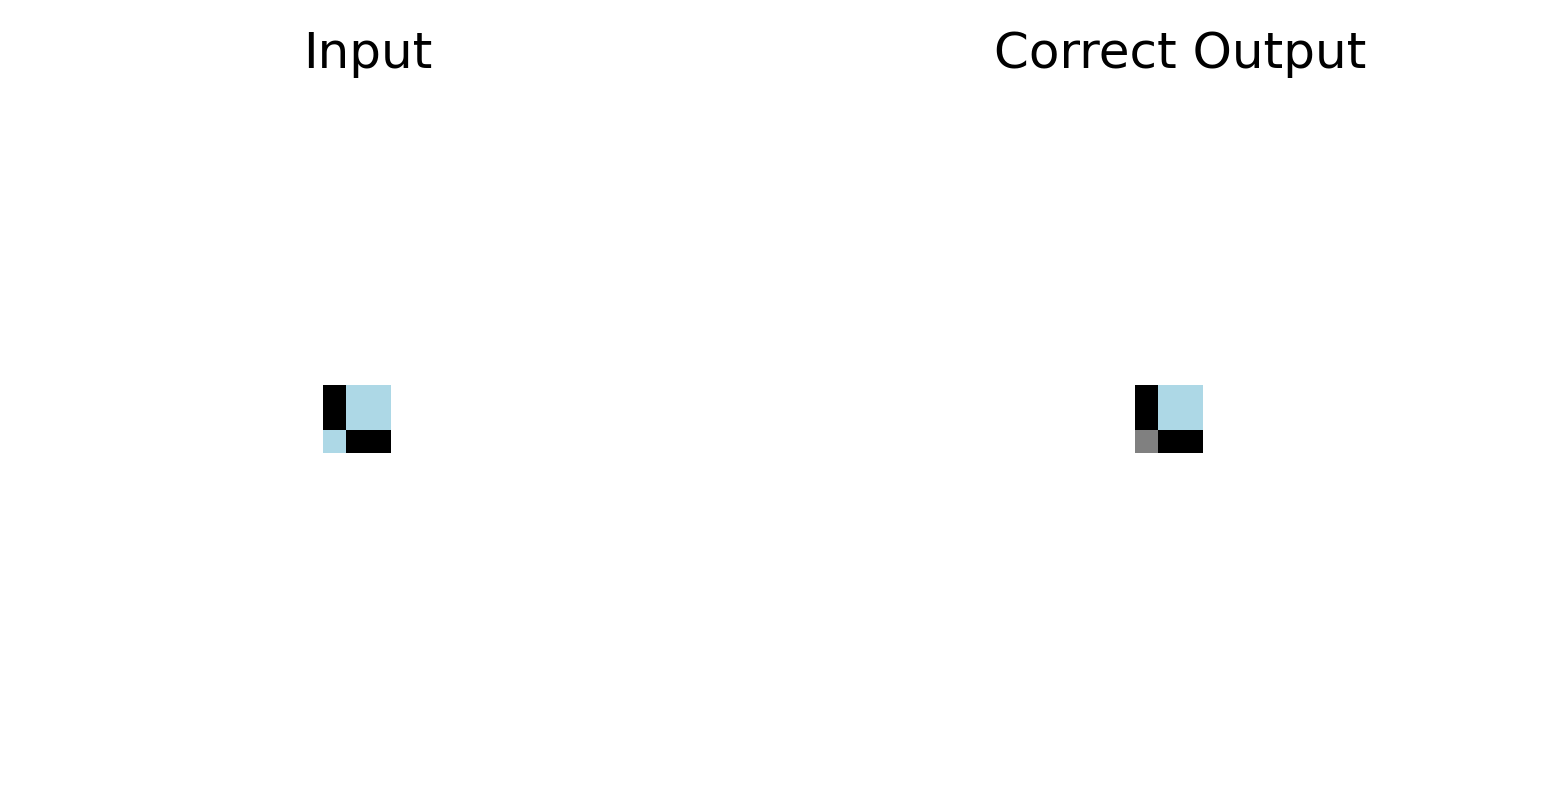

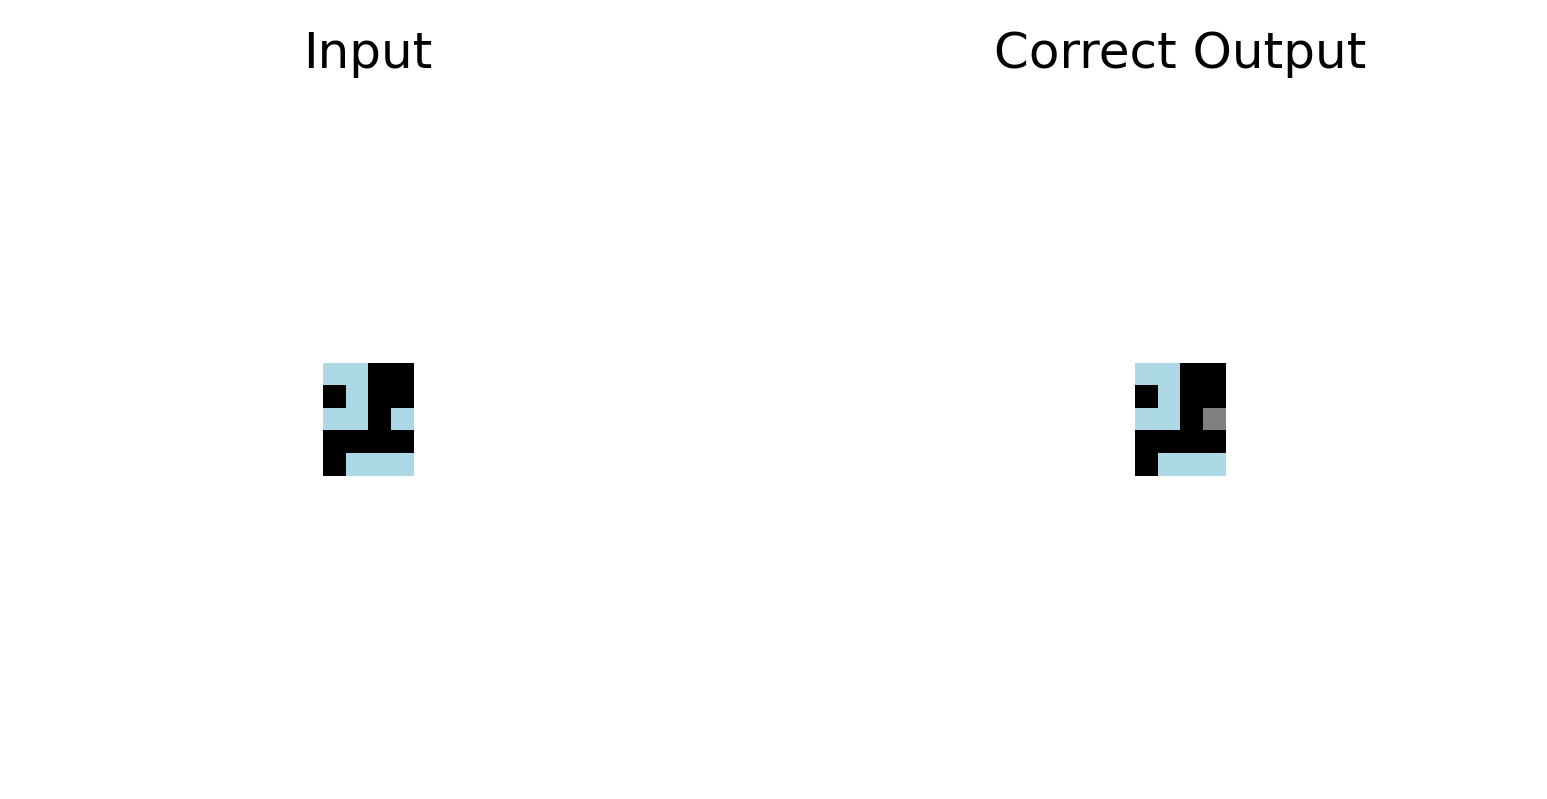

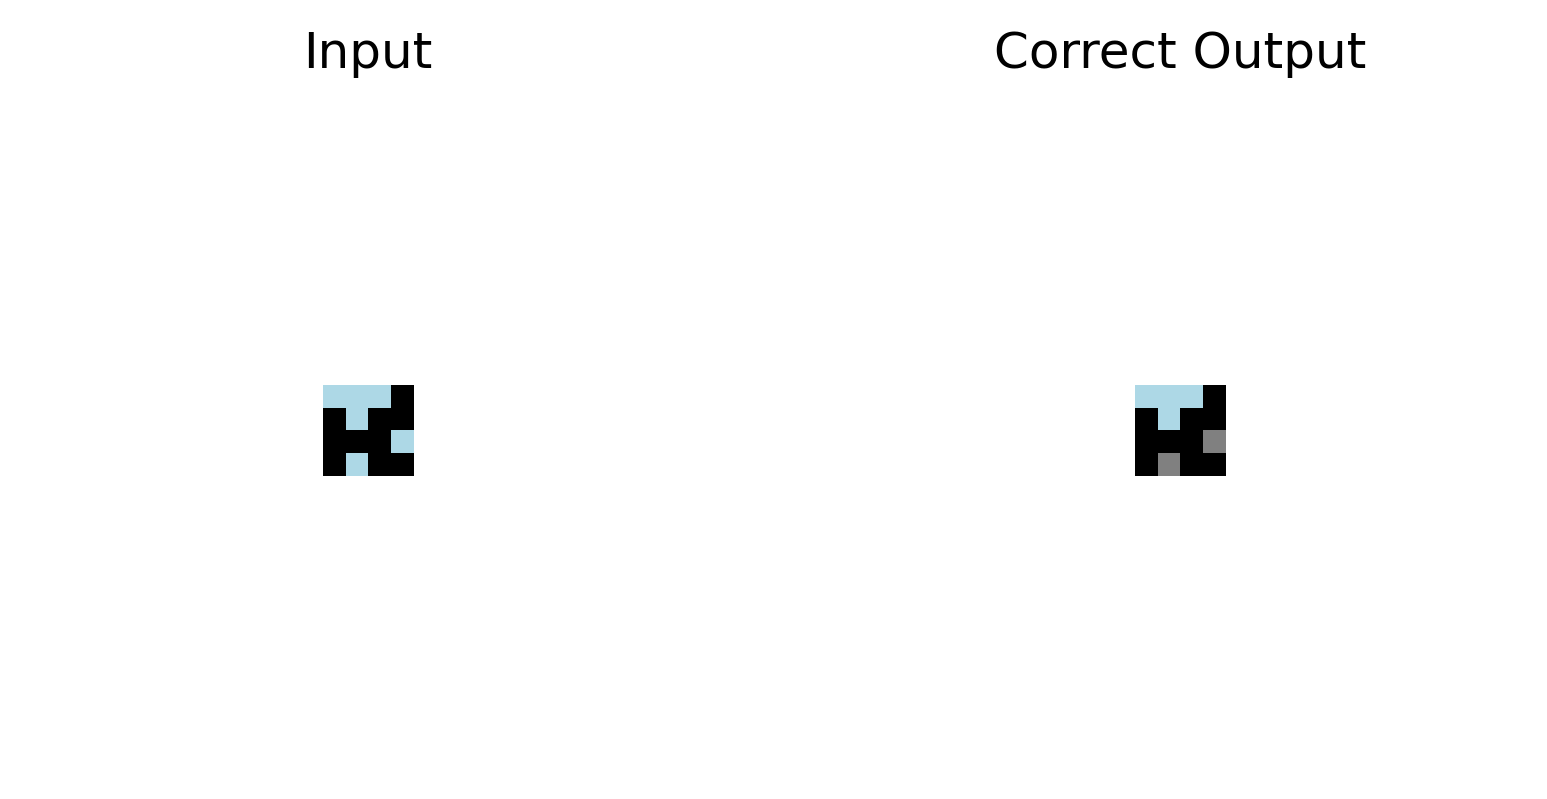

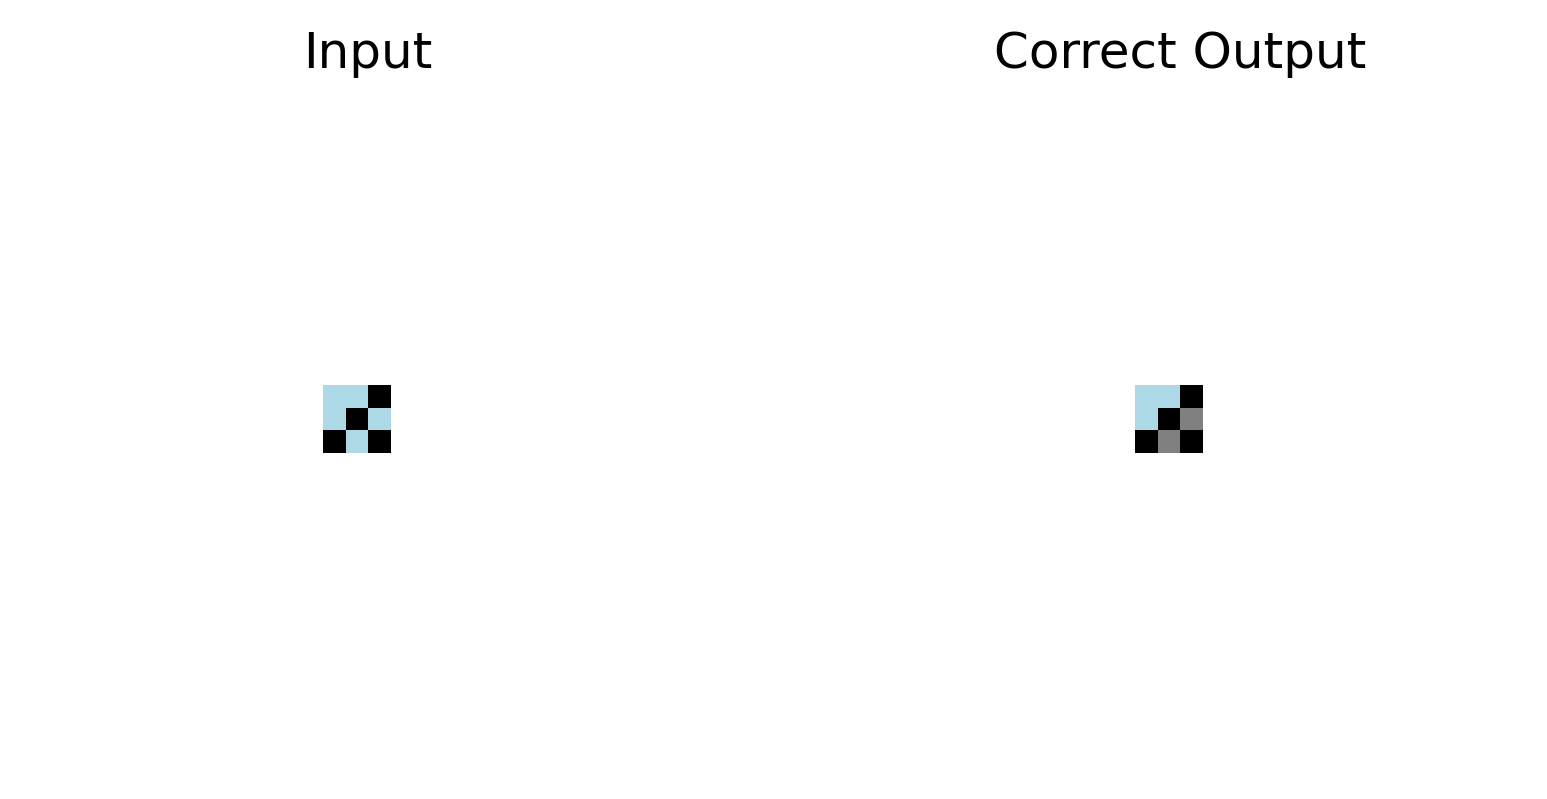

## Pos. 20 - Difficulty 0.002092599868774414 - Challenge 67385a82

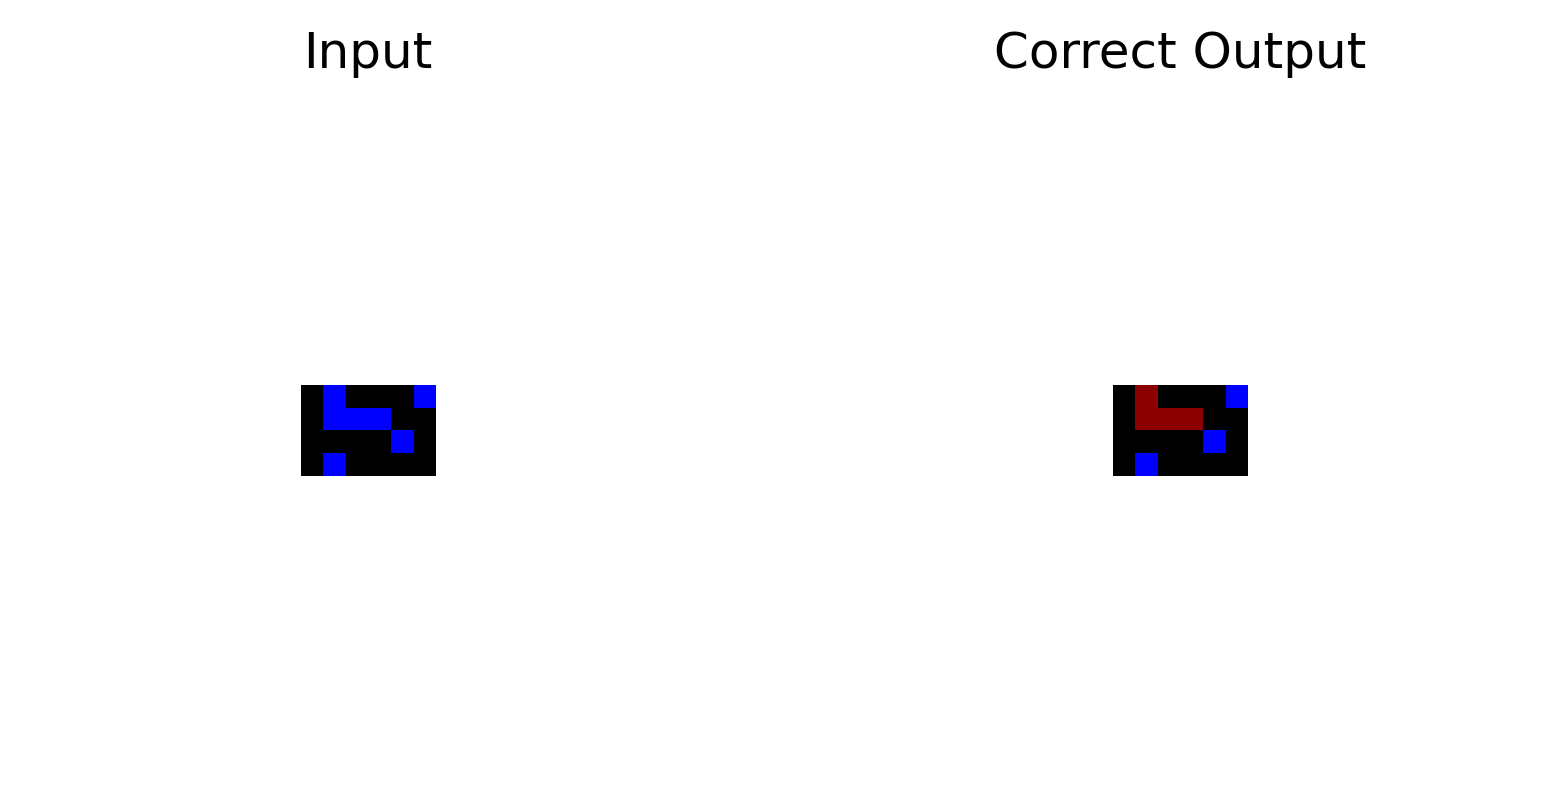

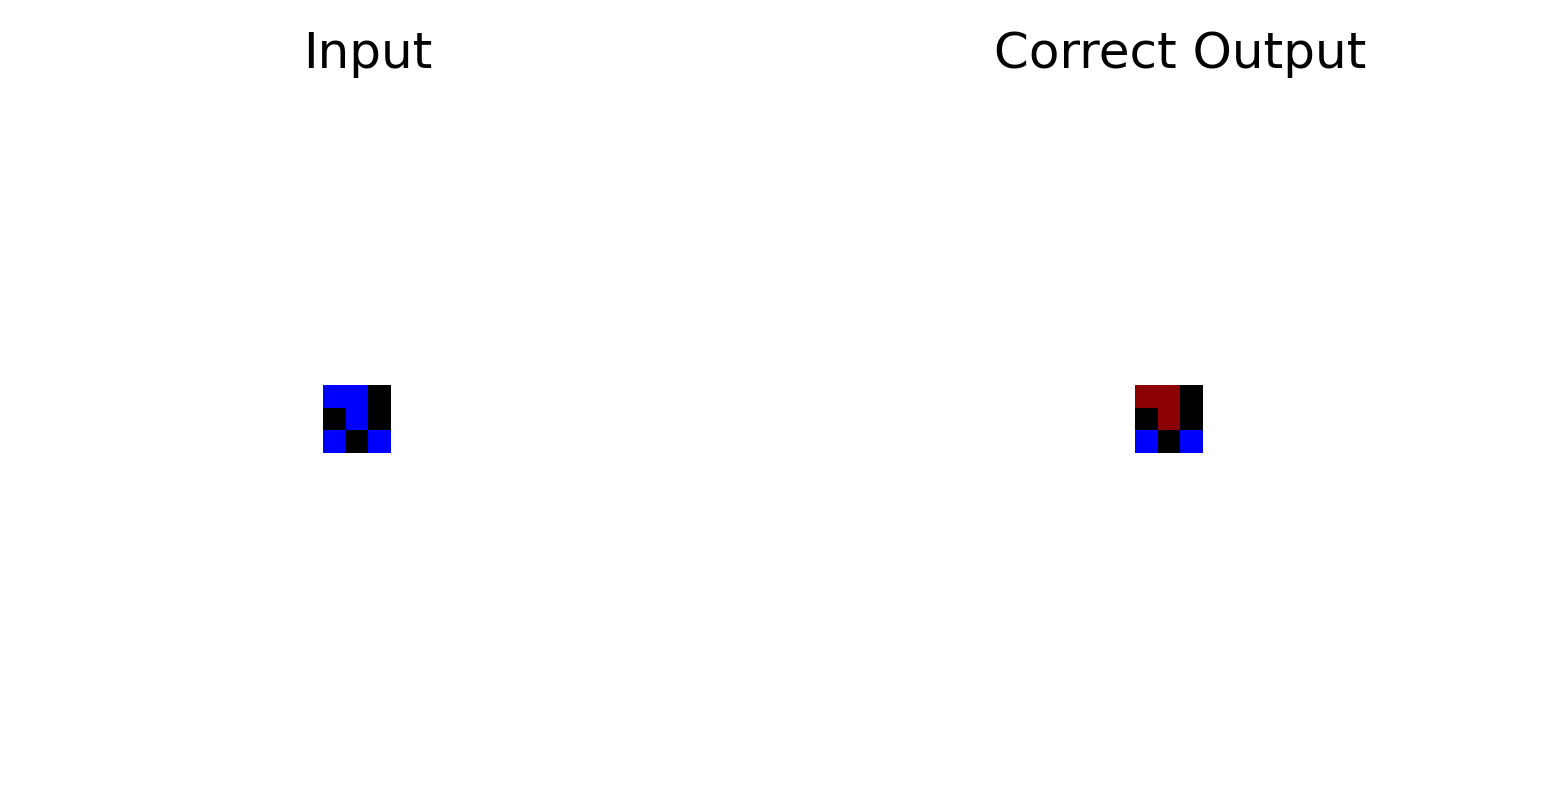

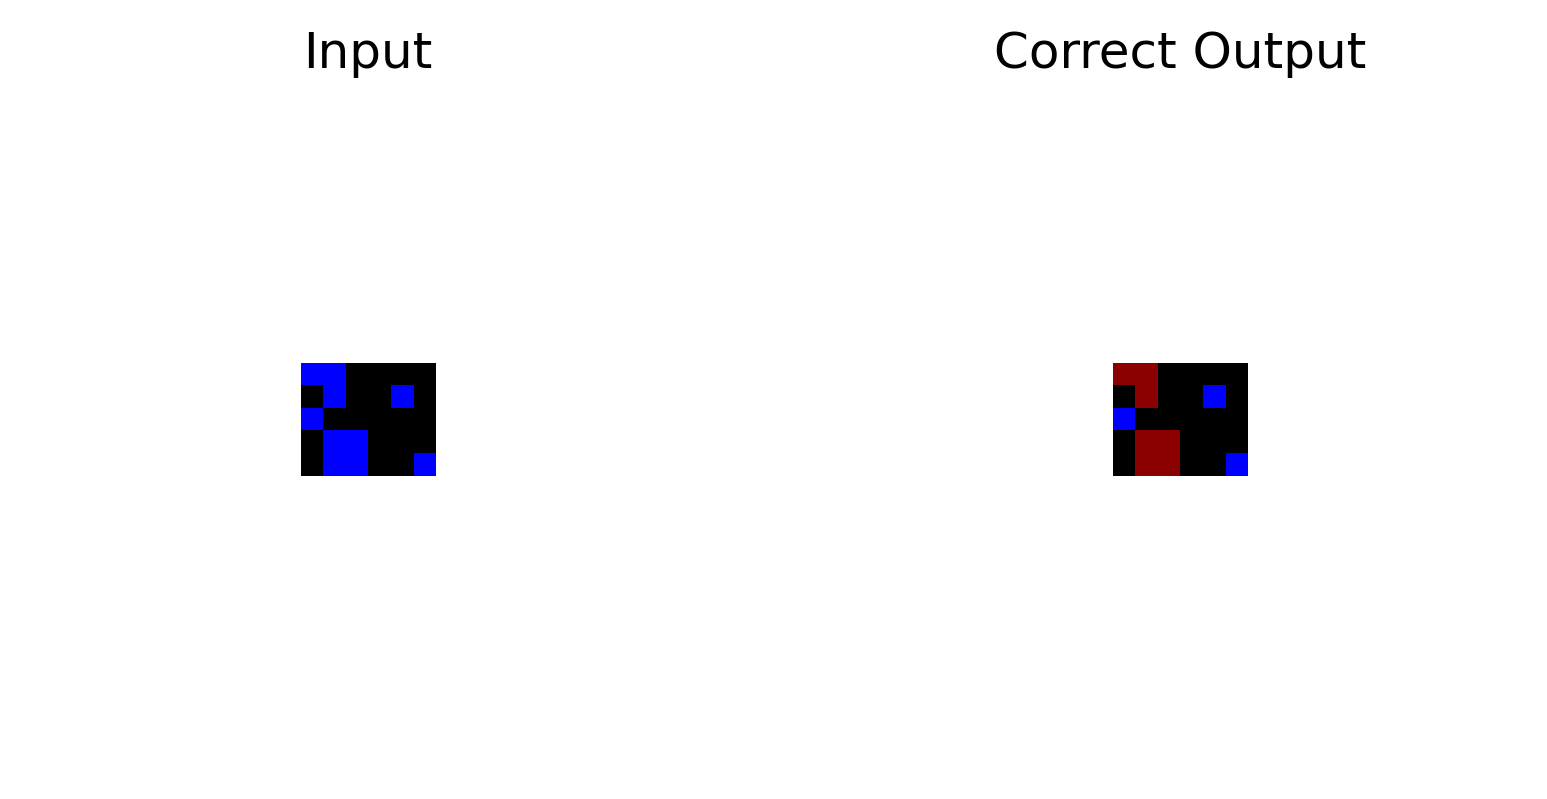

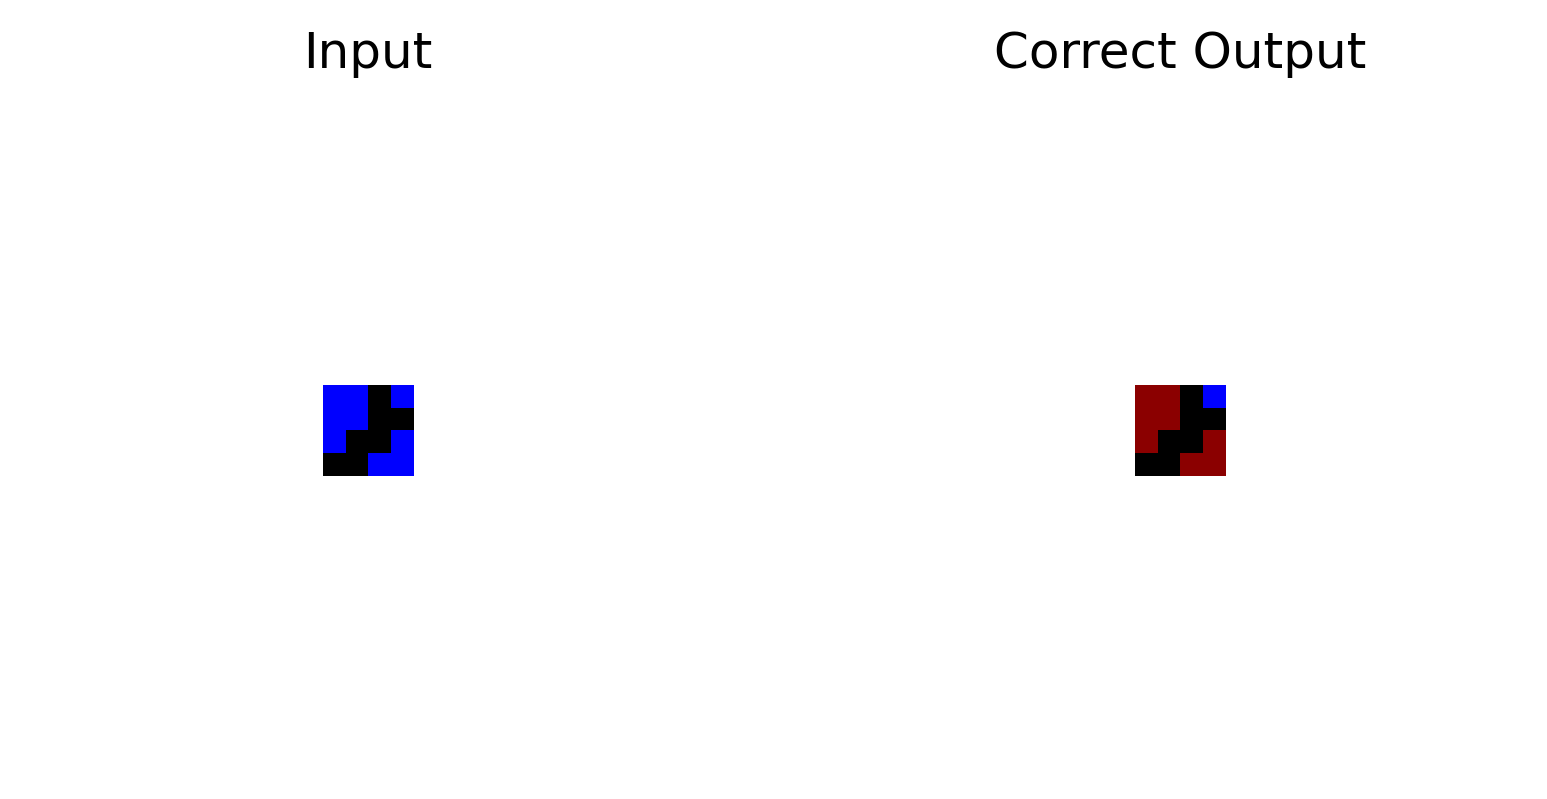

## Pos. 40 - Difficulty 0.004256248474121094 - Challenge 746b3537

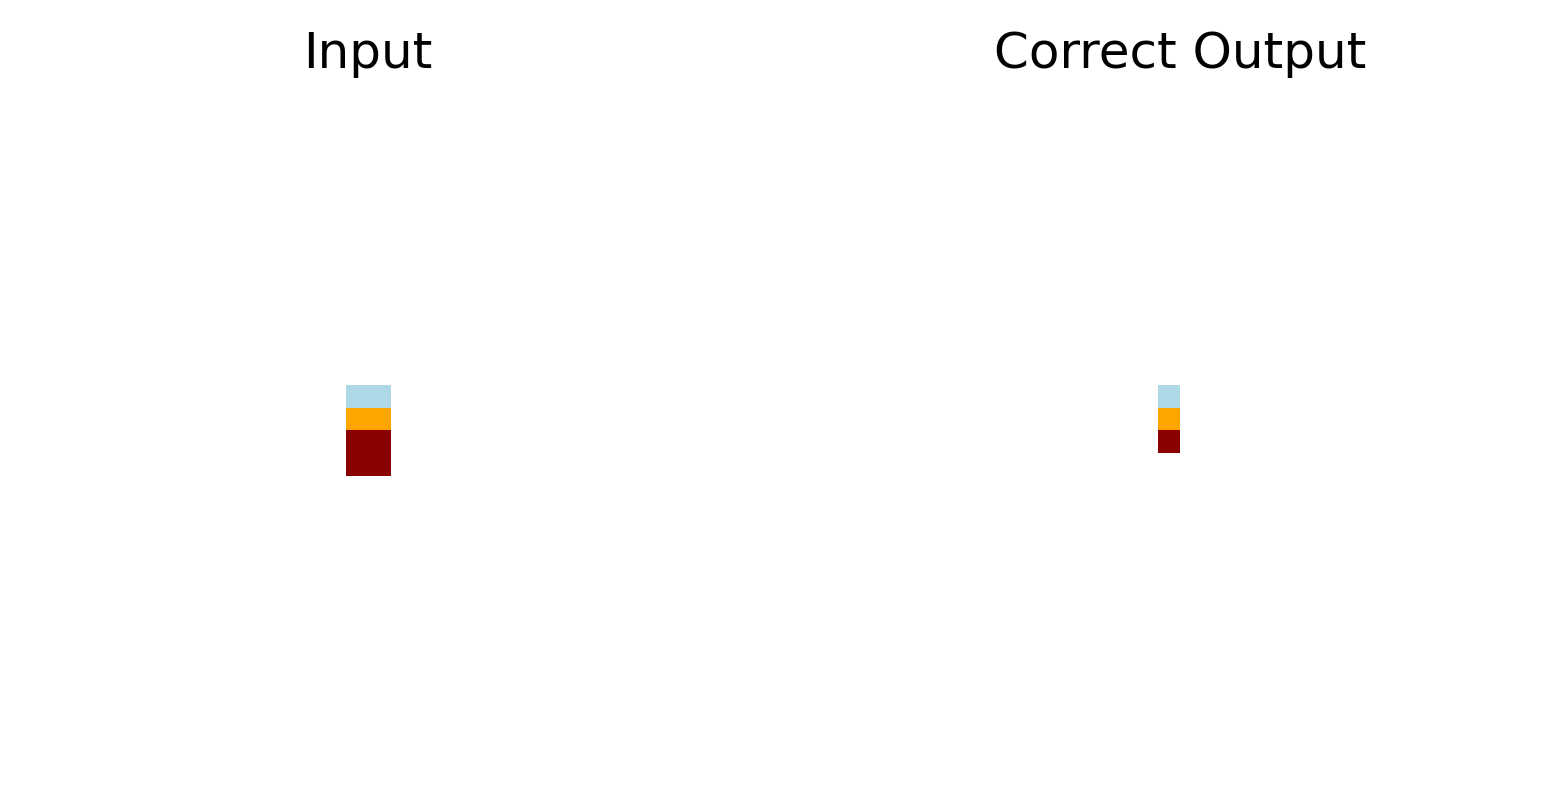

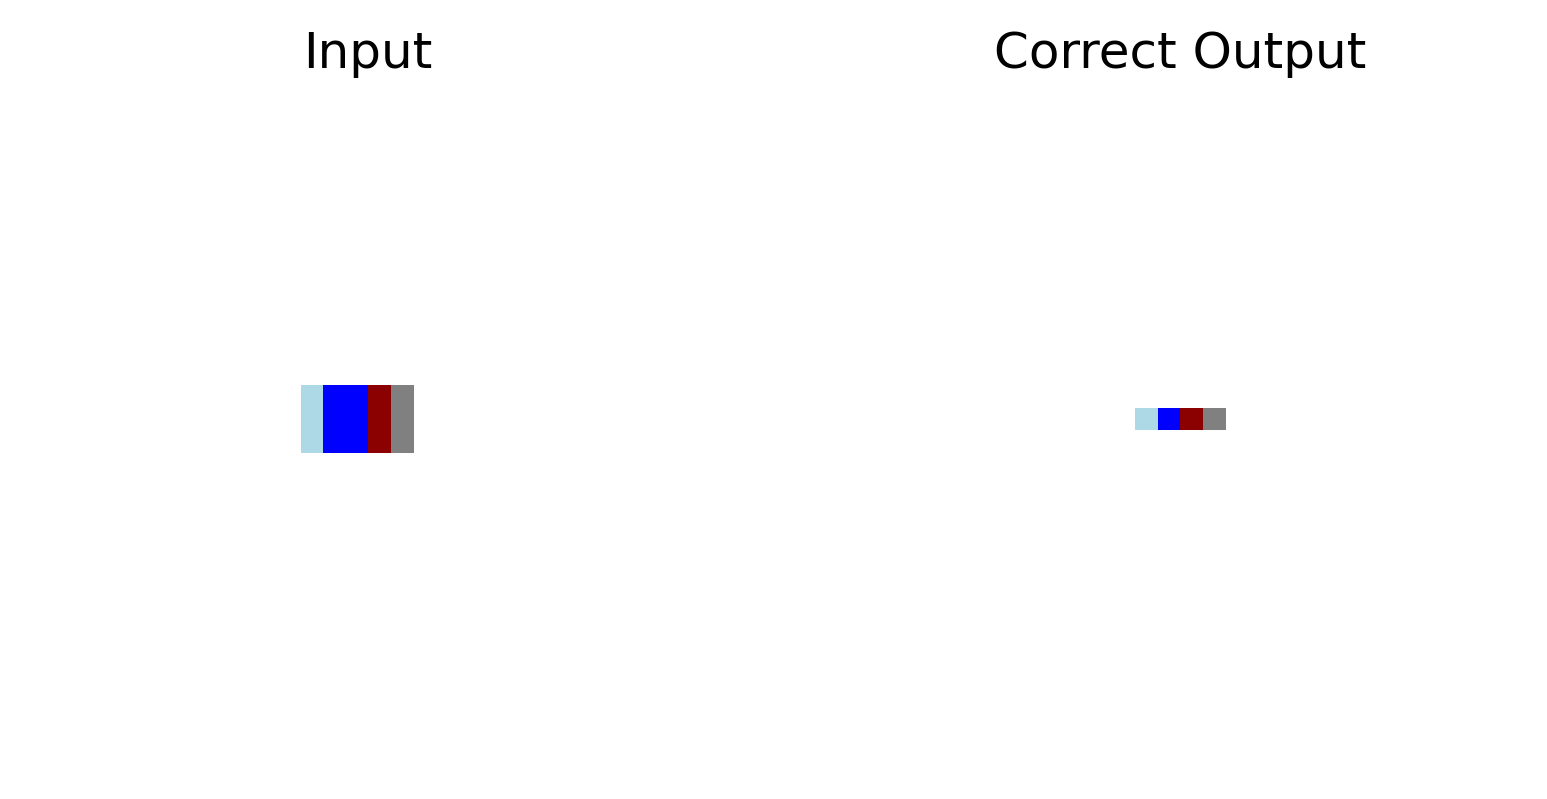

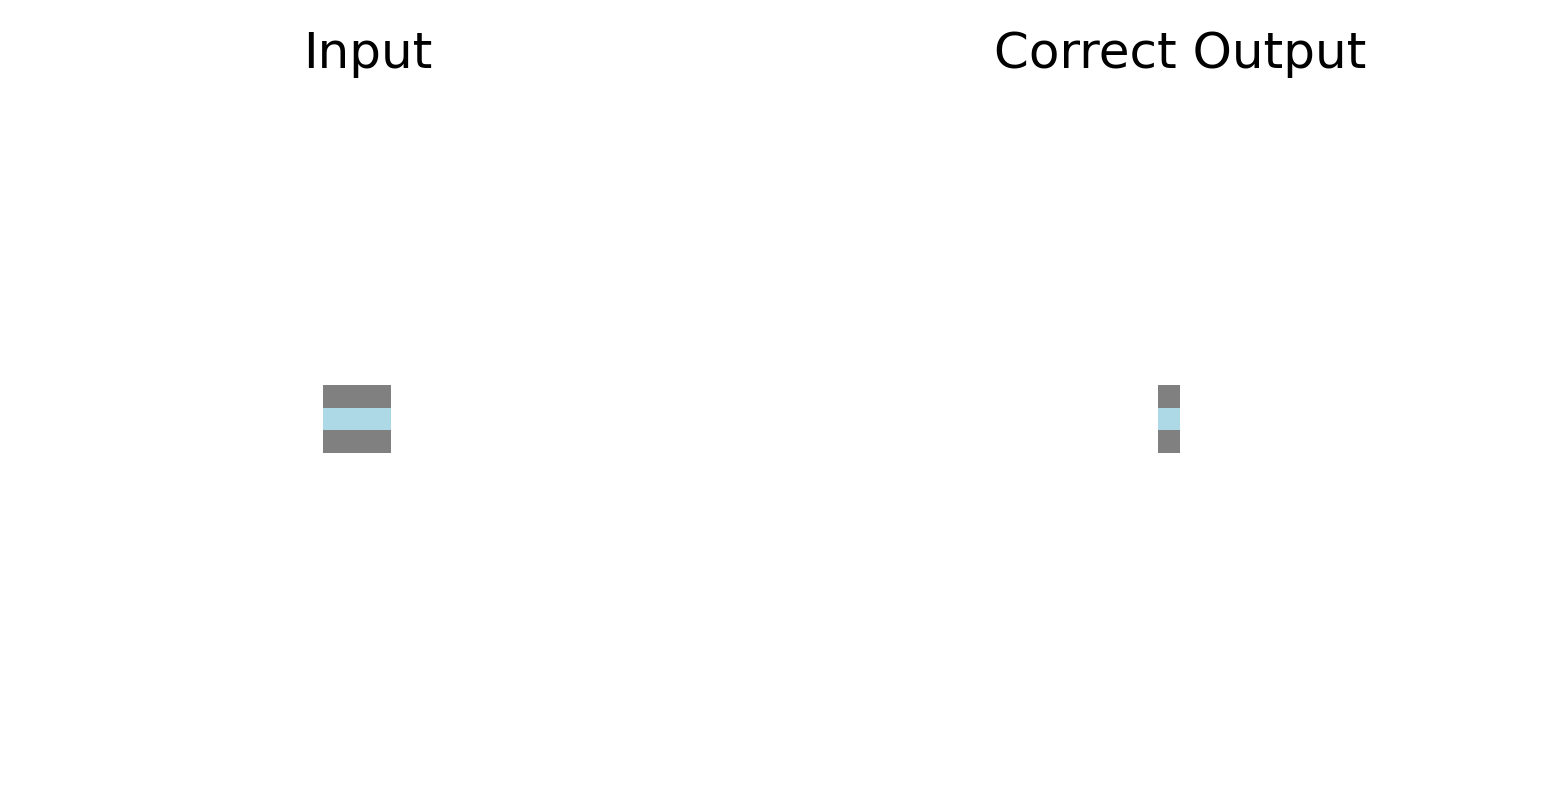

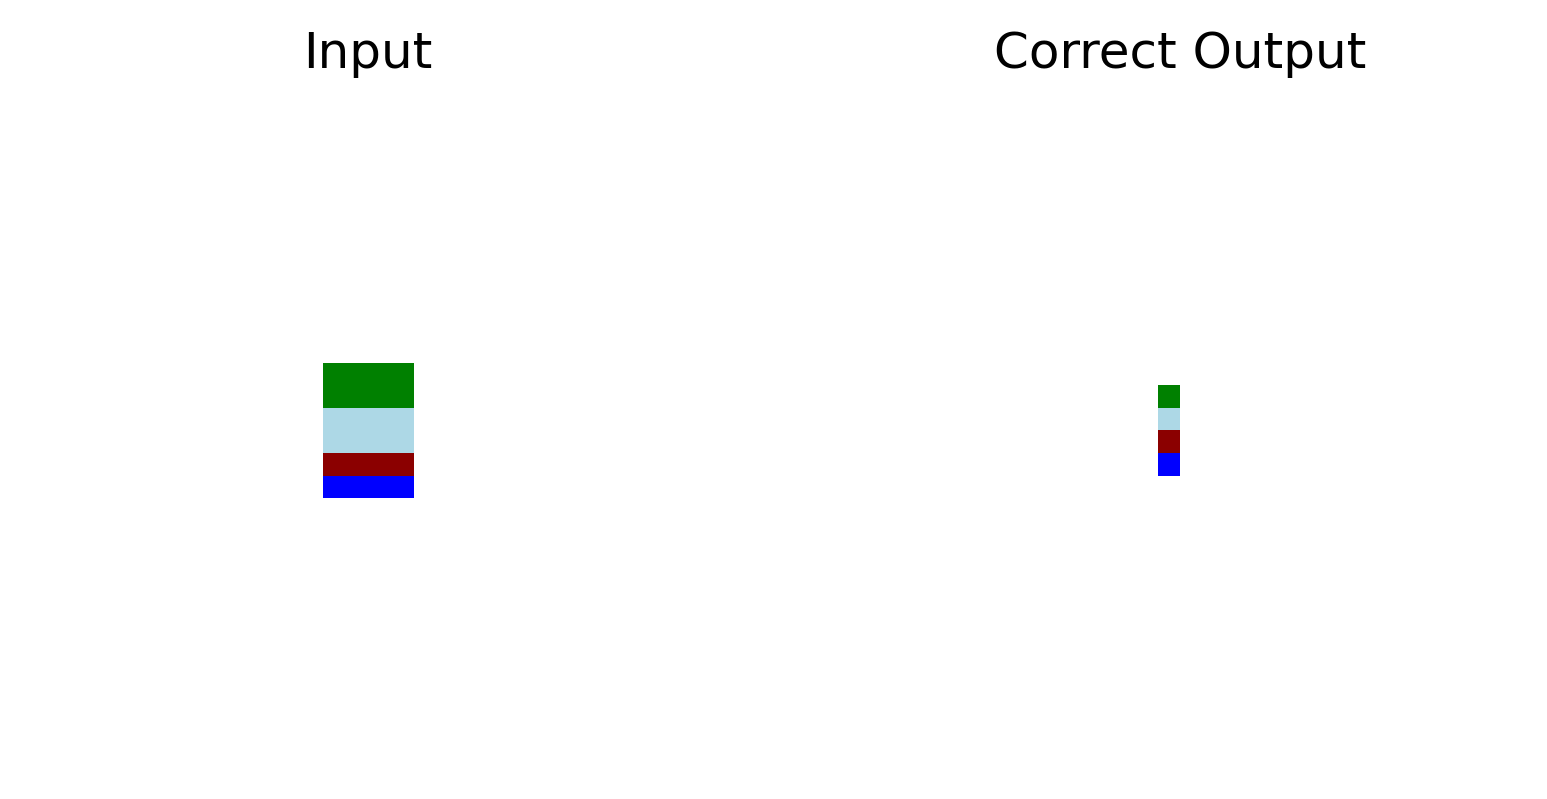

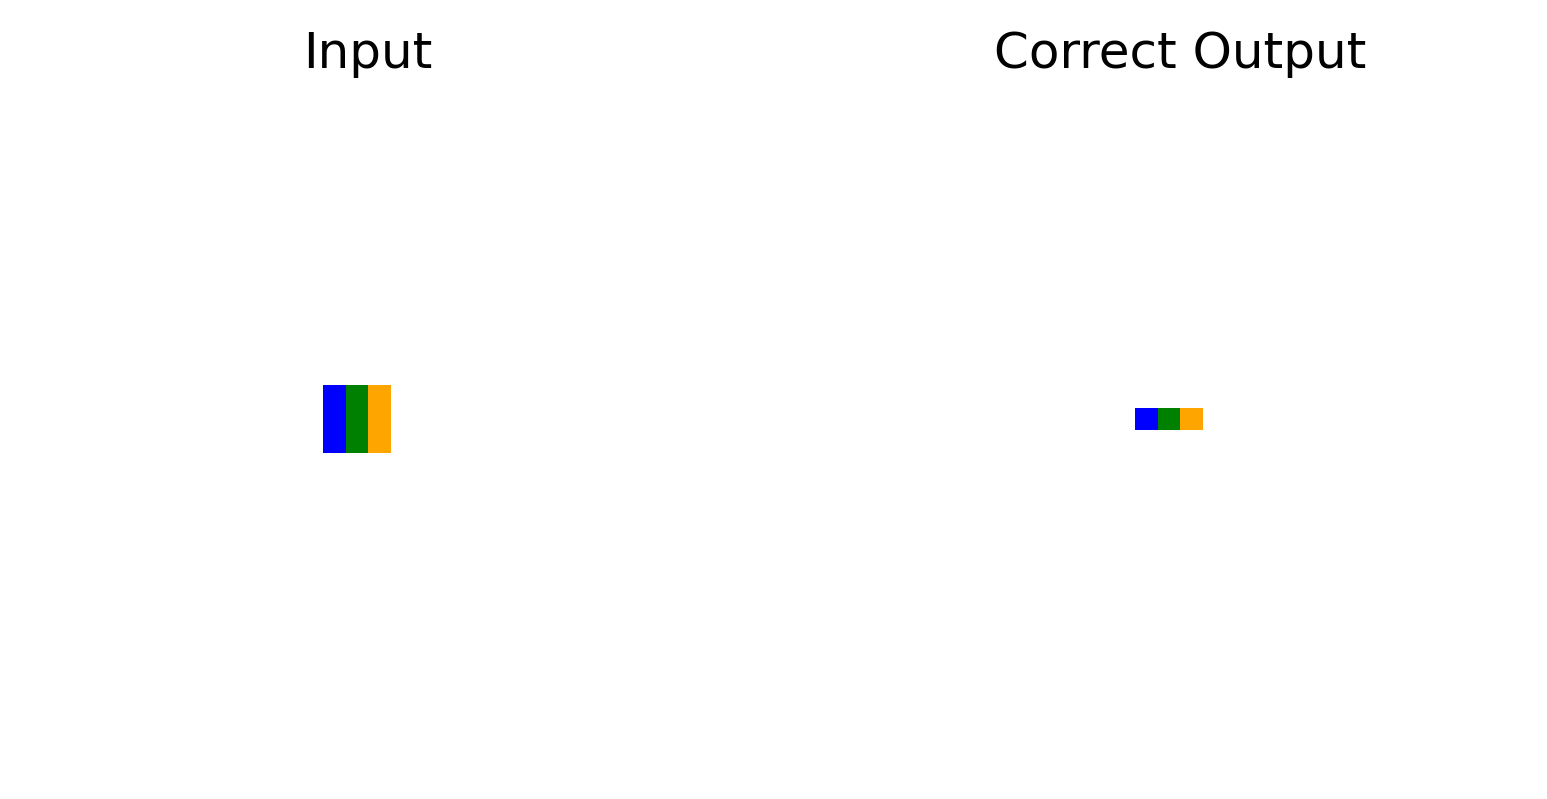

## Pos. 60 - Difficulty 0.005654573440551758 - Challenge 321b1fc6

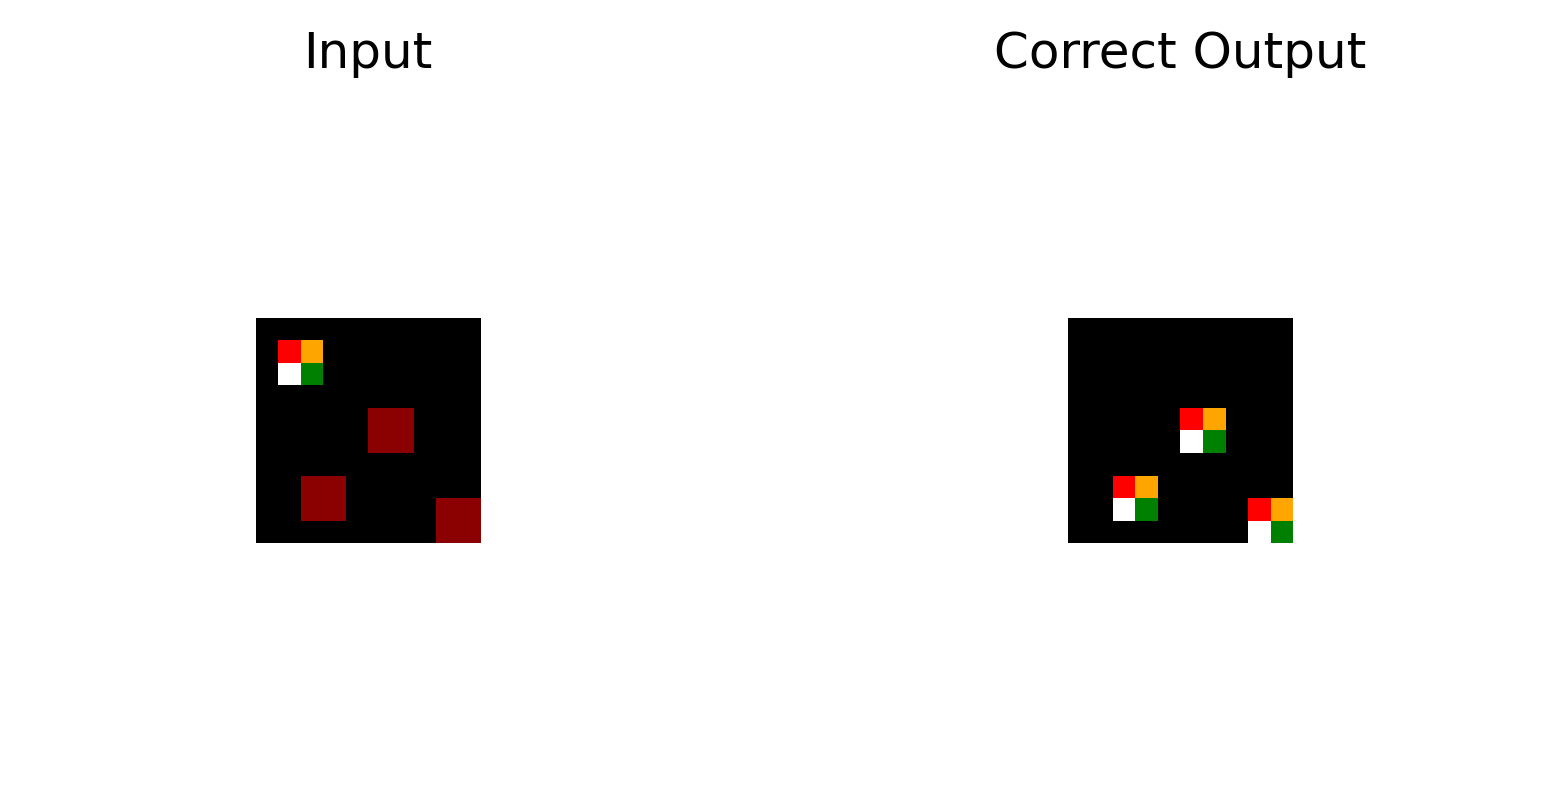

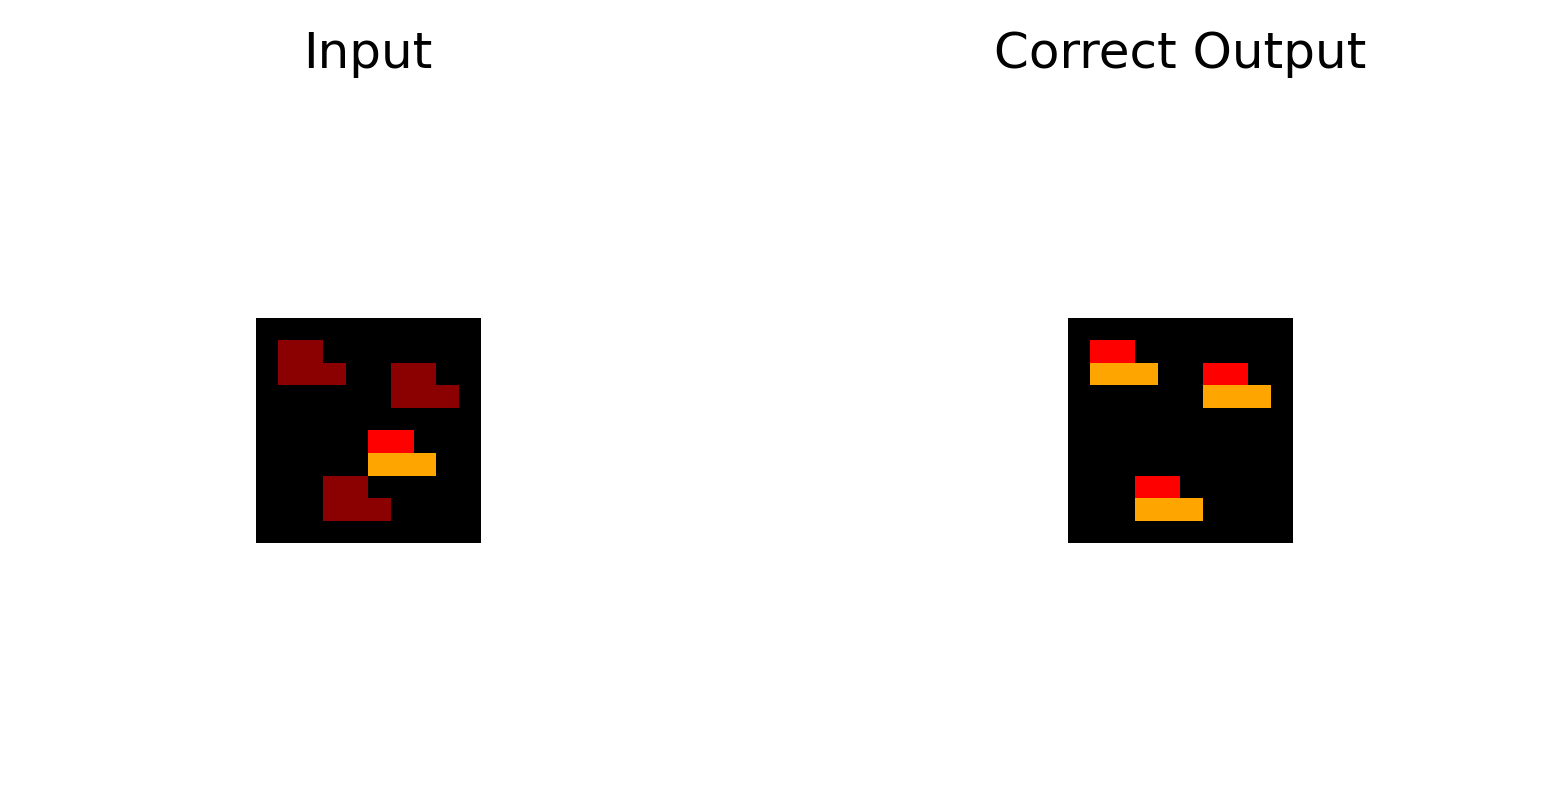

## Pos. 80 - Difficulty 0.007875323295593262 - Challenge 6150a2bd

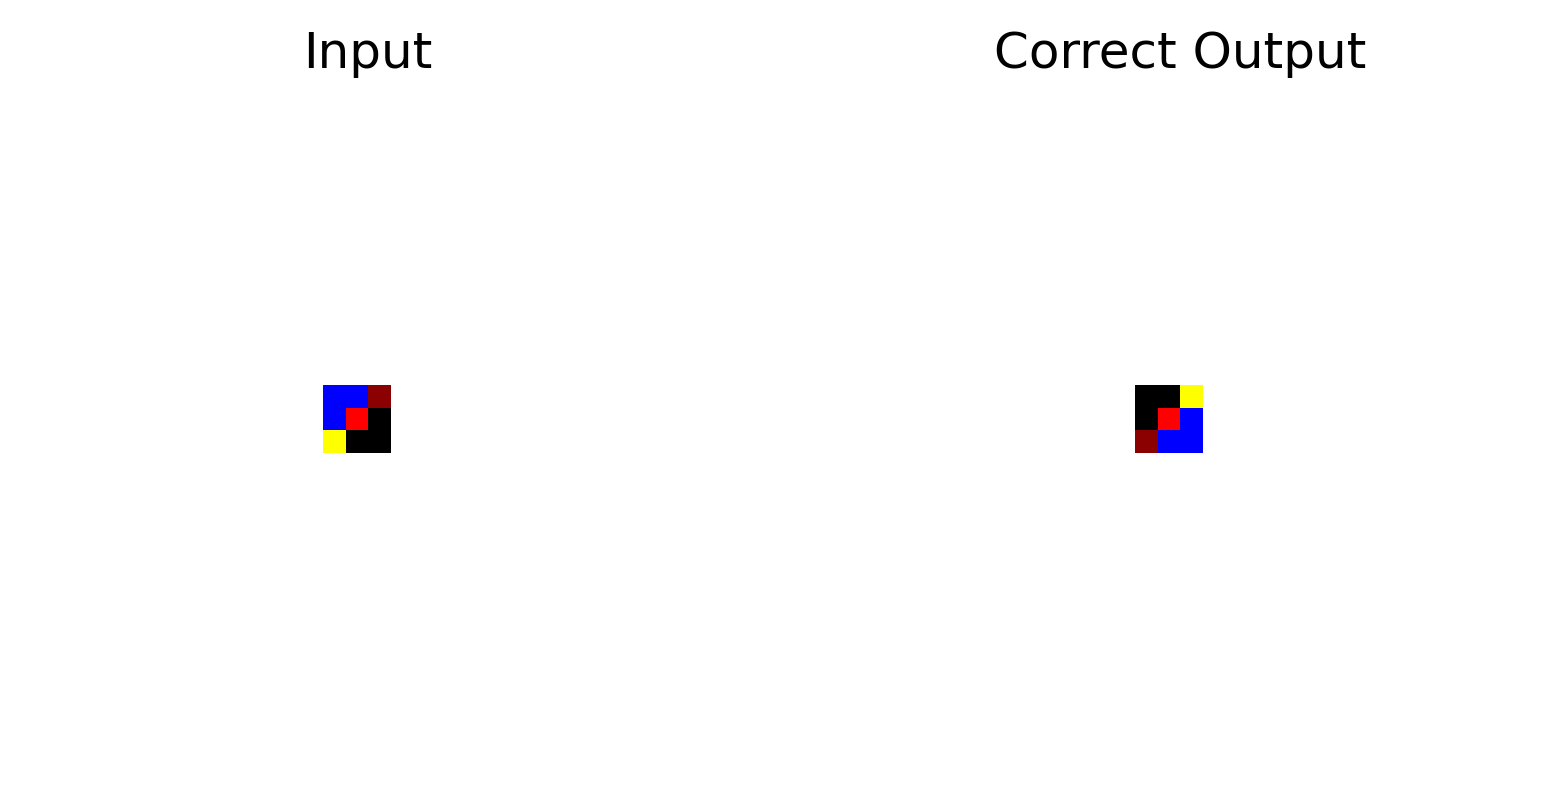

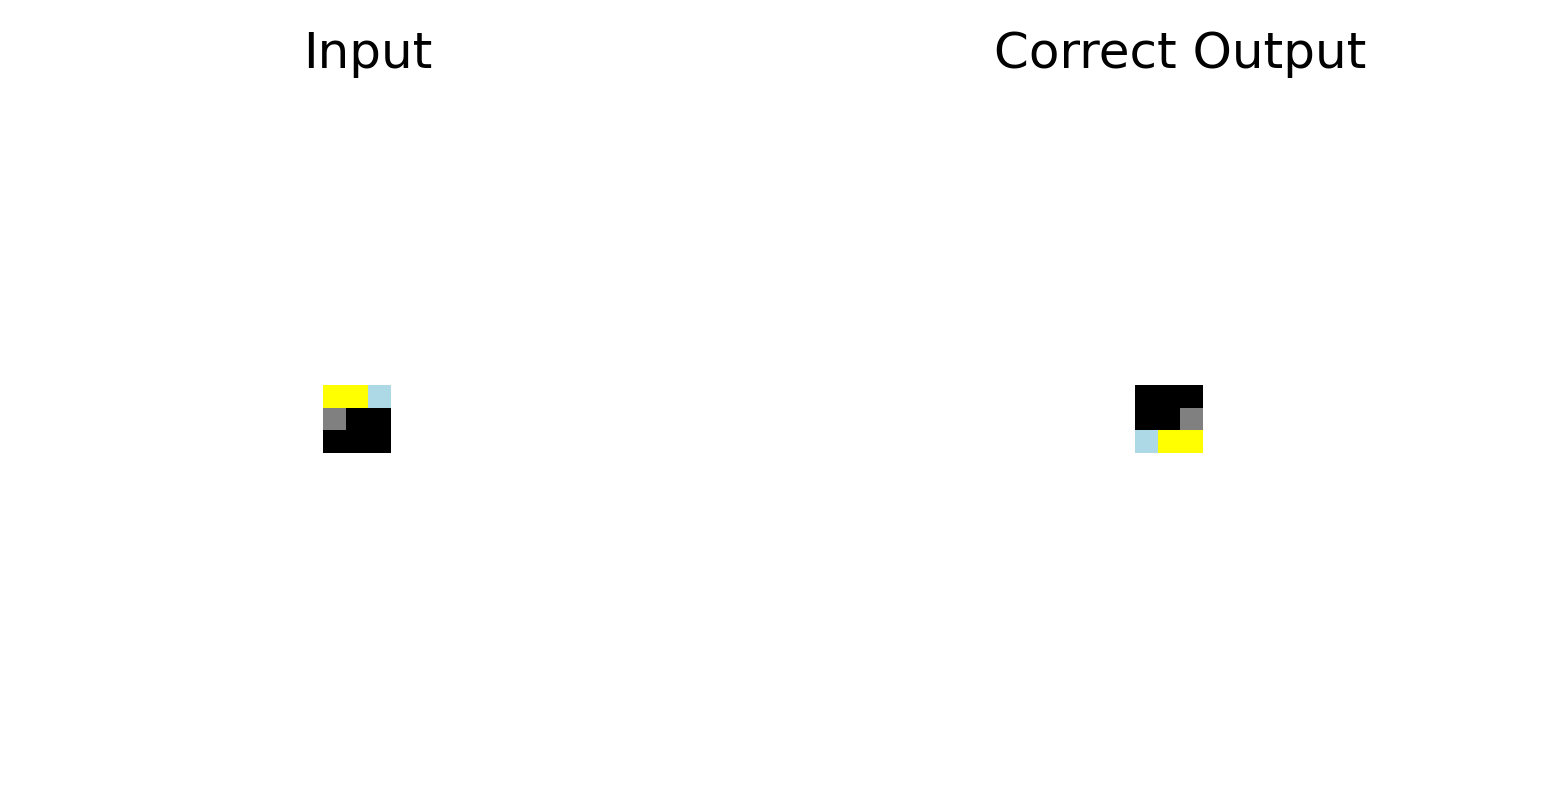

## Pos. 100 - Difficulty 0.009317457675933838 - Challenge 662c240a

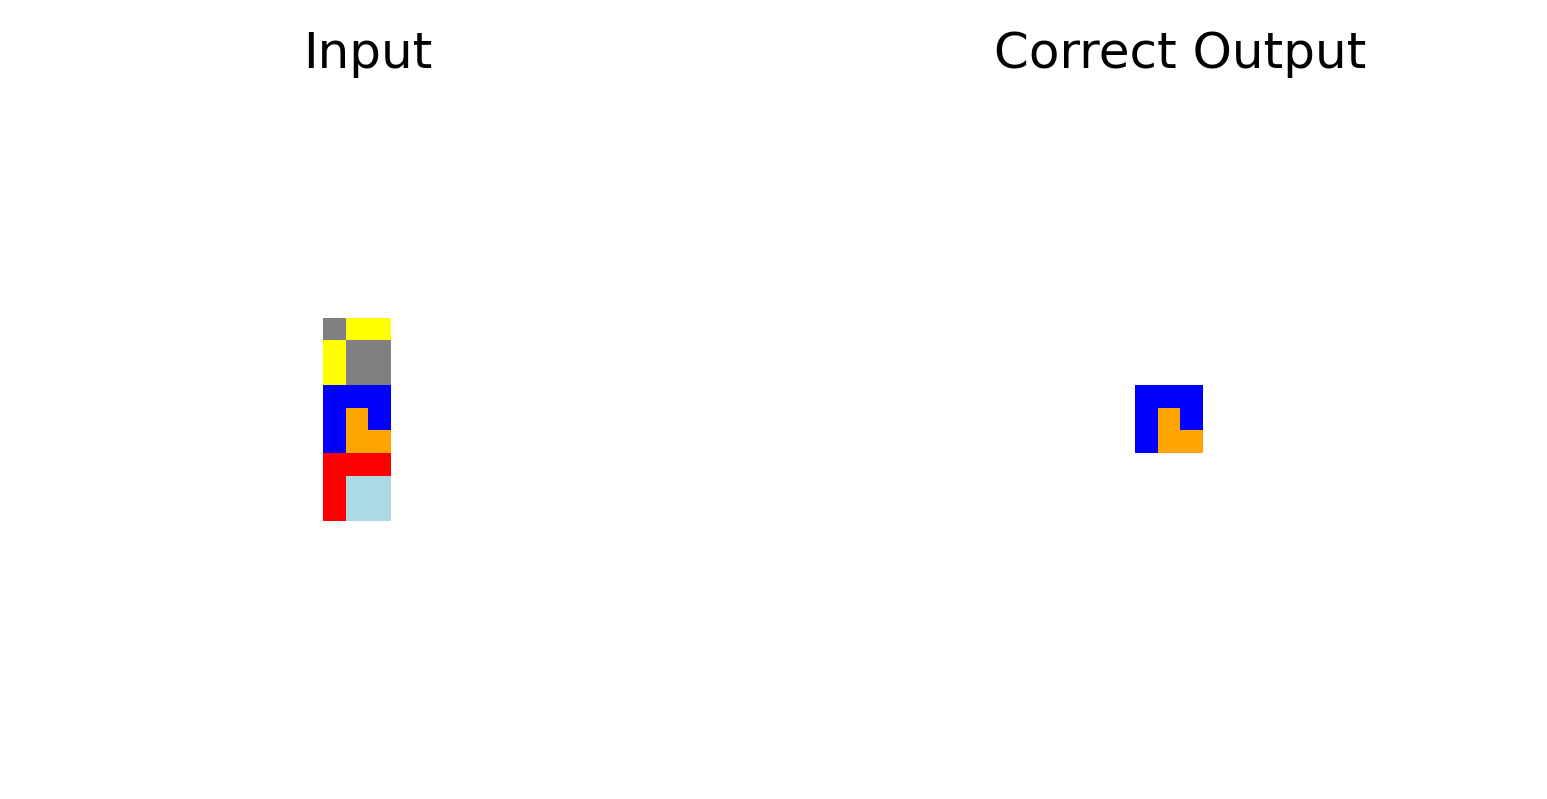

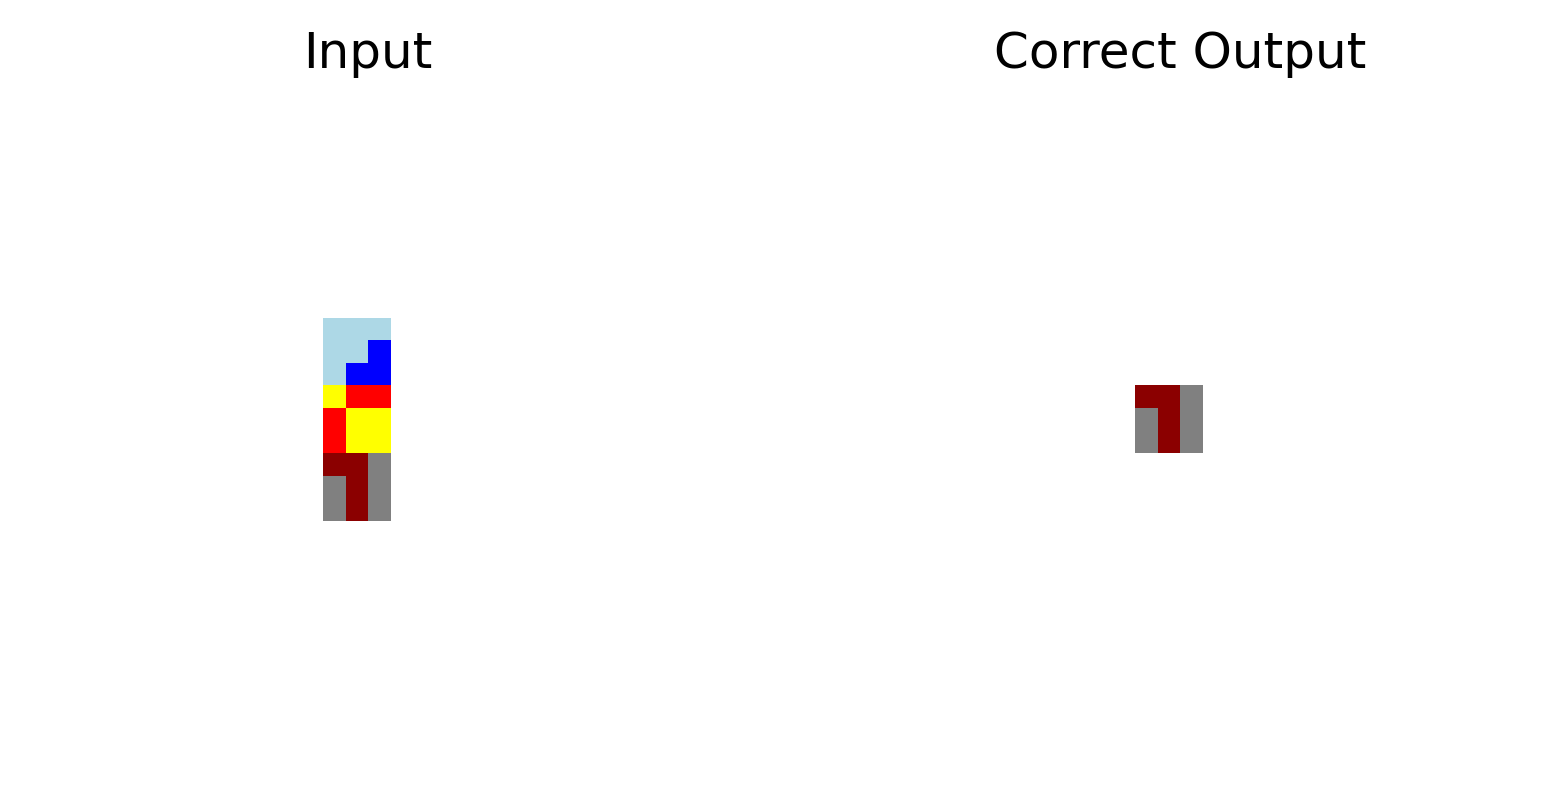

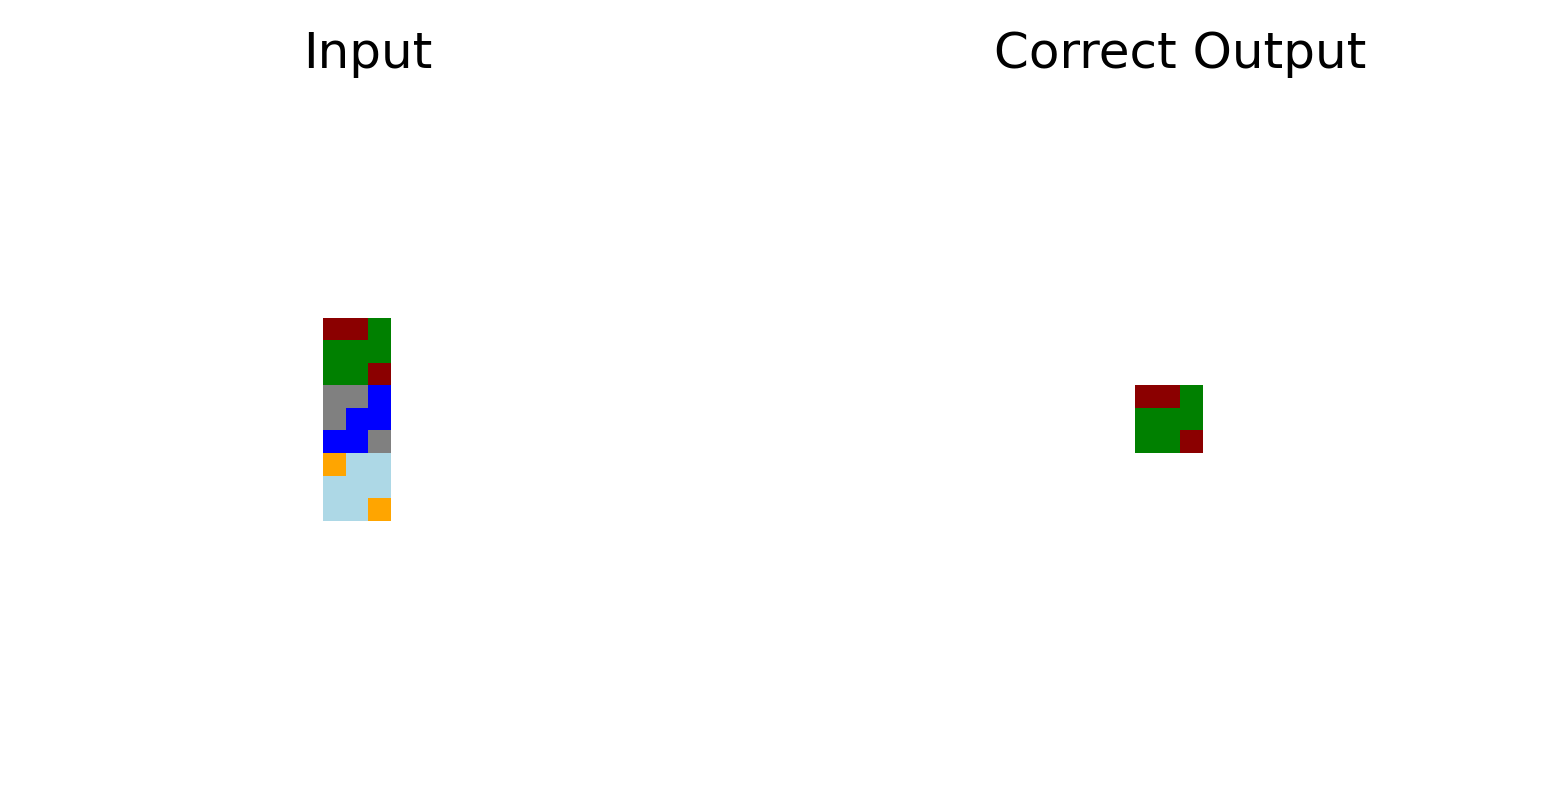

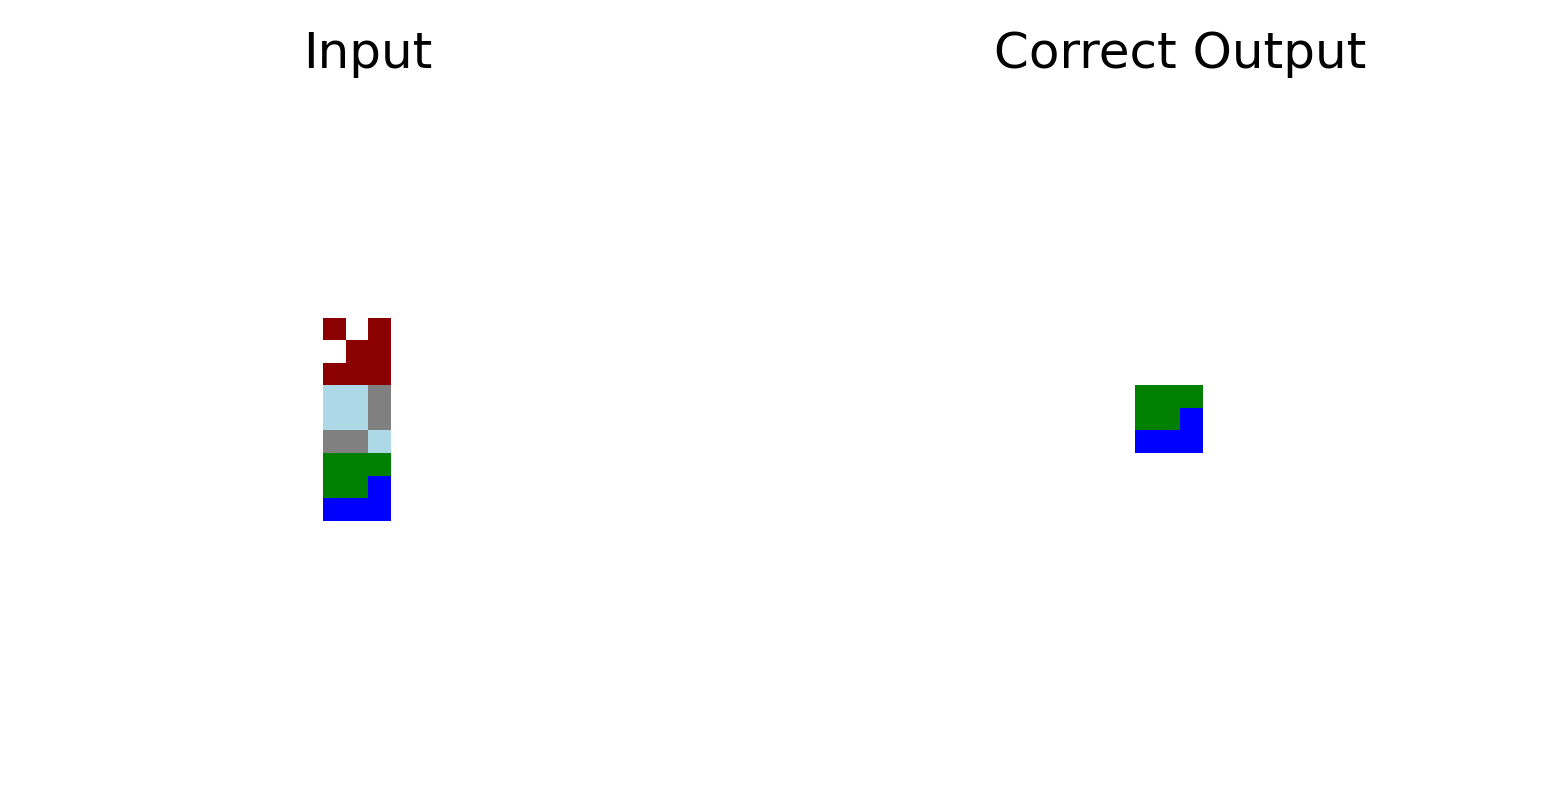

## Pos. 120 - Difficulty 0.011663496494293213 - Challenge 42a50994

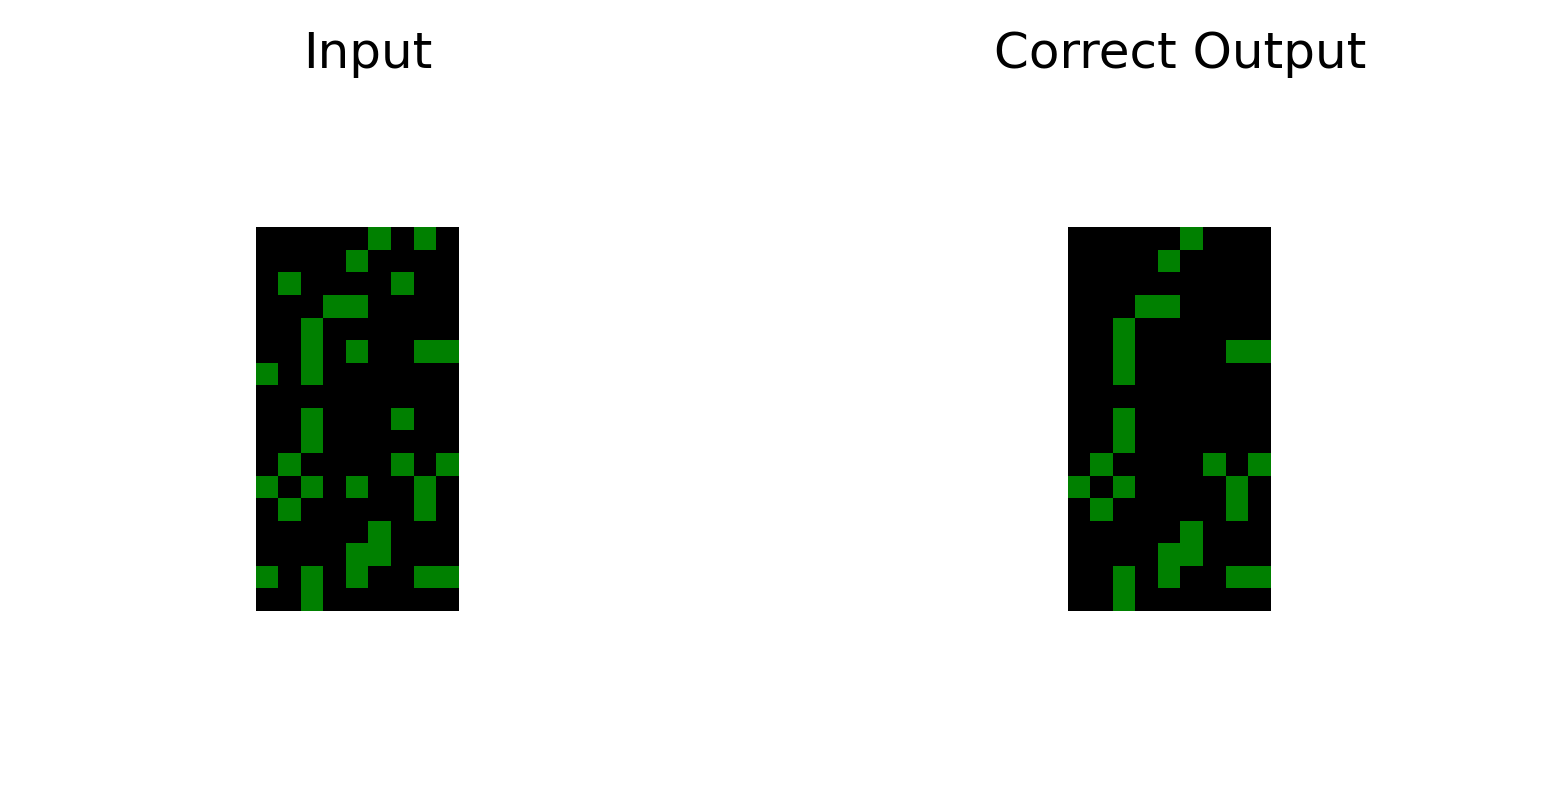

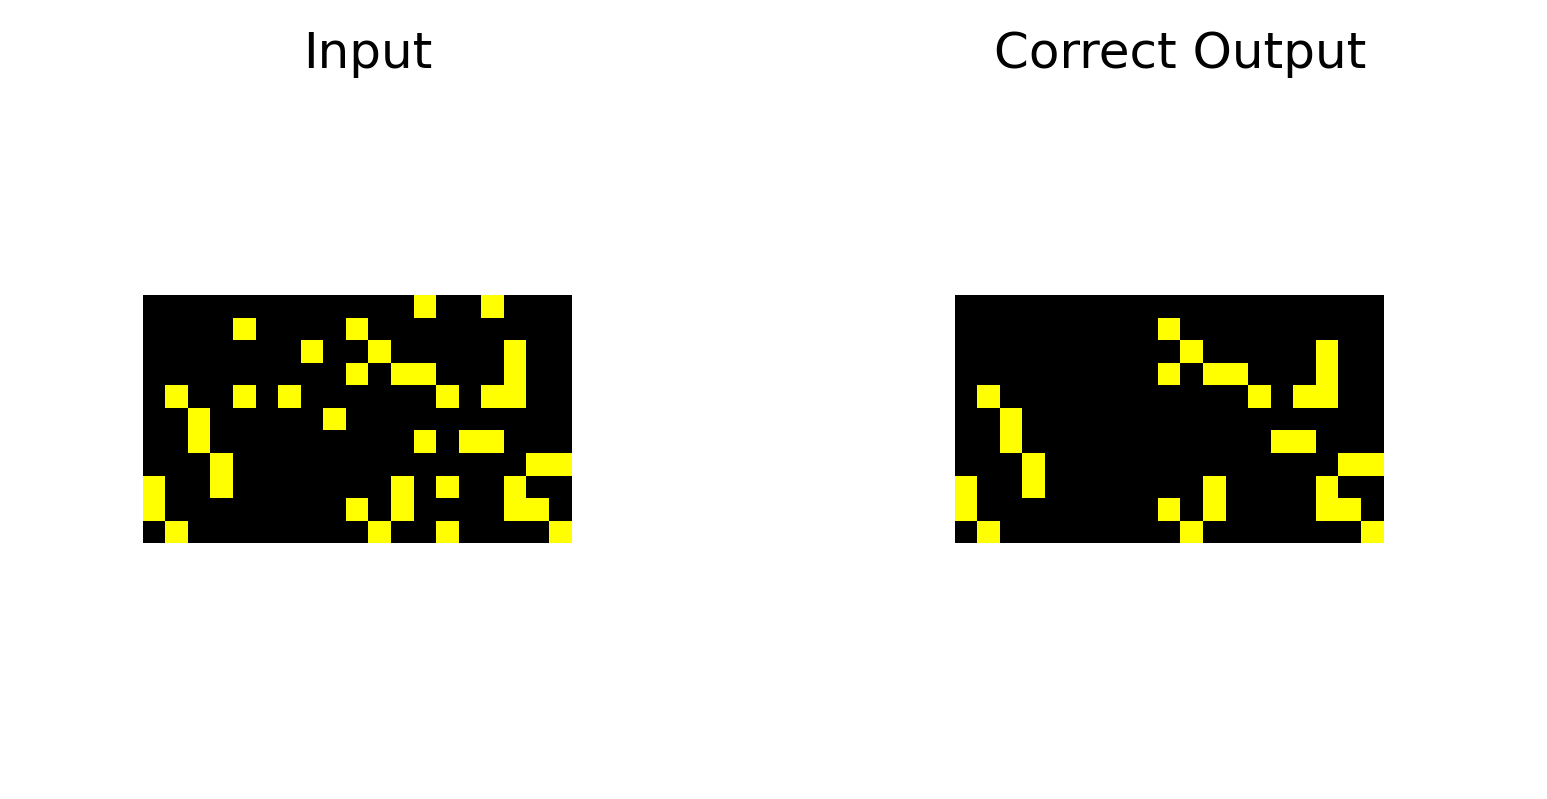

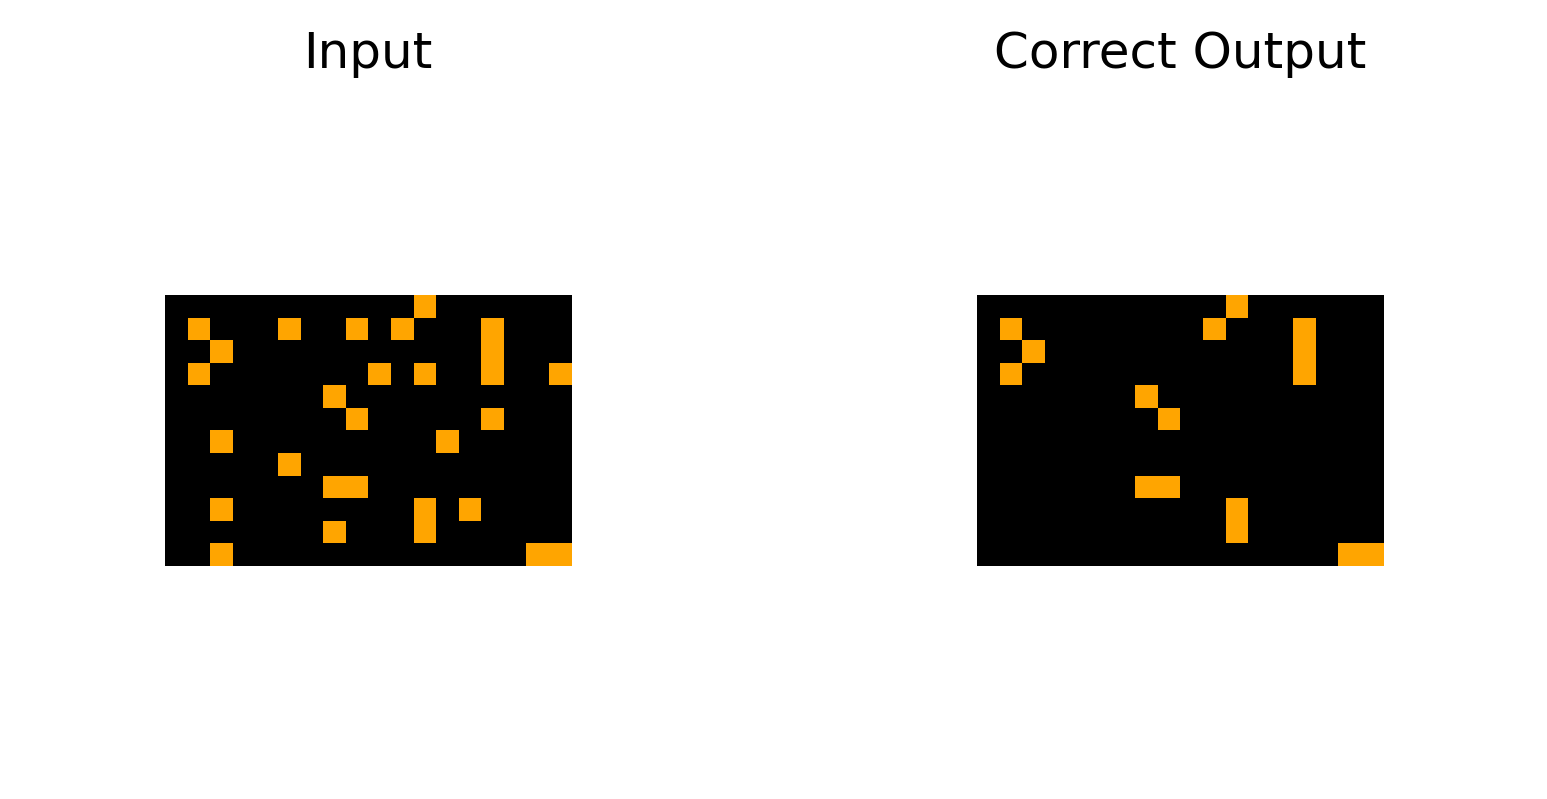

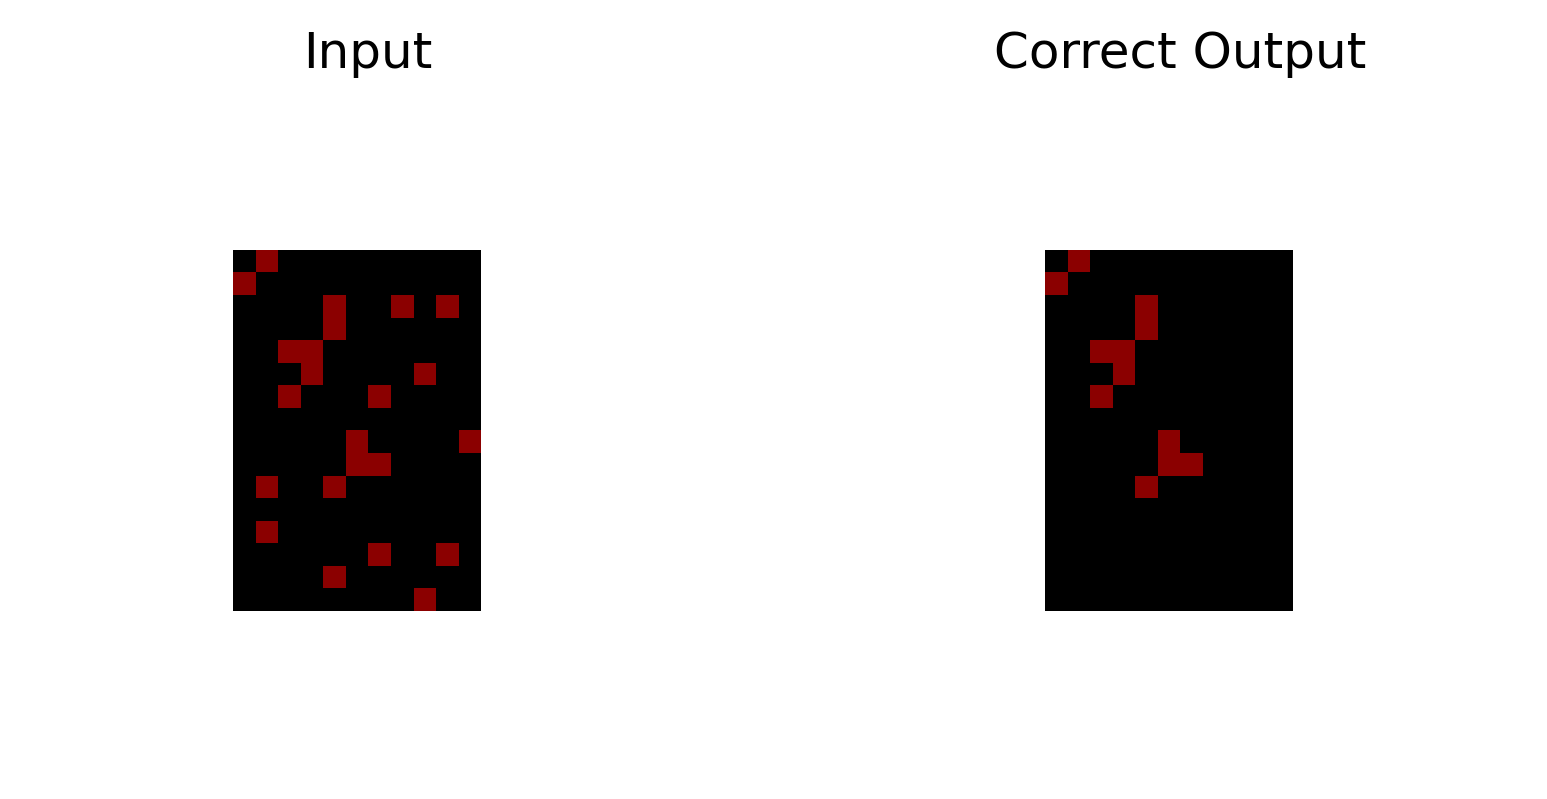

## Pos. 140 - Difficulty 0.013276338577270508 - Challenge 8d510a79

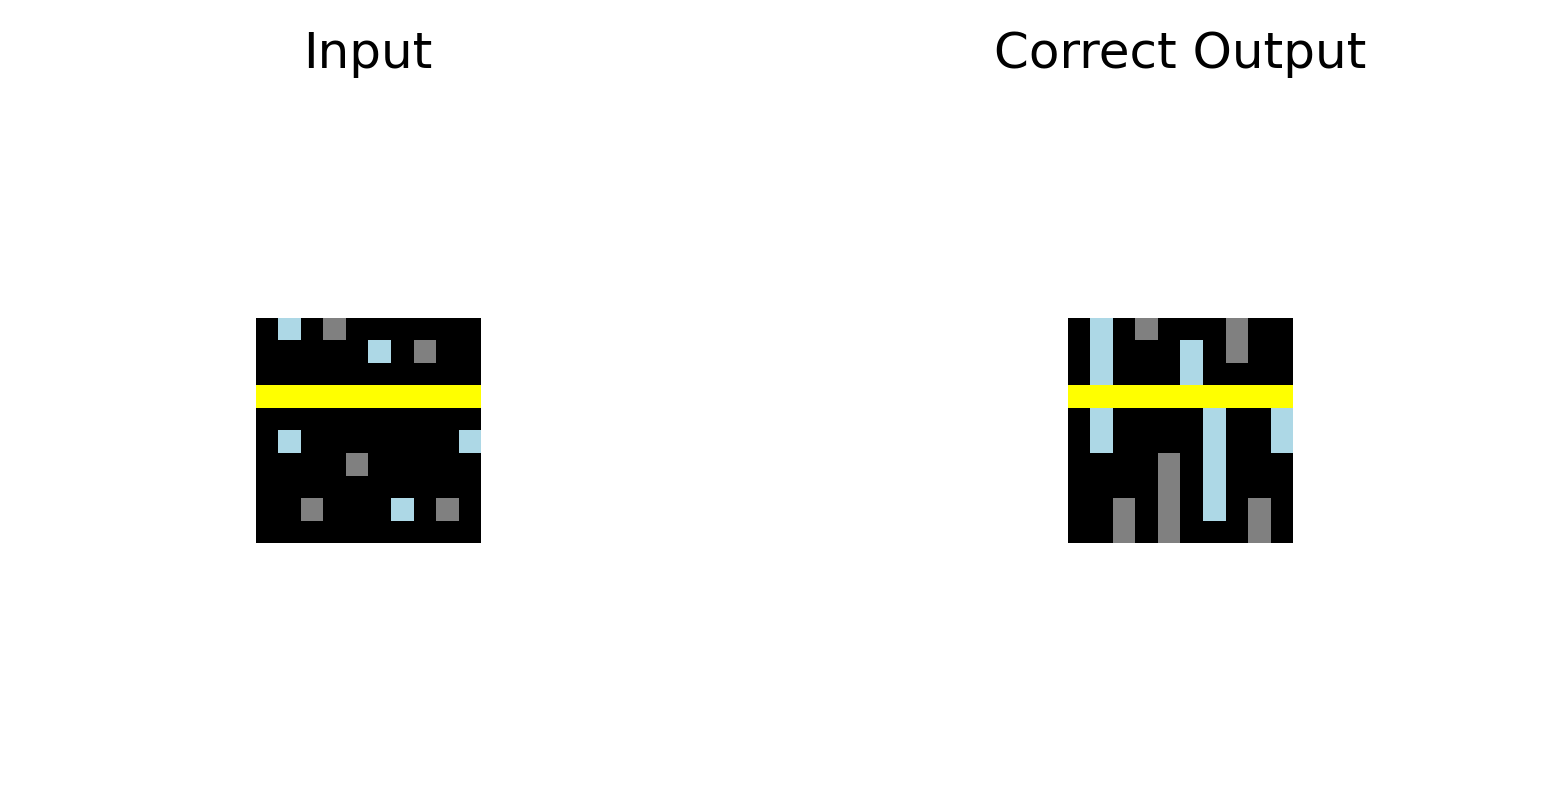

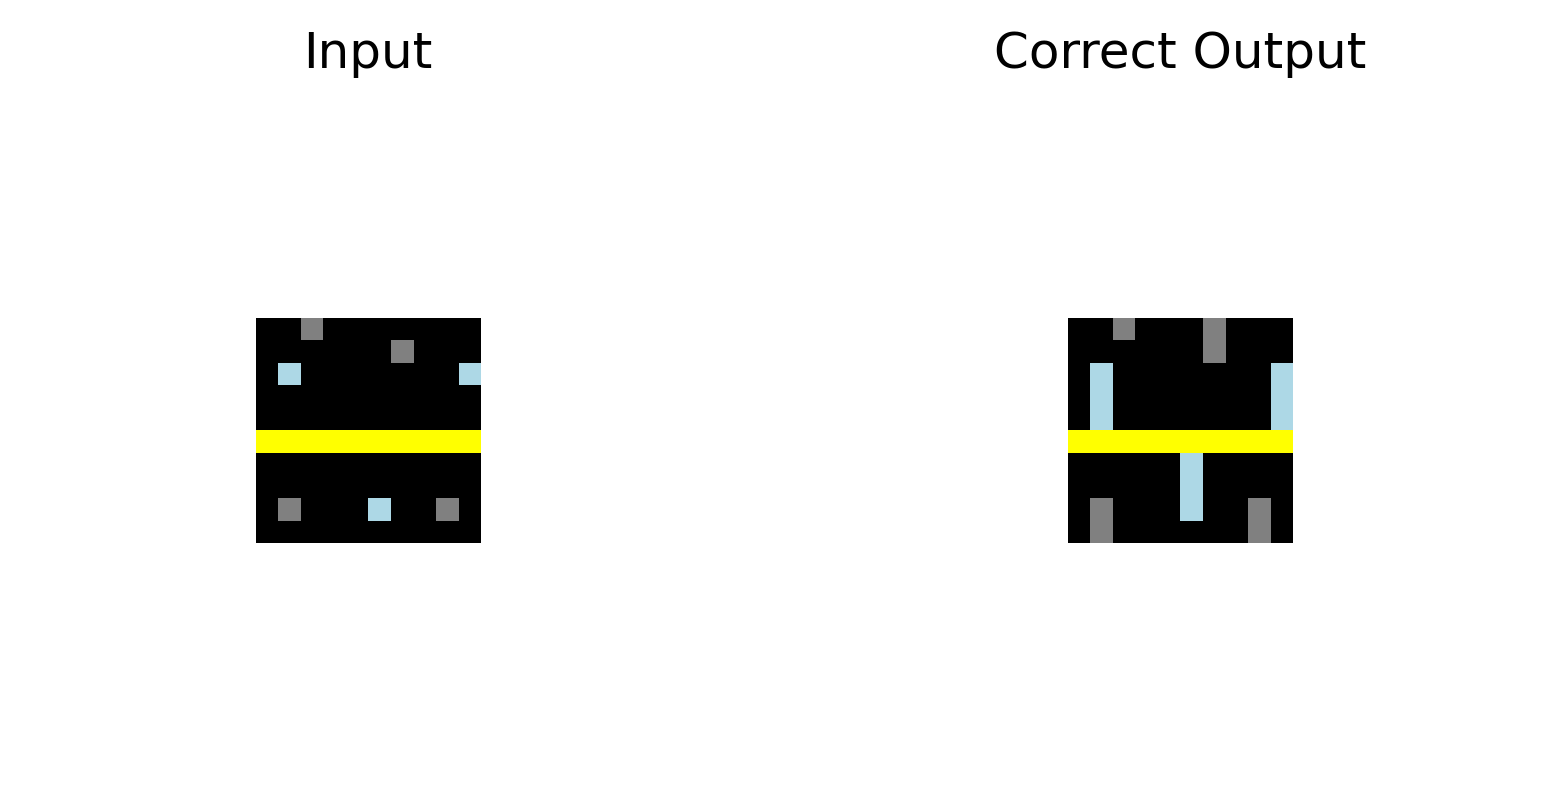

## Pos. 160 - Difficulty 0.014971911907196045 - Challenge a416b8f3

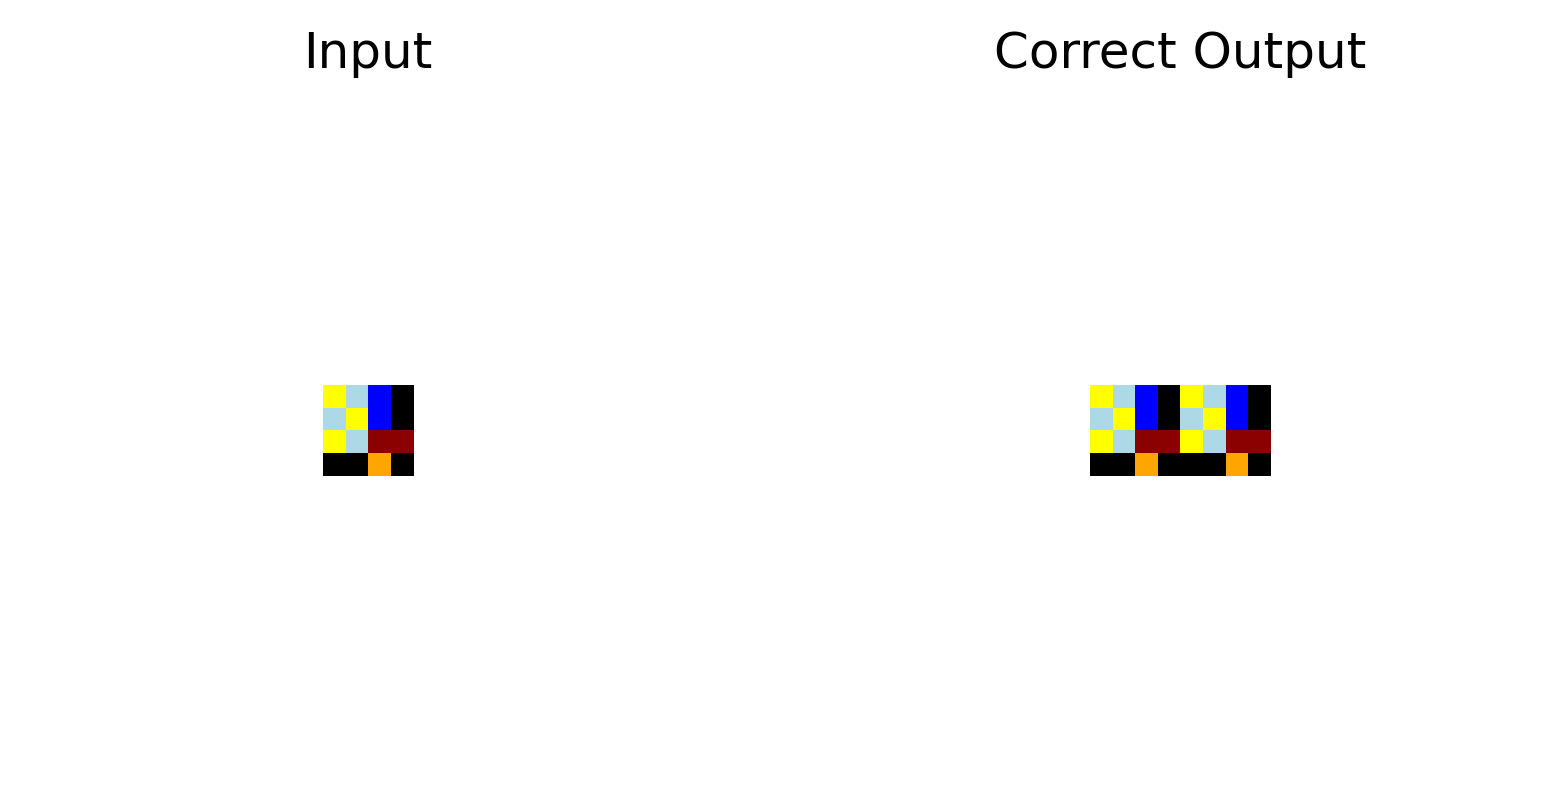

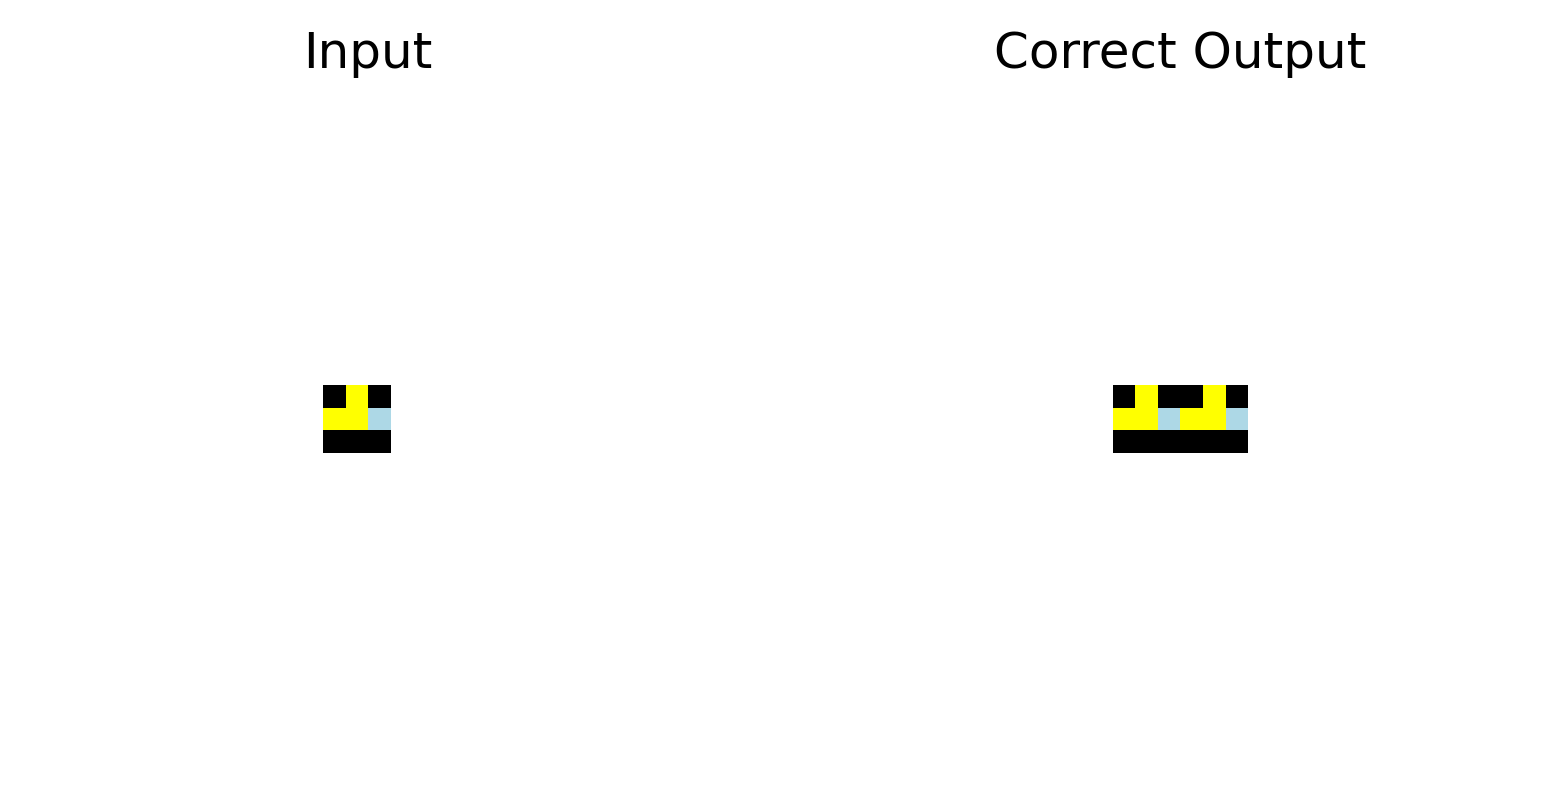

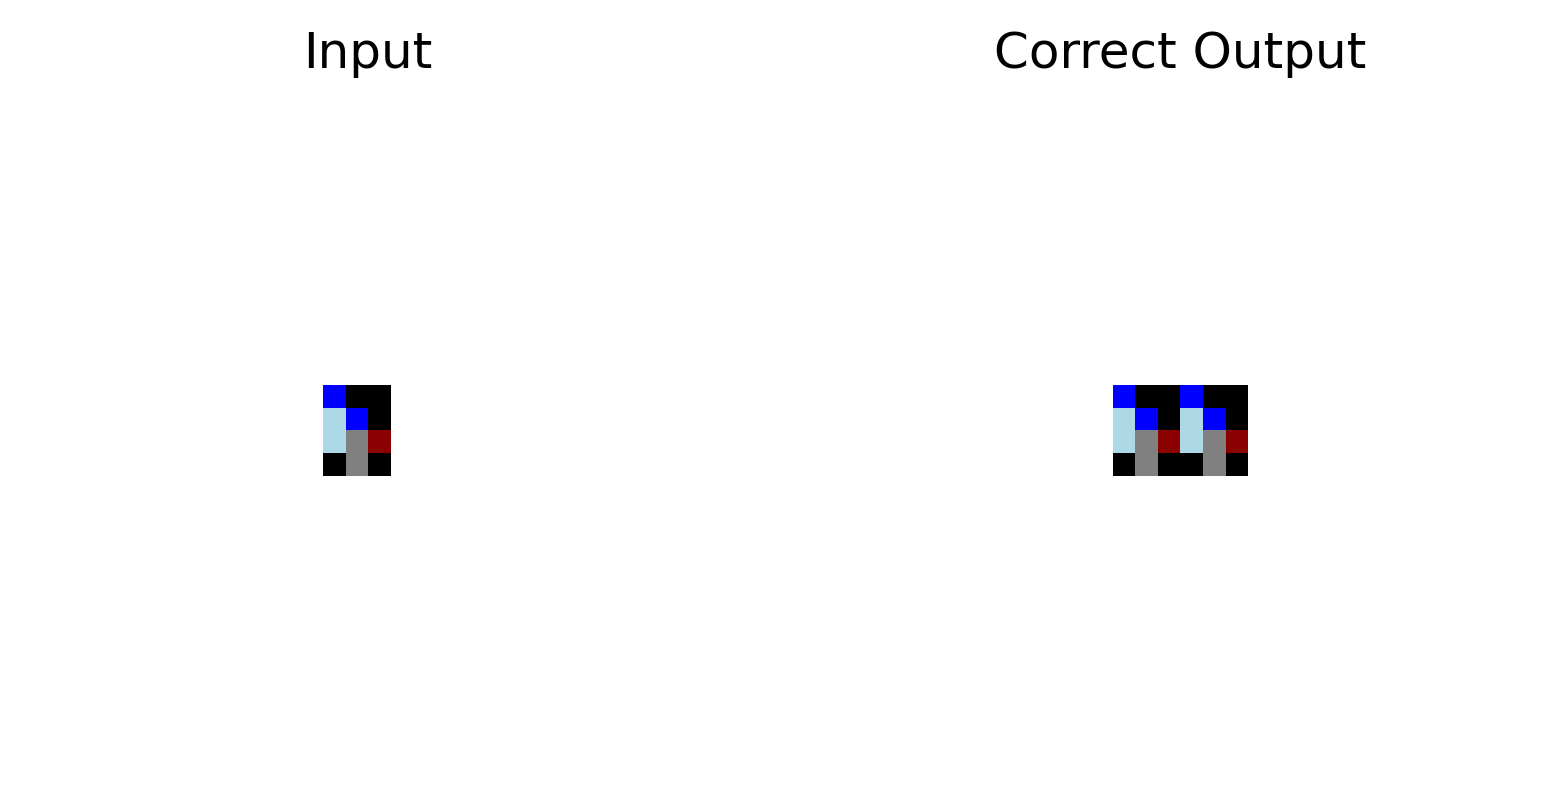

## Pos. 180 - Difficulty 0.016736209392547607 - Challenge 4093f84a

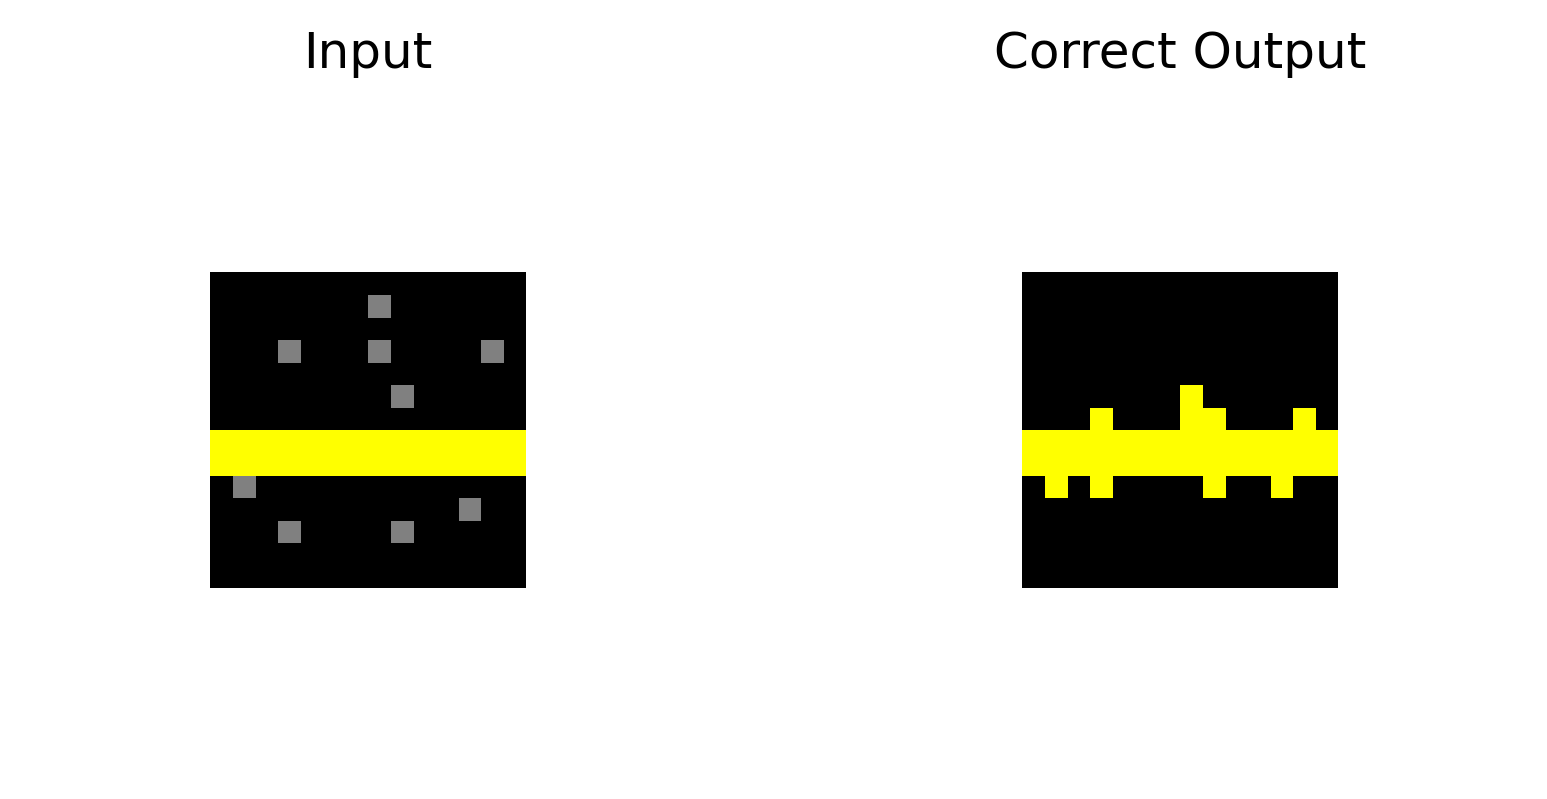

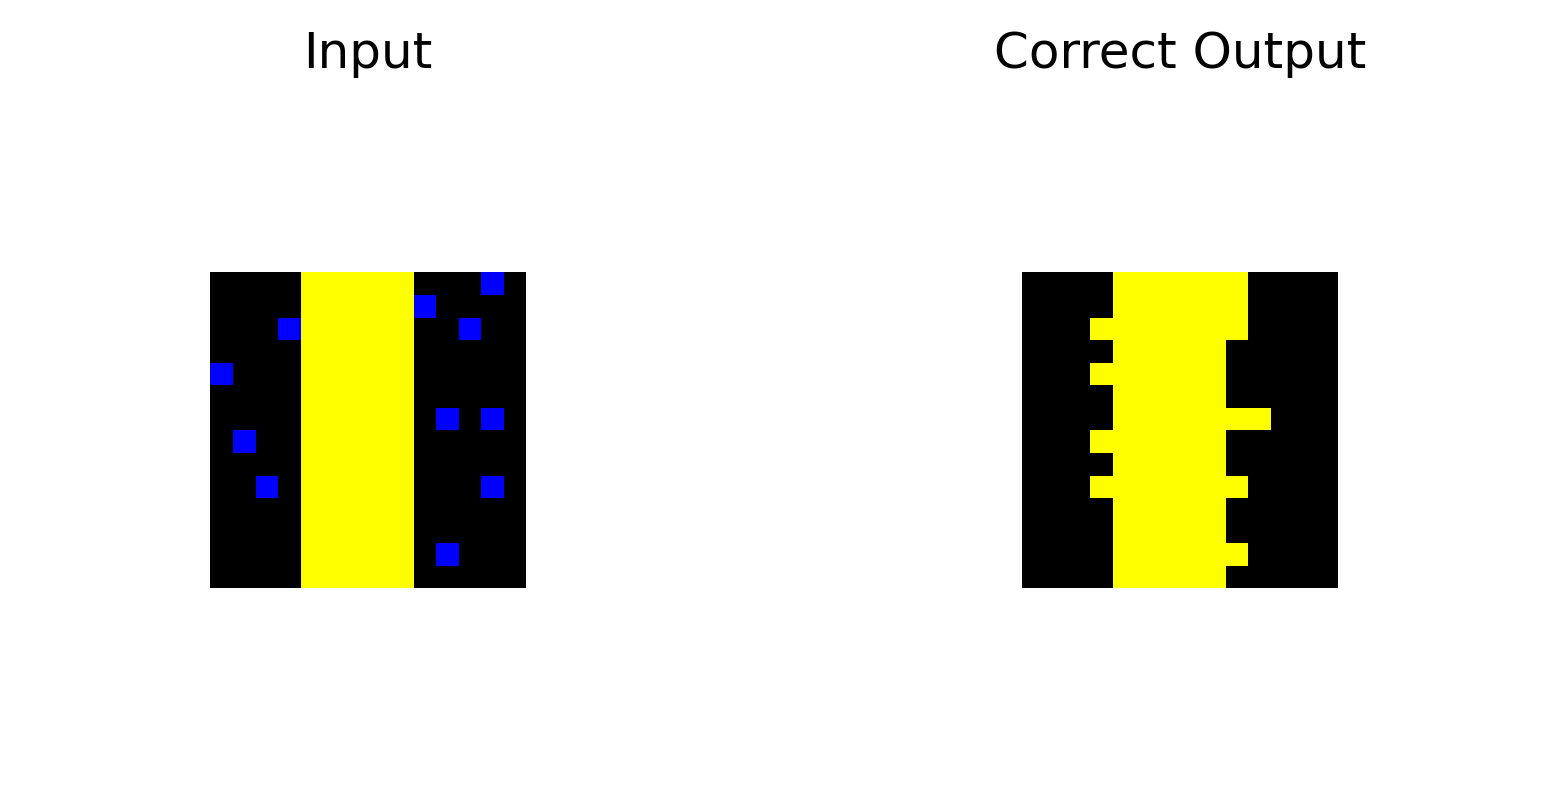

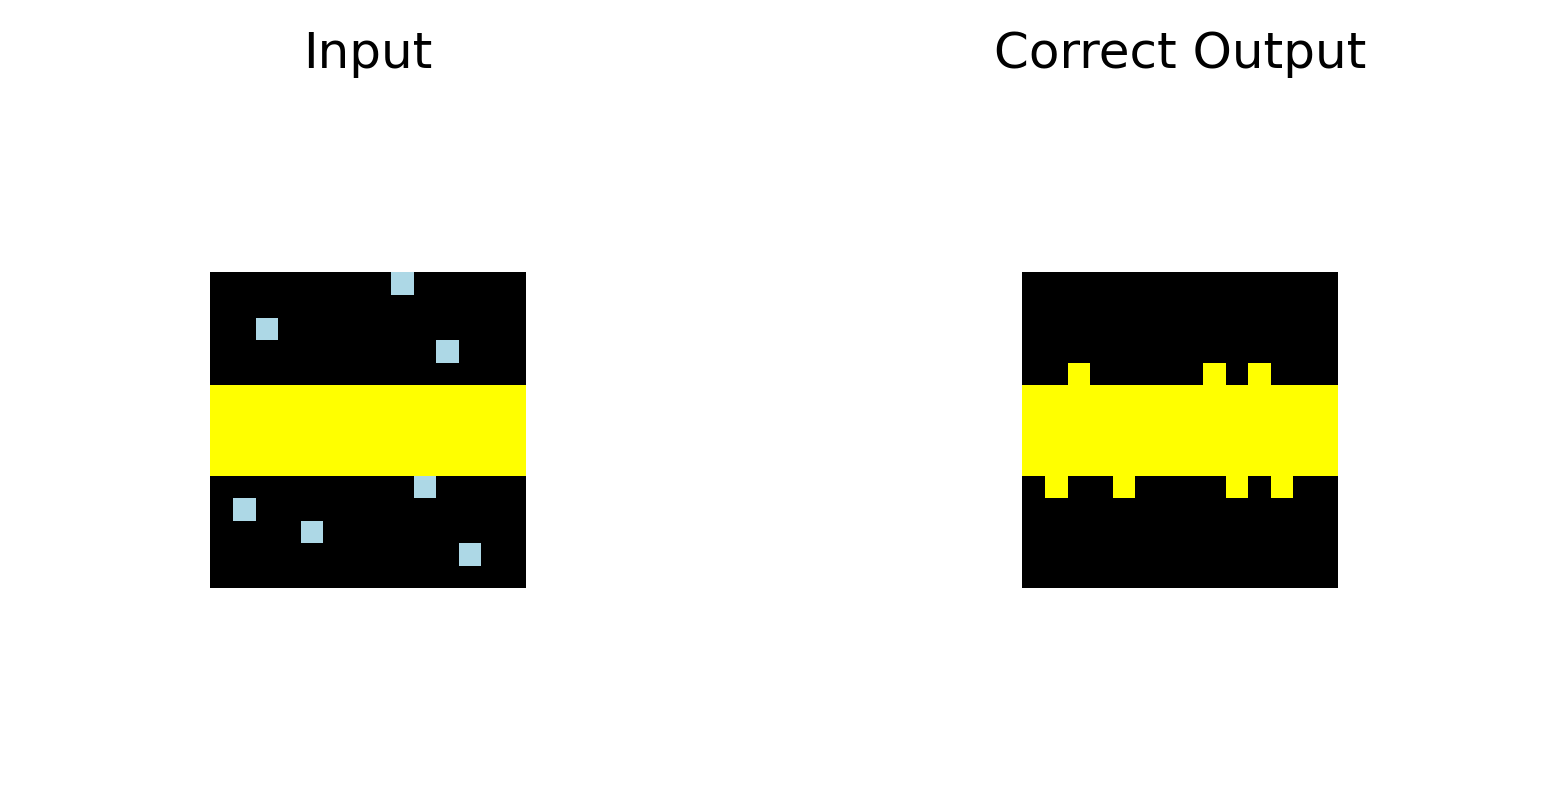

## Pos. 200 - Difficulty 0.01995992660522461 - Challenge 8e5a5113

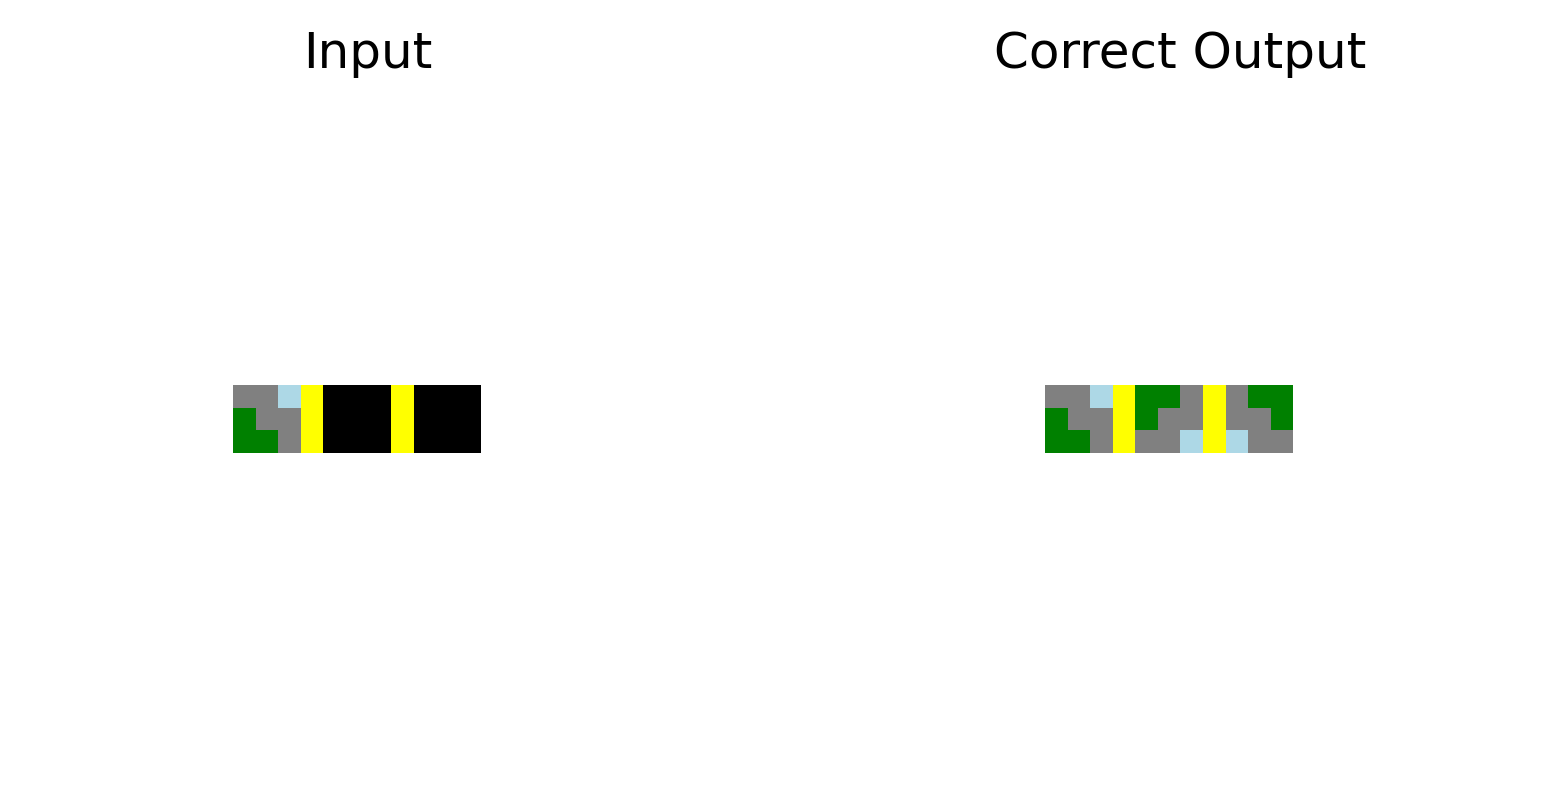

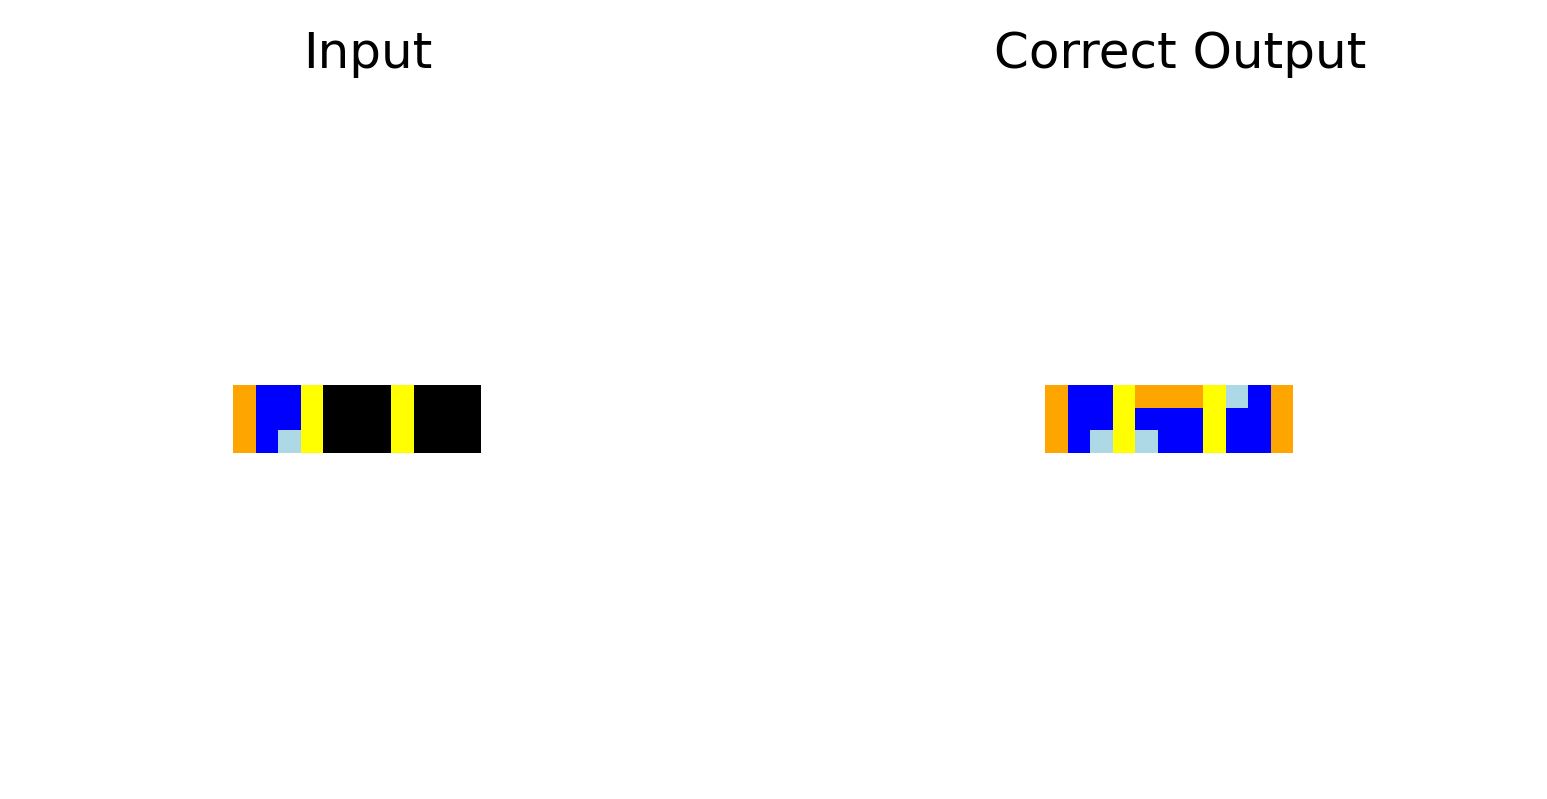

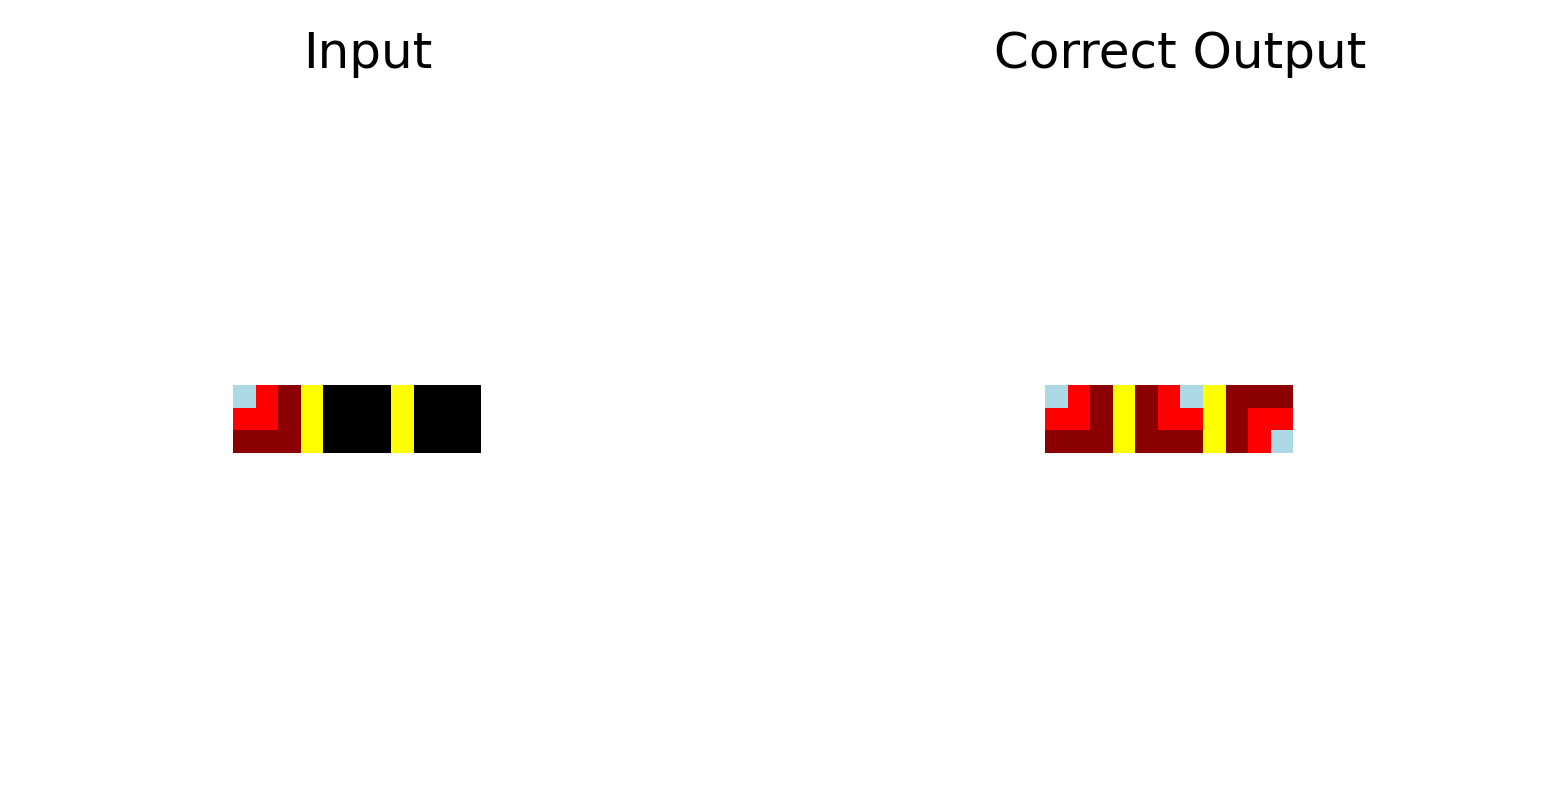

## Pos. 220 - Difficulty 0.023006677627563477 - Challenge 56ff96f3

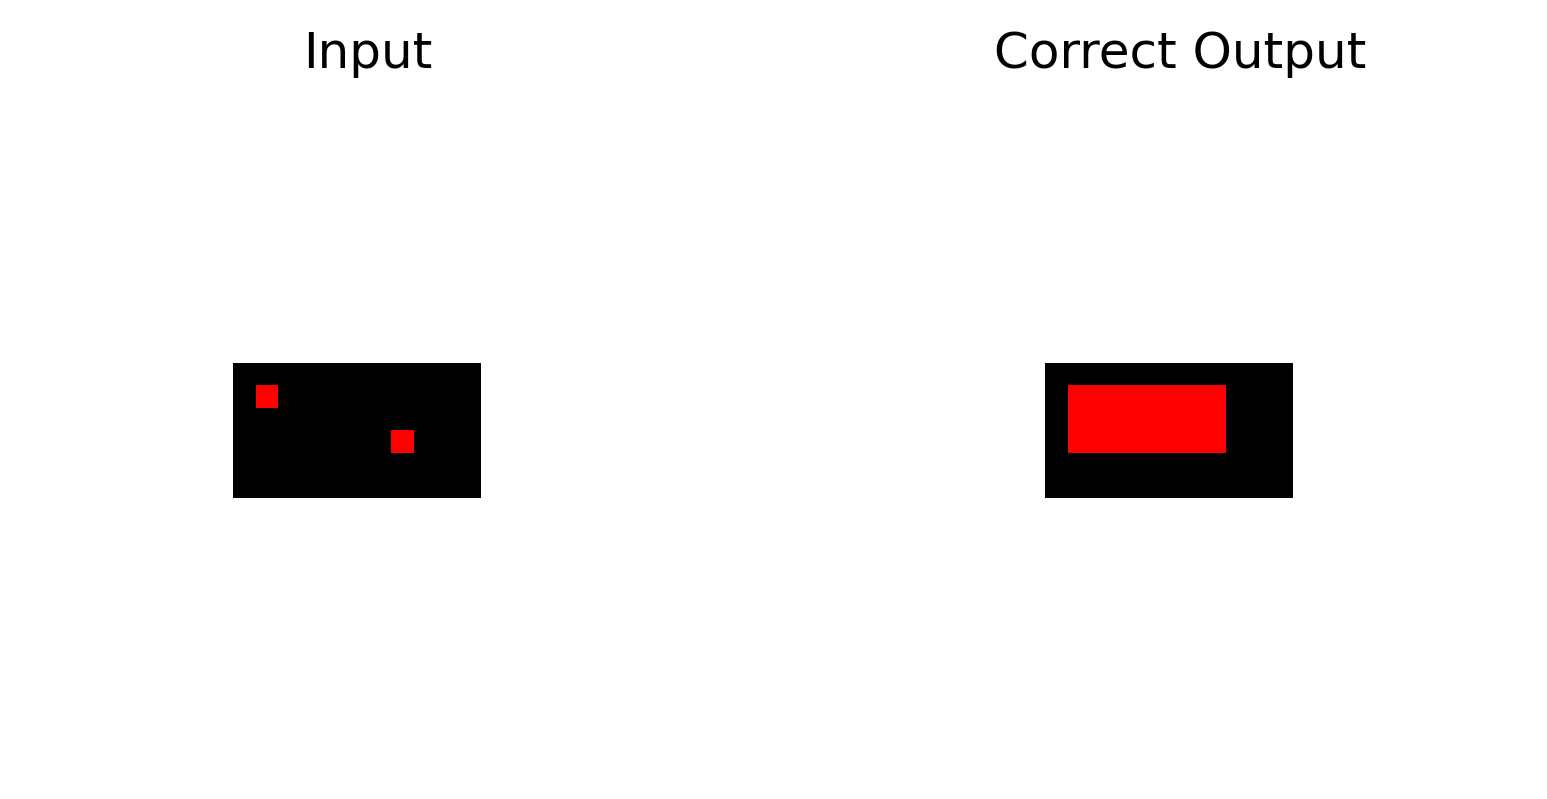

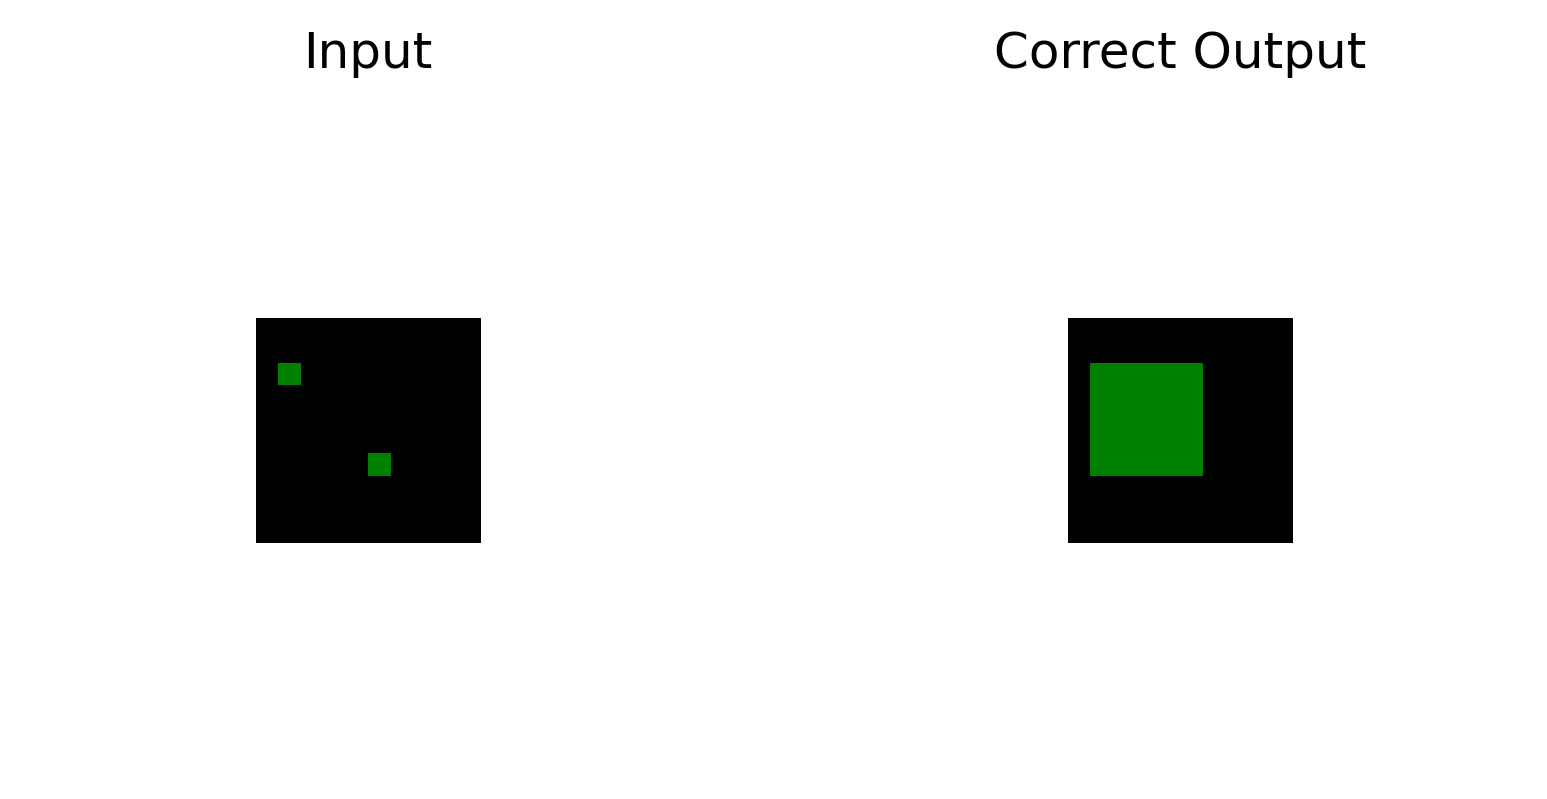

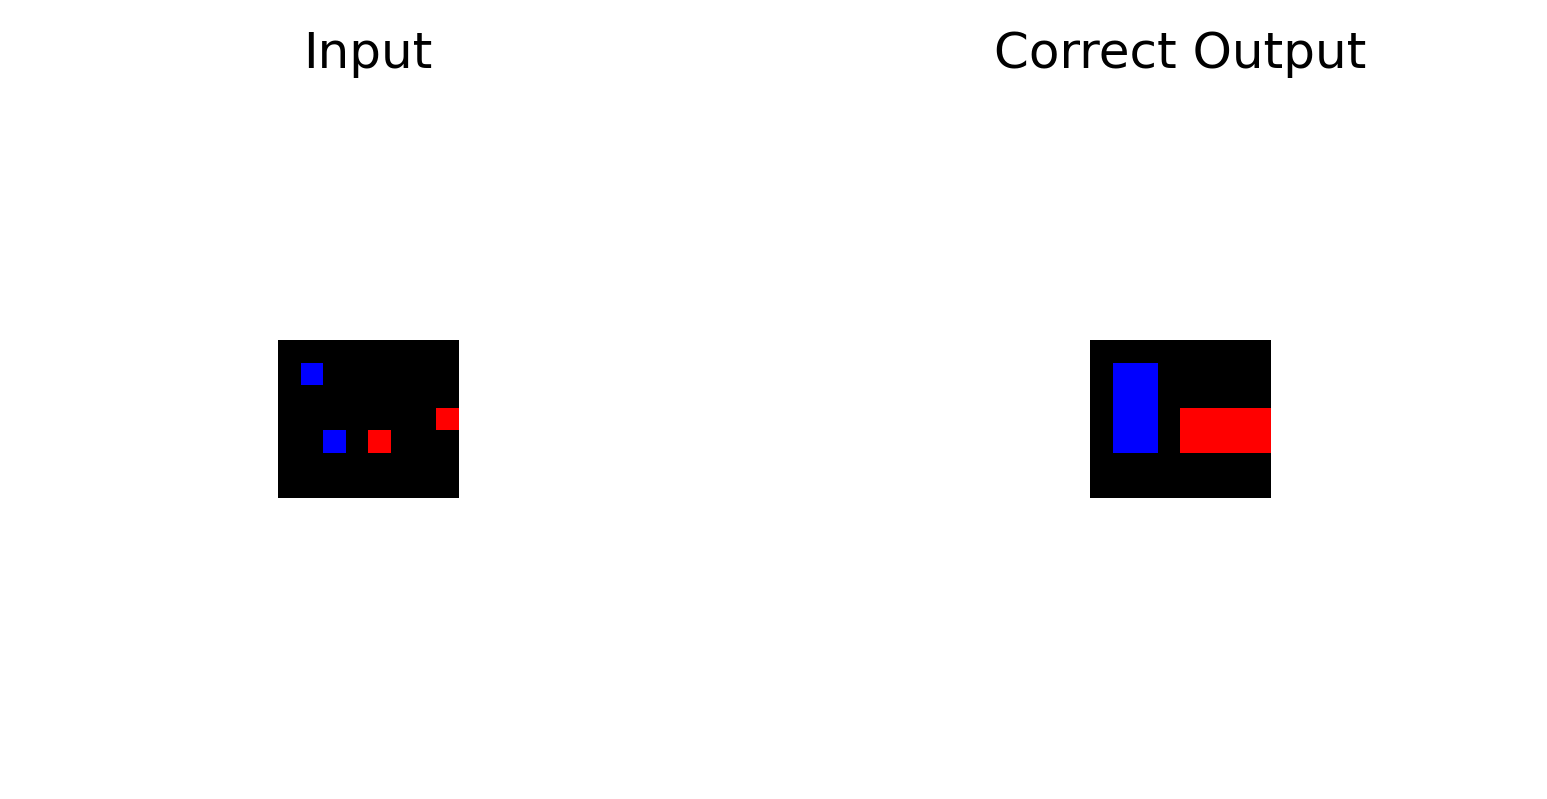

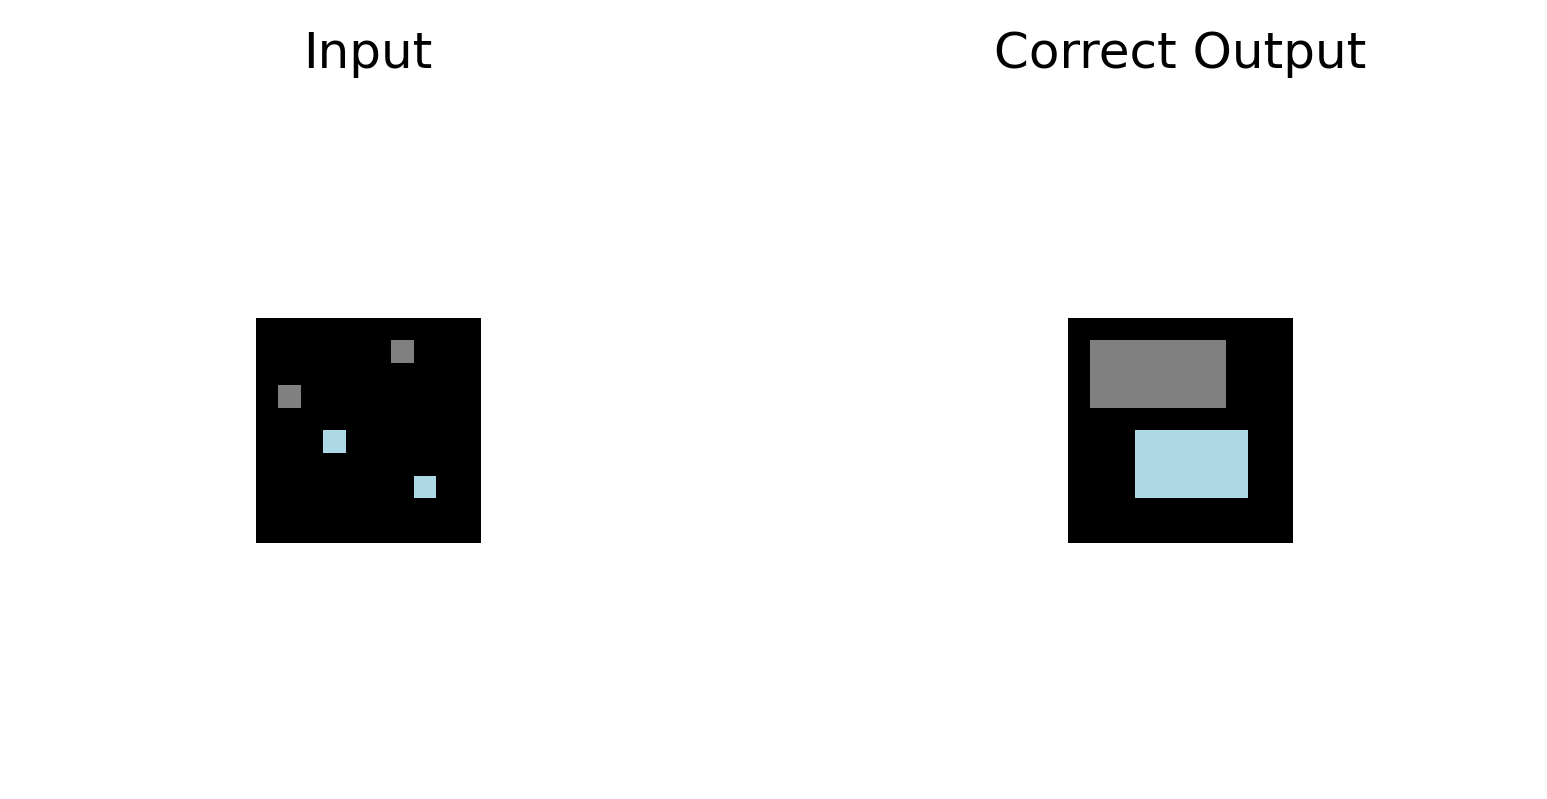

## Pos. 240 - Difficulty 0.027462244033813477 - Challenge ce4f8723

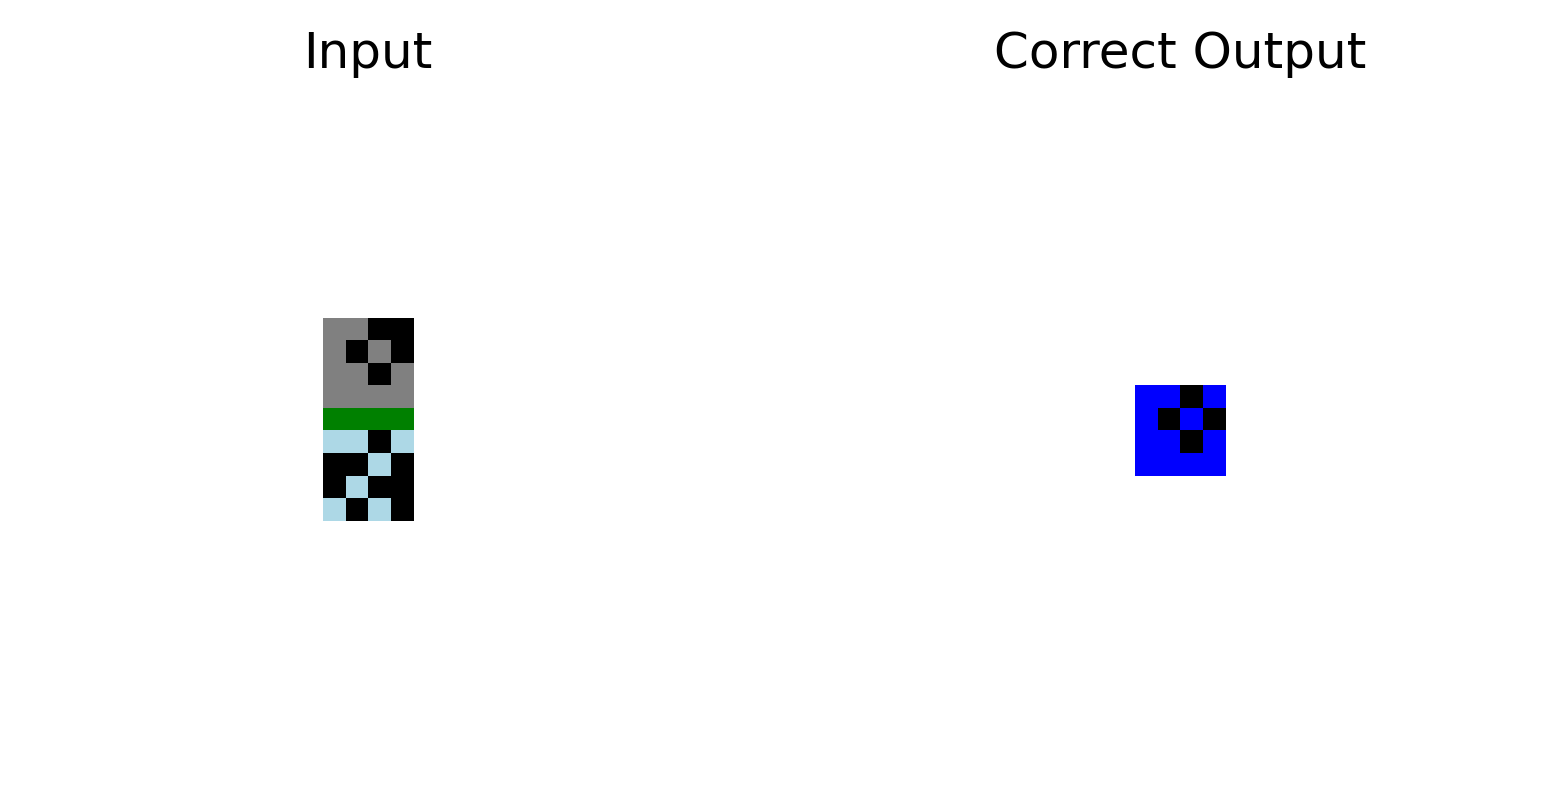

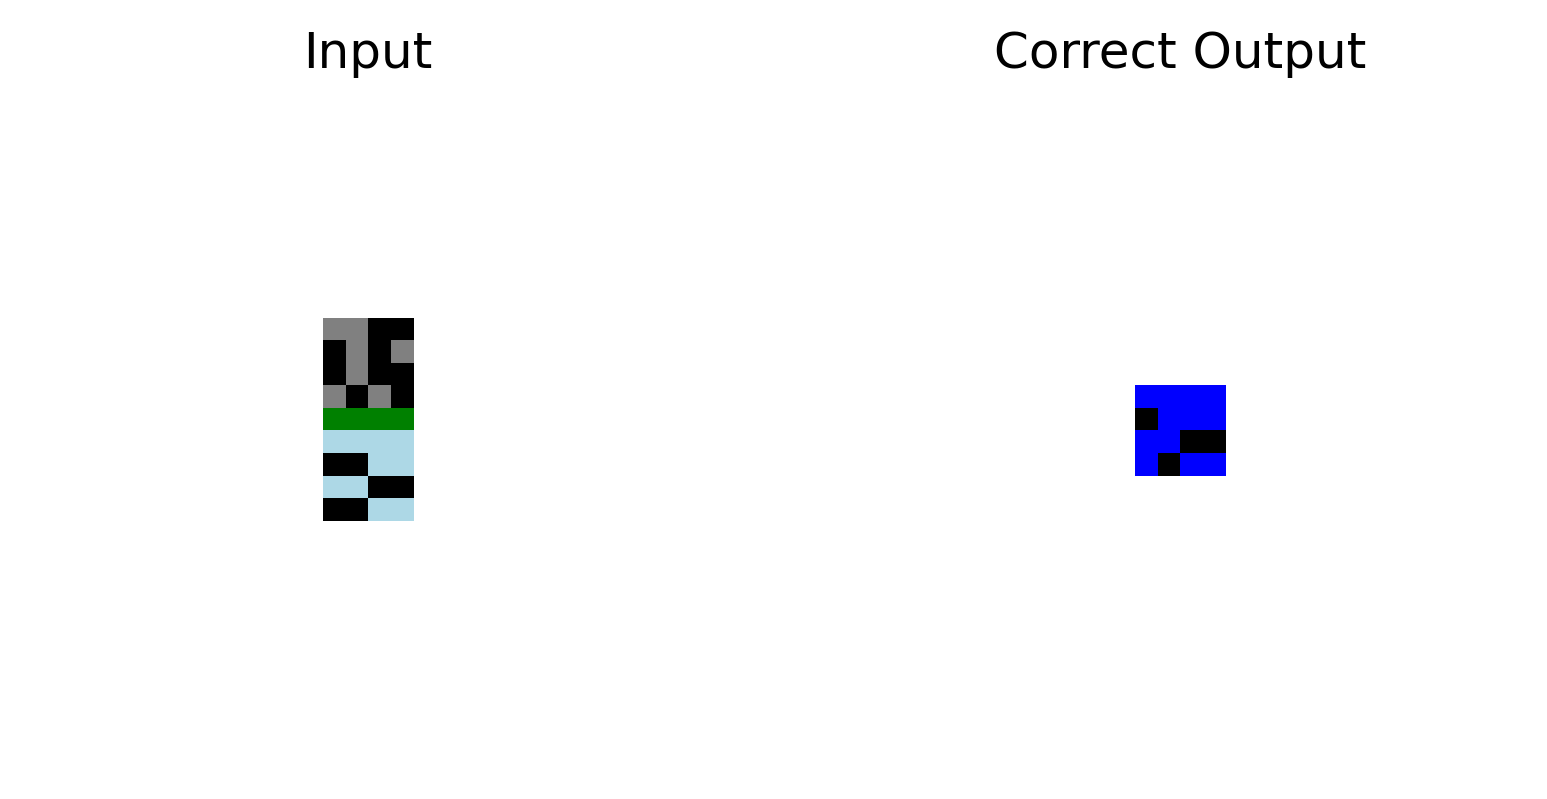

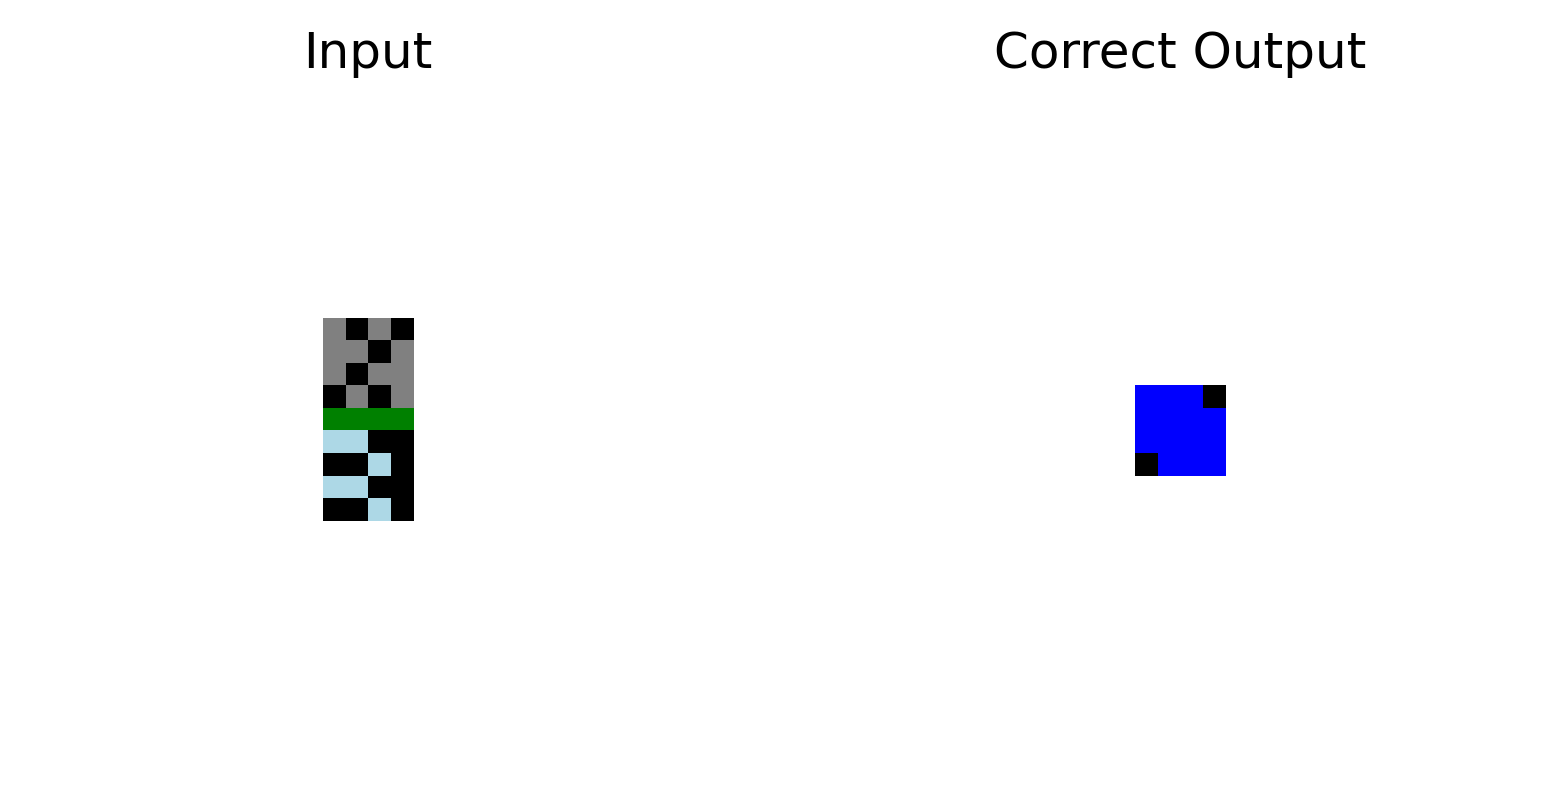

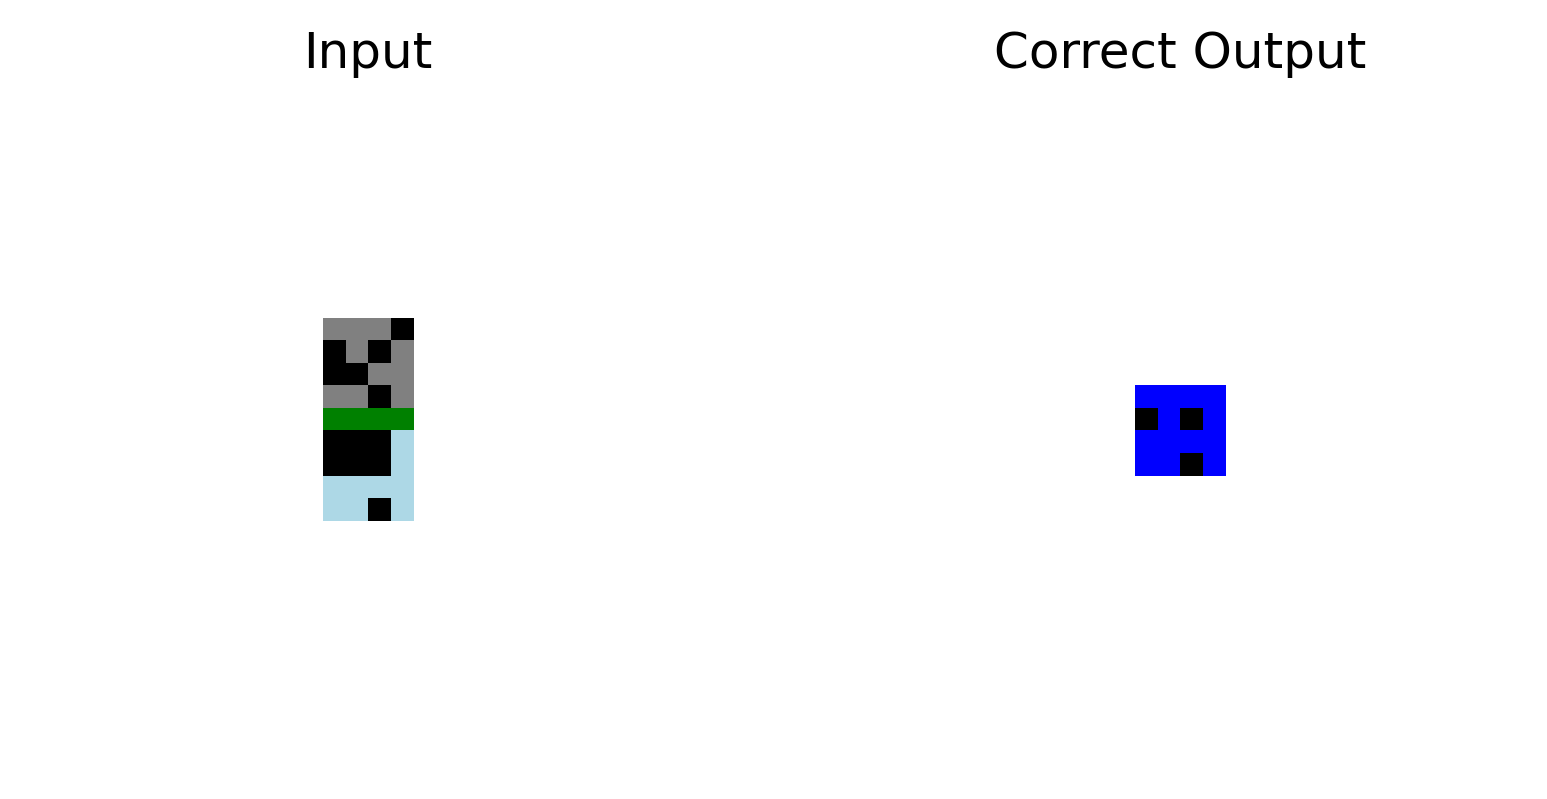

## Pos. 260 - Difficulty 0.033531010150909424 - Challenge 3befdf3e

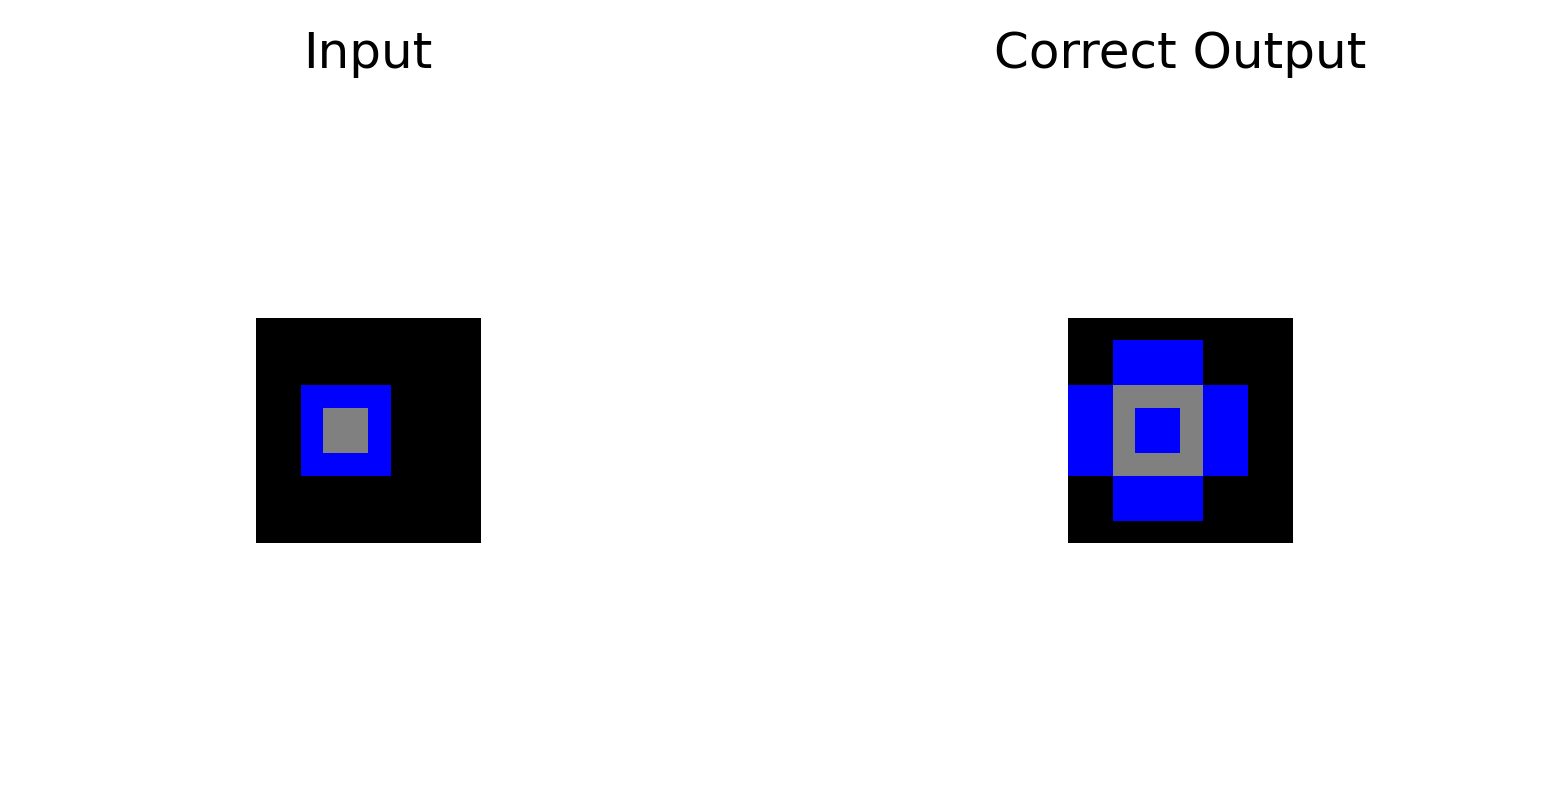

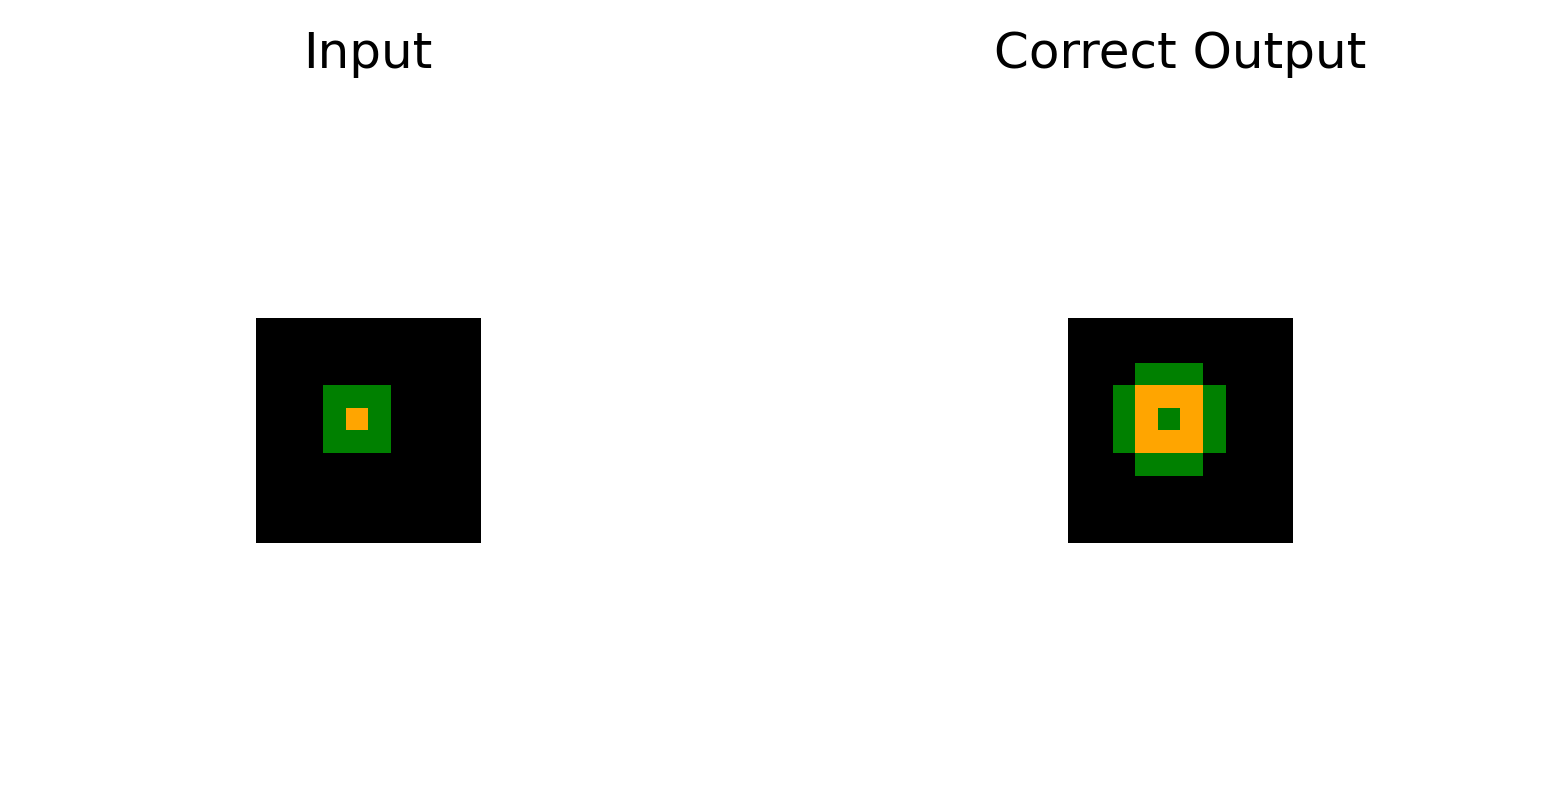

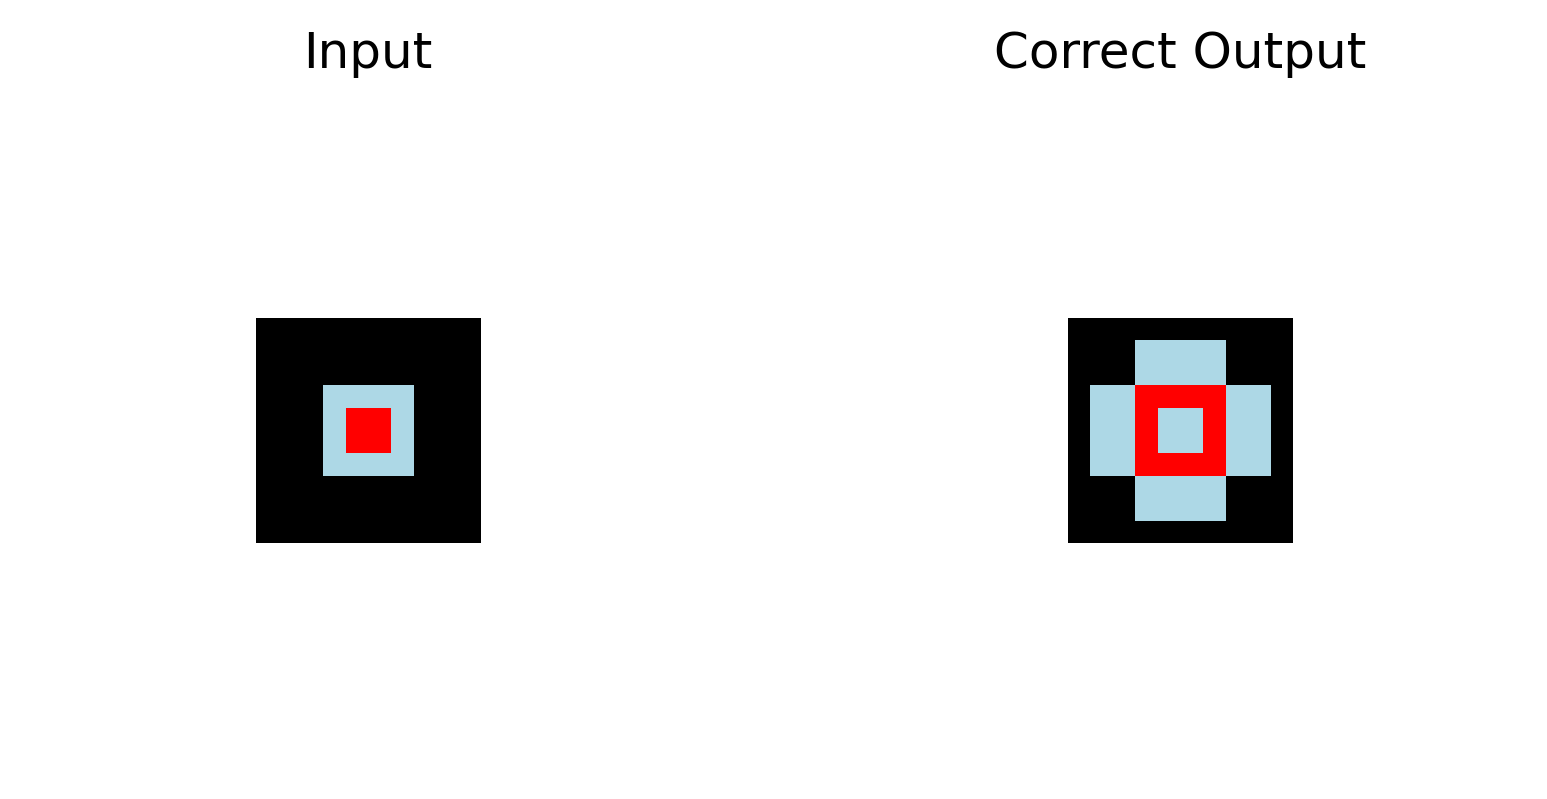

## Pos. 280 - Difficulty 0.04245913028717041 - Challenge 75b8110e

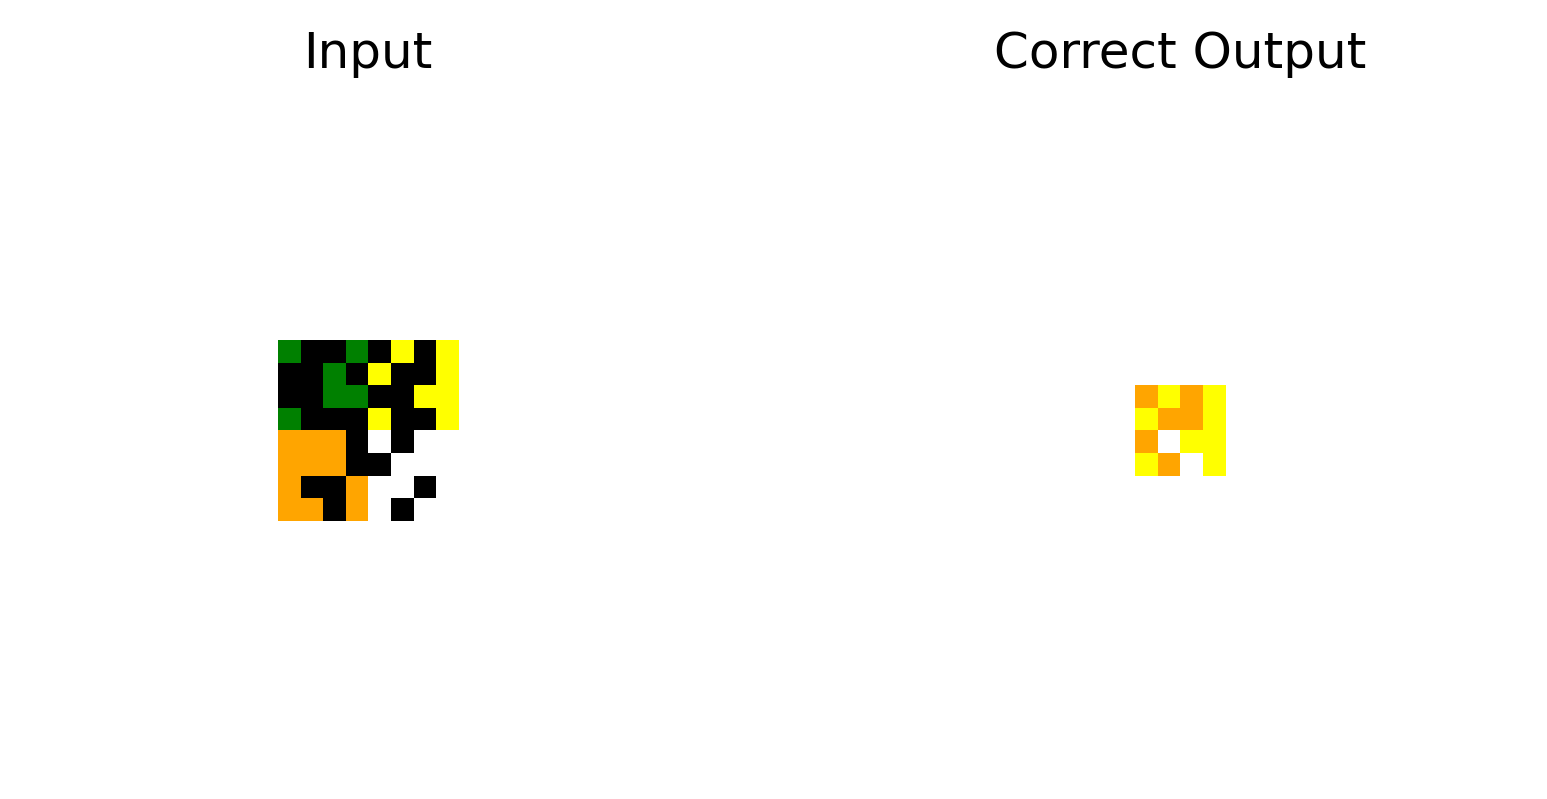

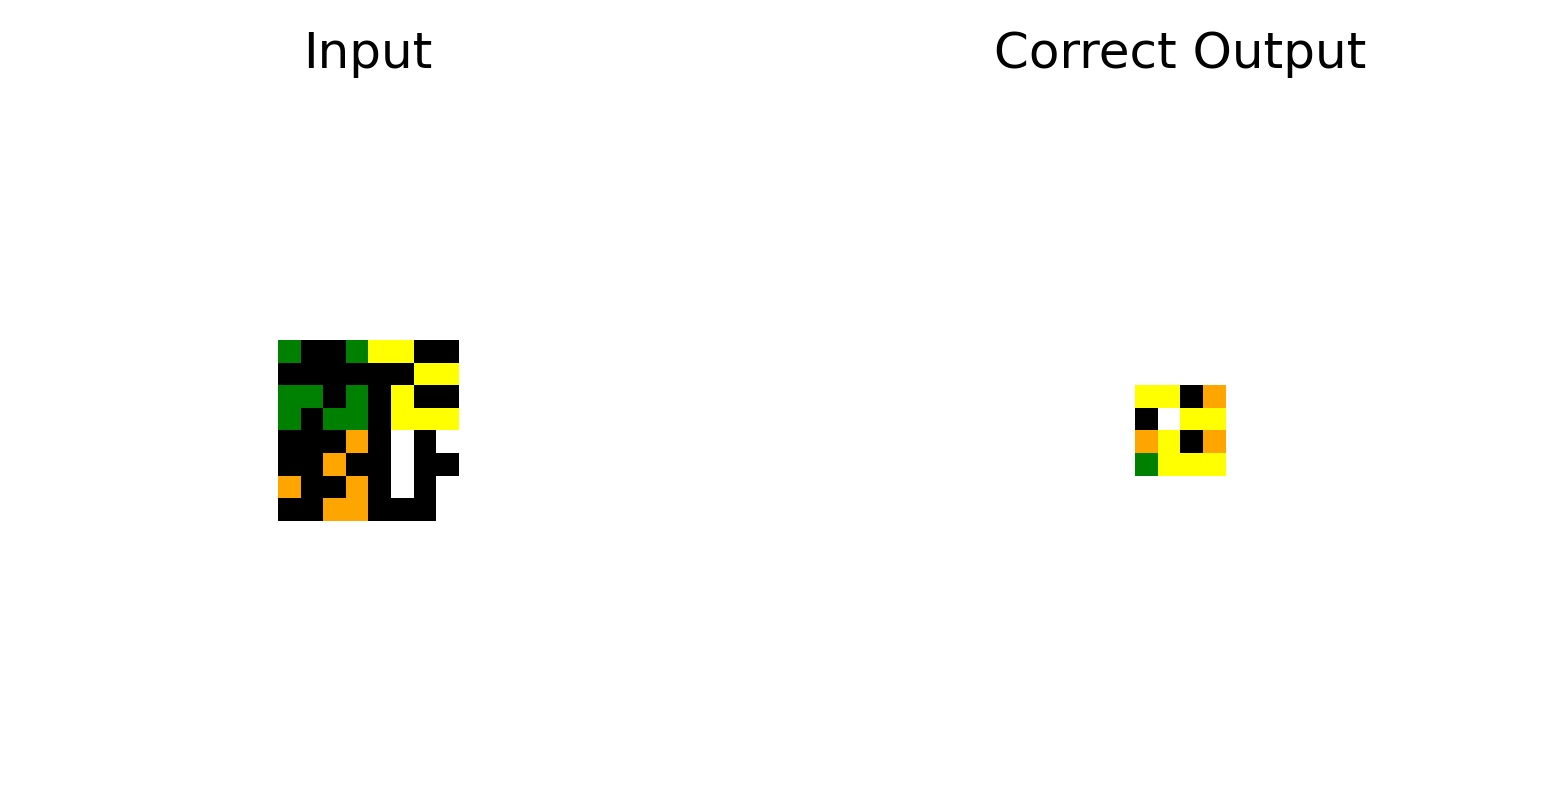

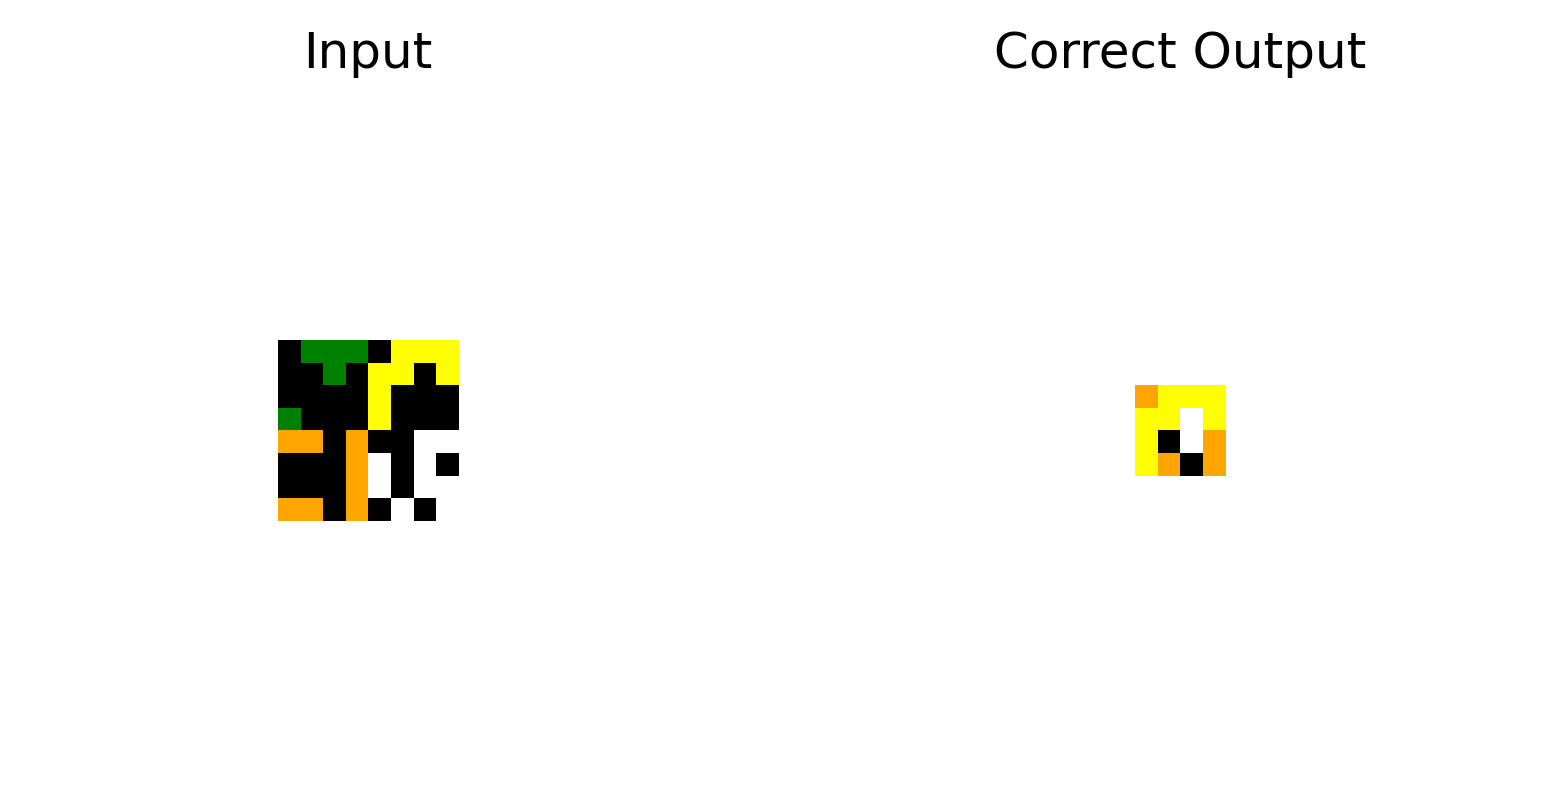

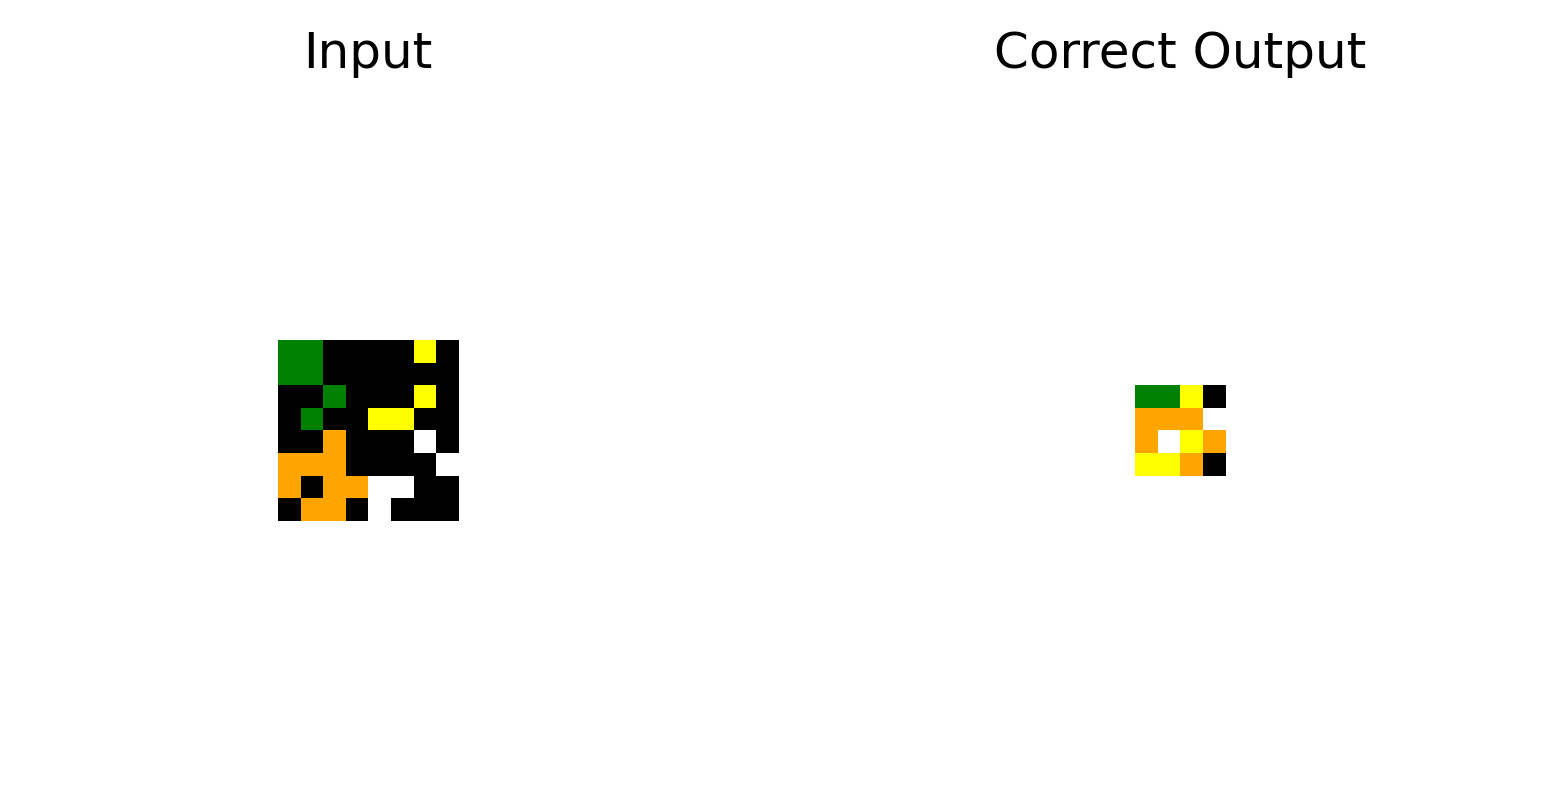

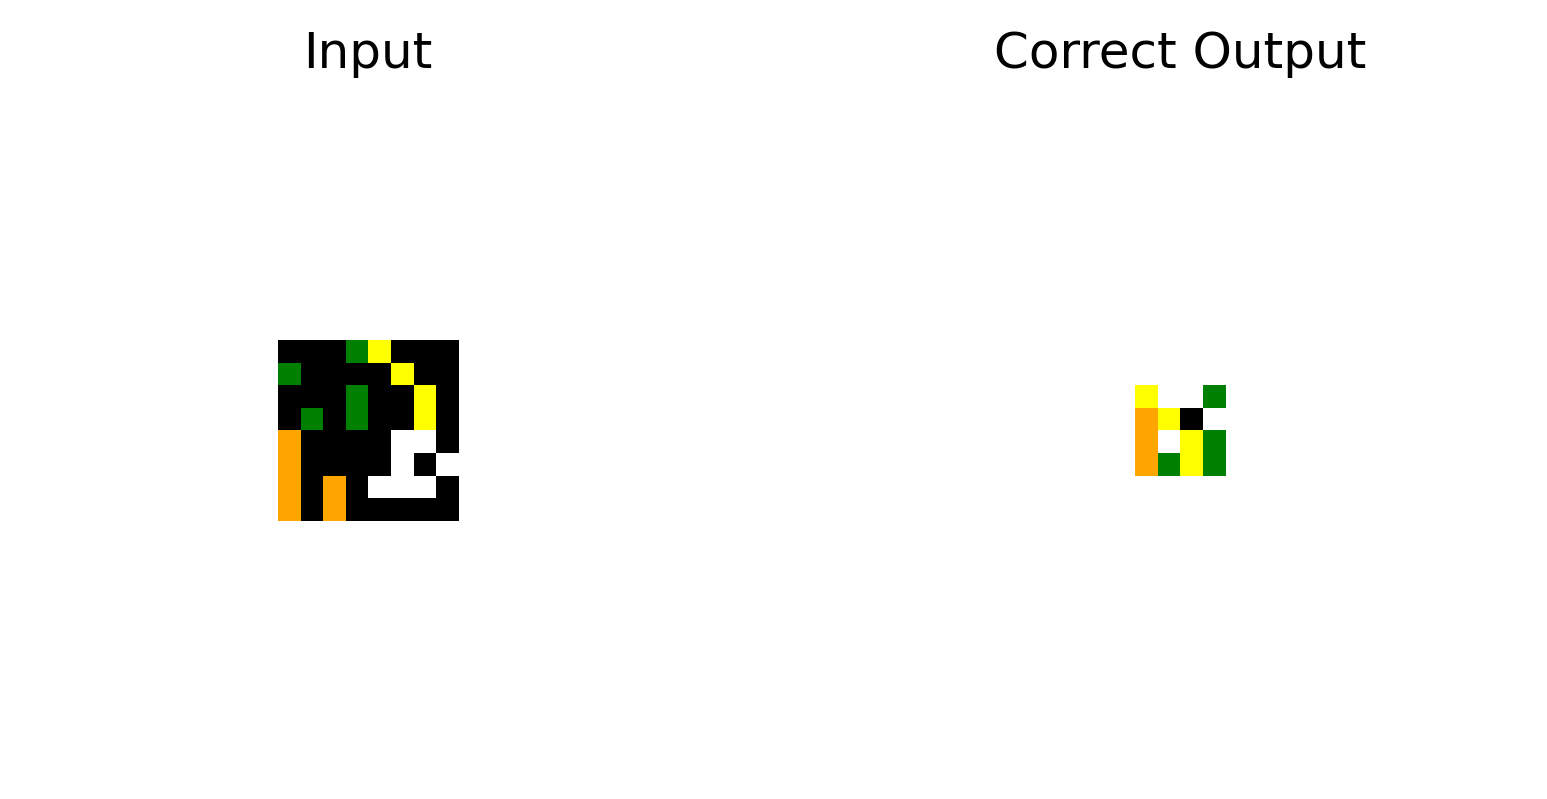

## Pos. 300 - Difficulty 0.05473405122756958 - Challenge a68b268e

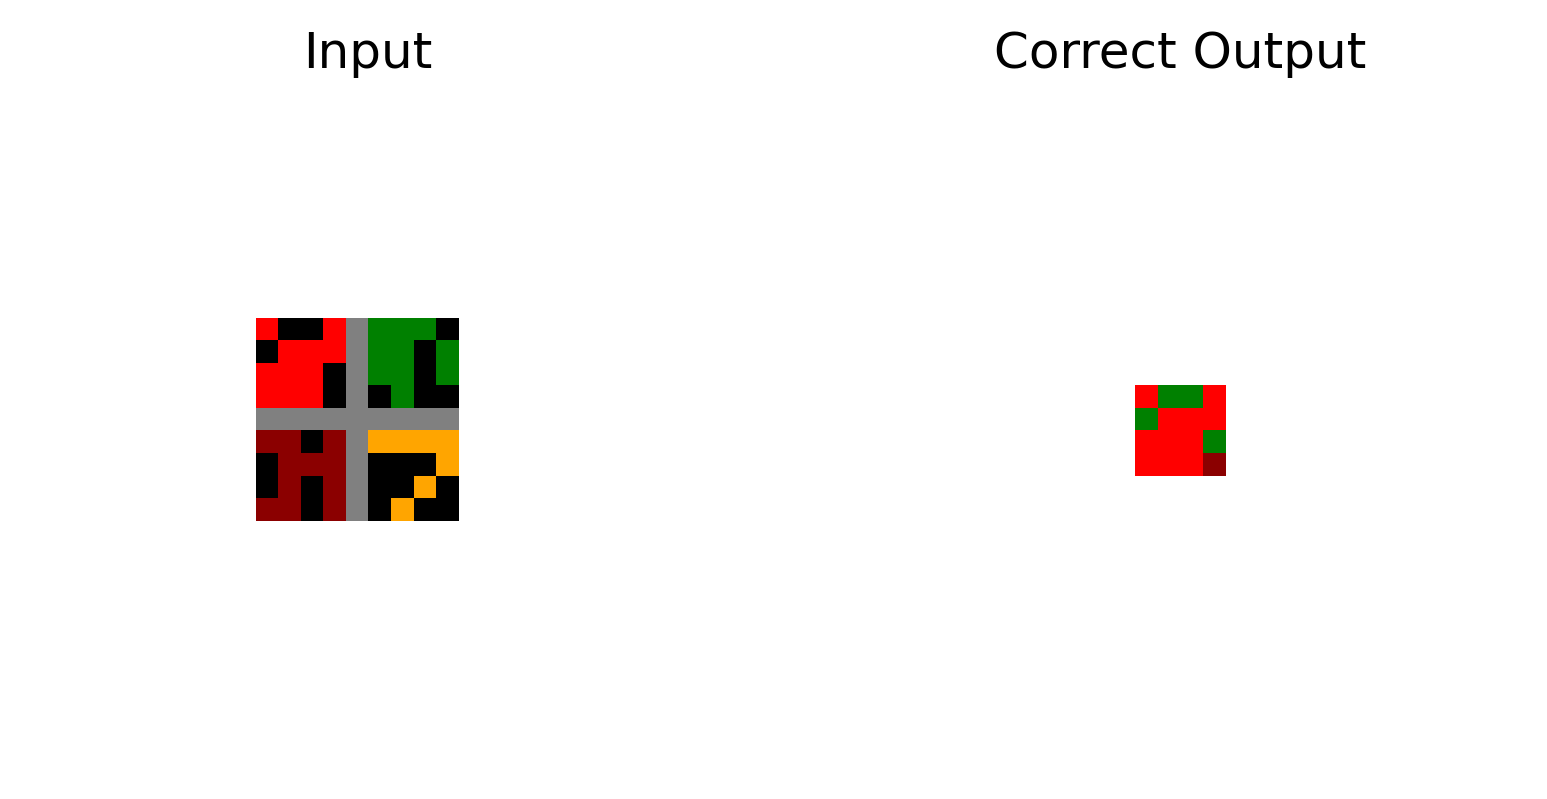

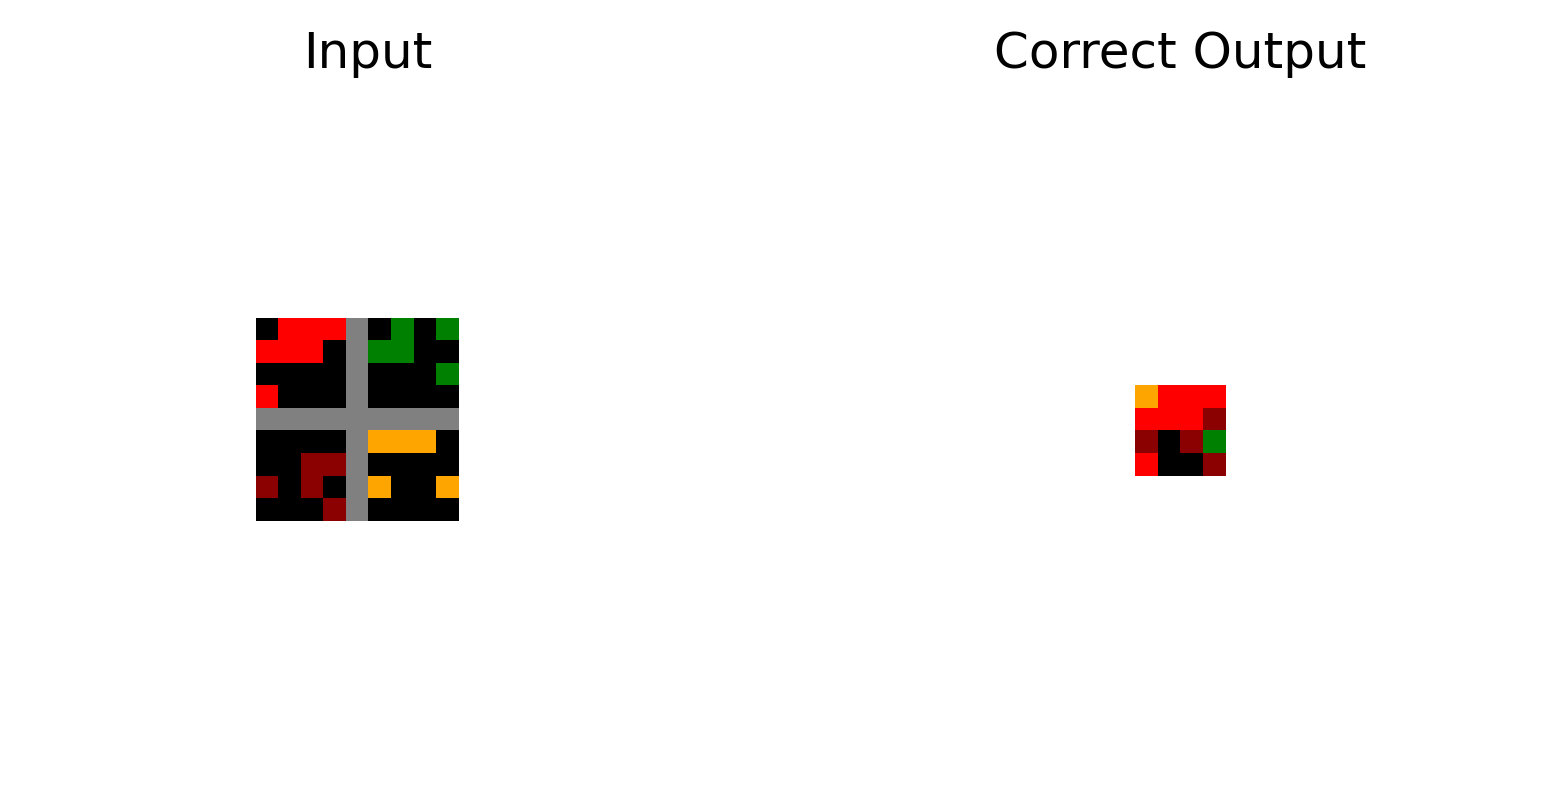

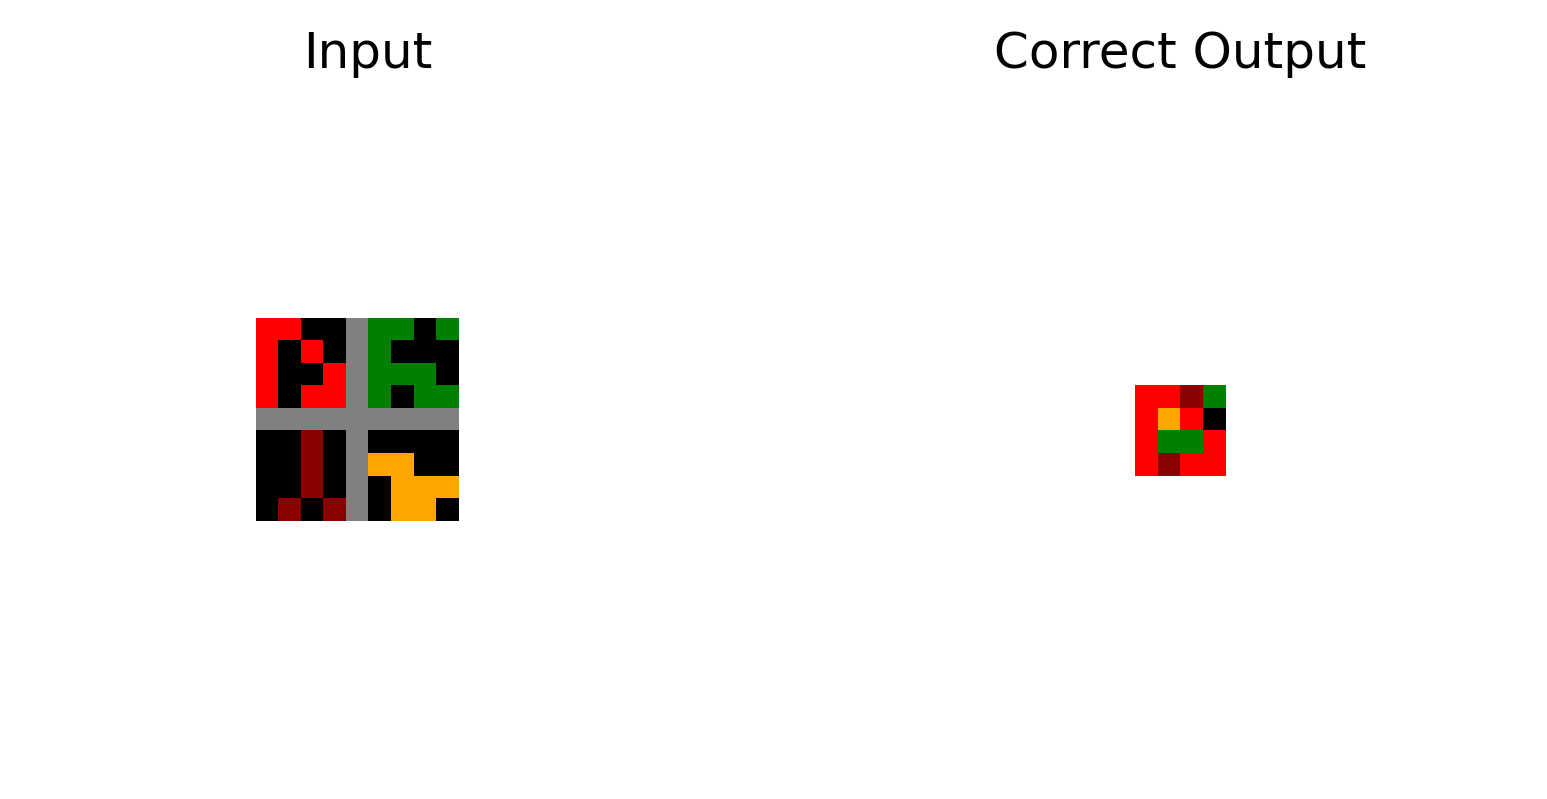

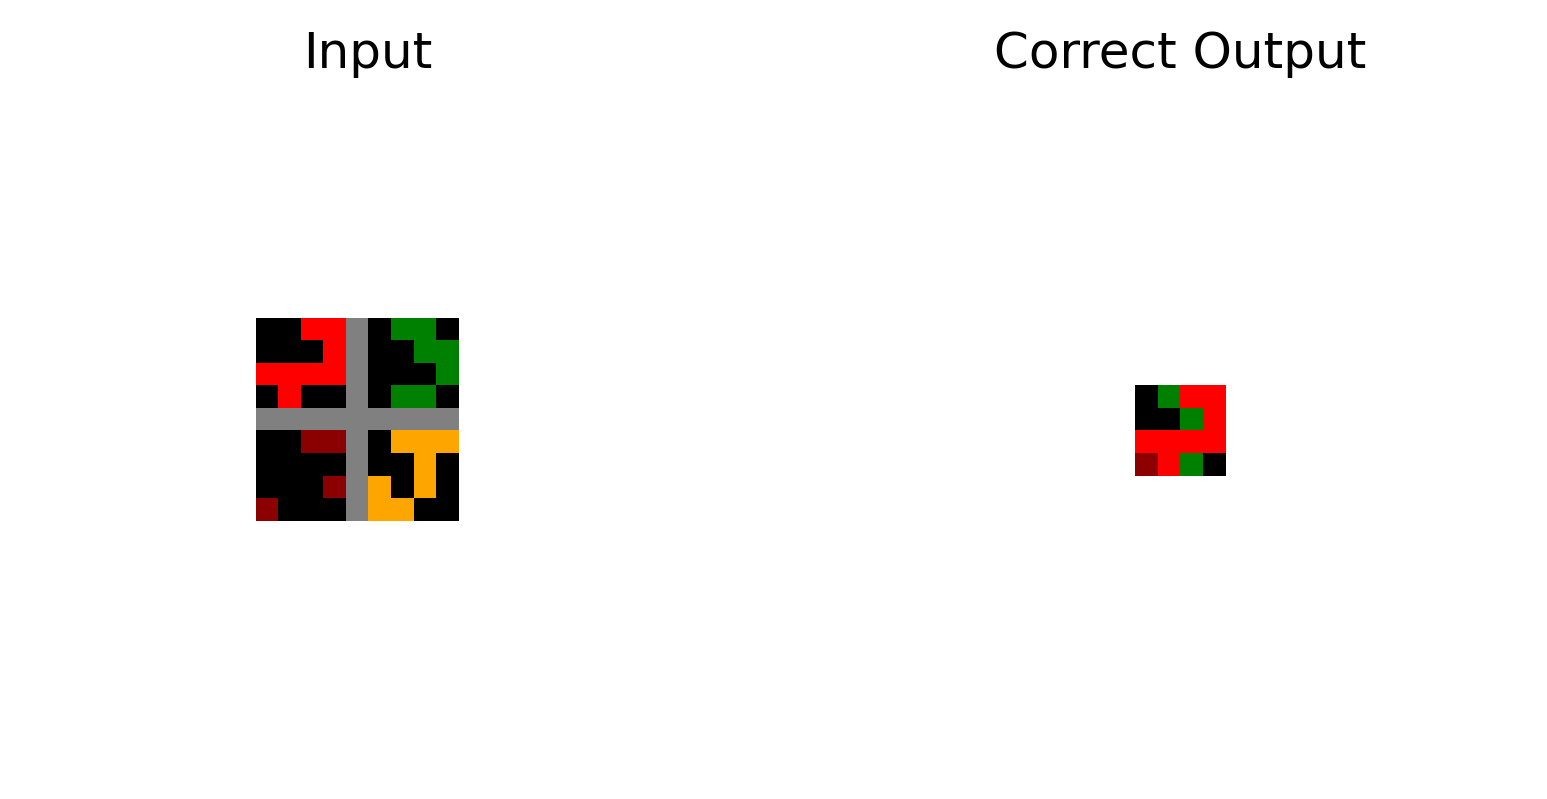

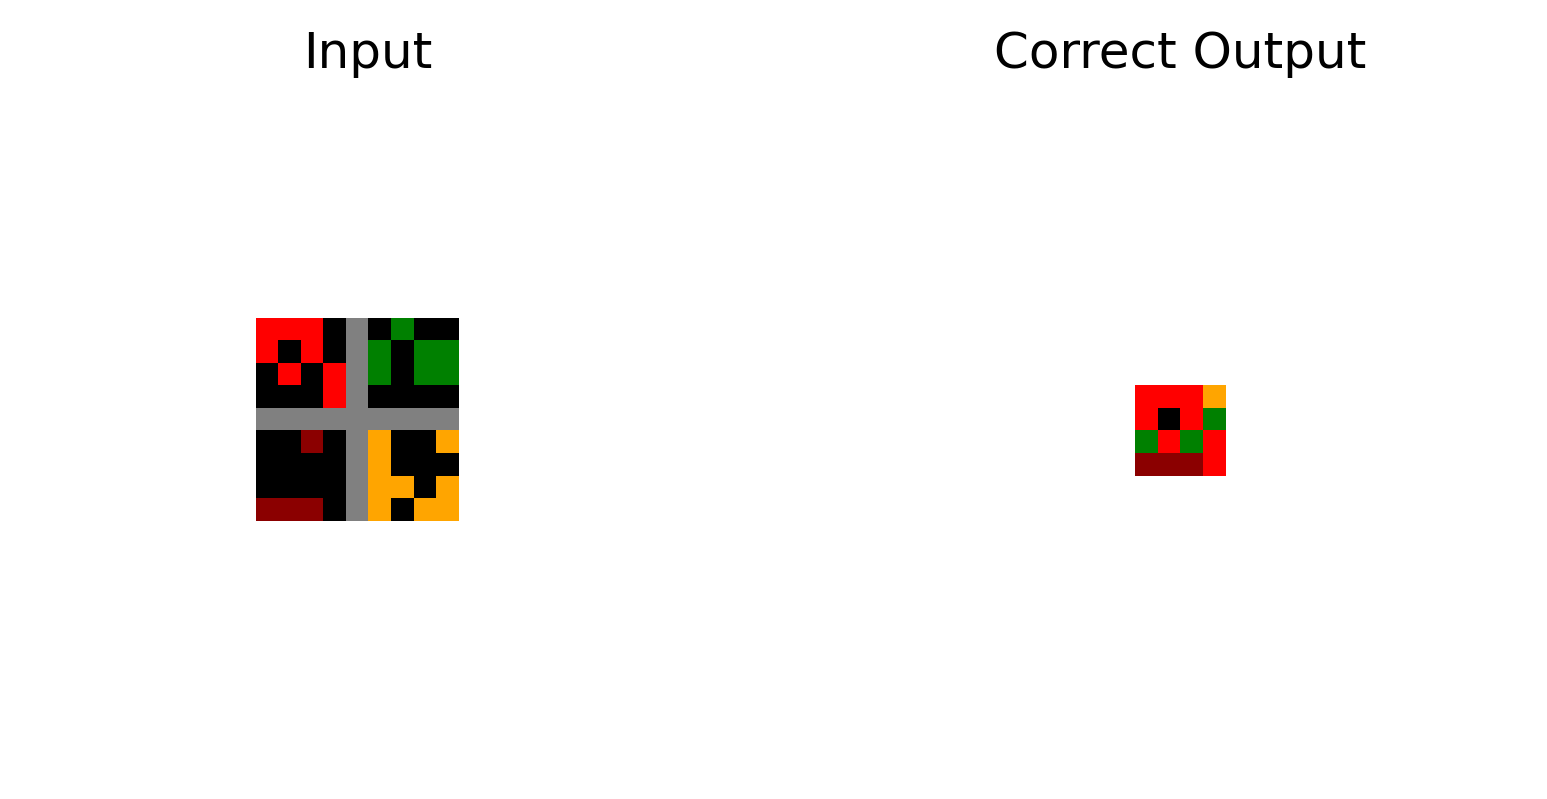

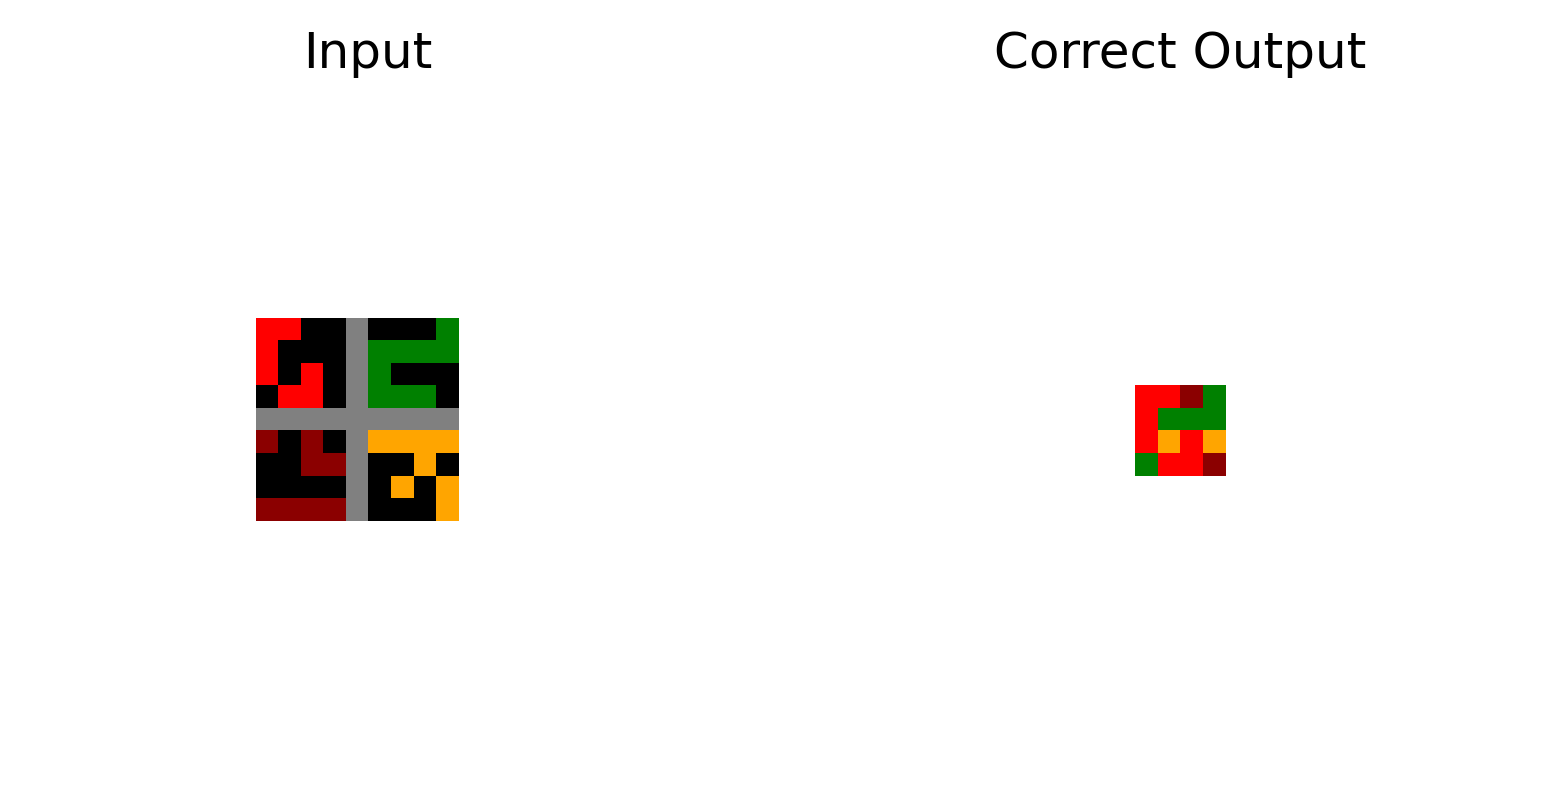

## Pos. 320 - Difficulty 0.07296586036682129 - Challenge ac0a08a4

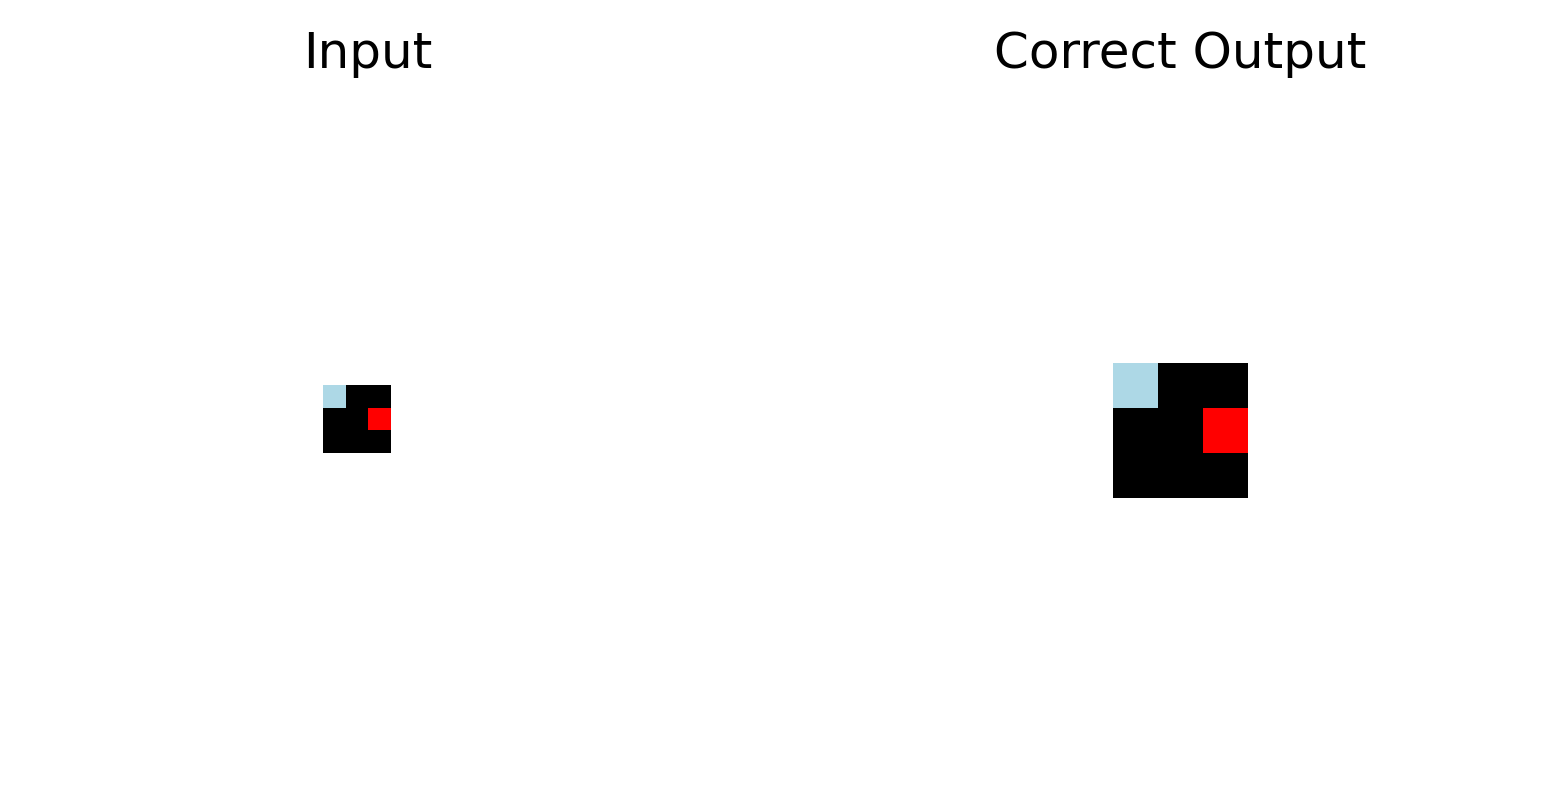

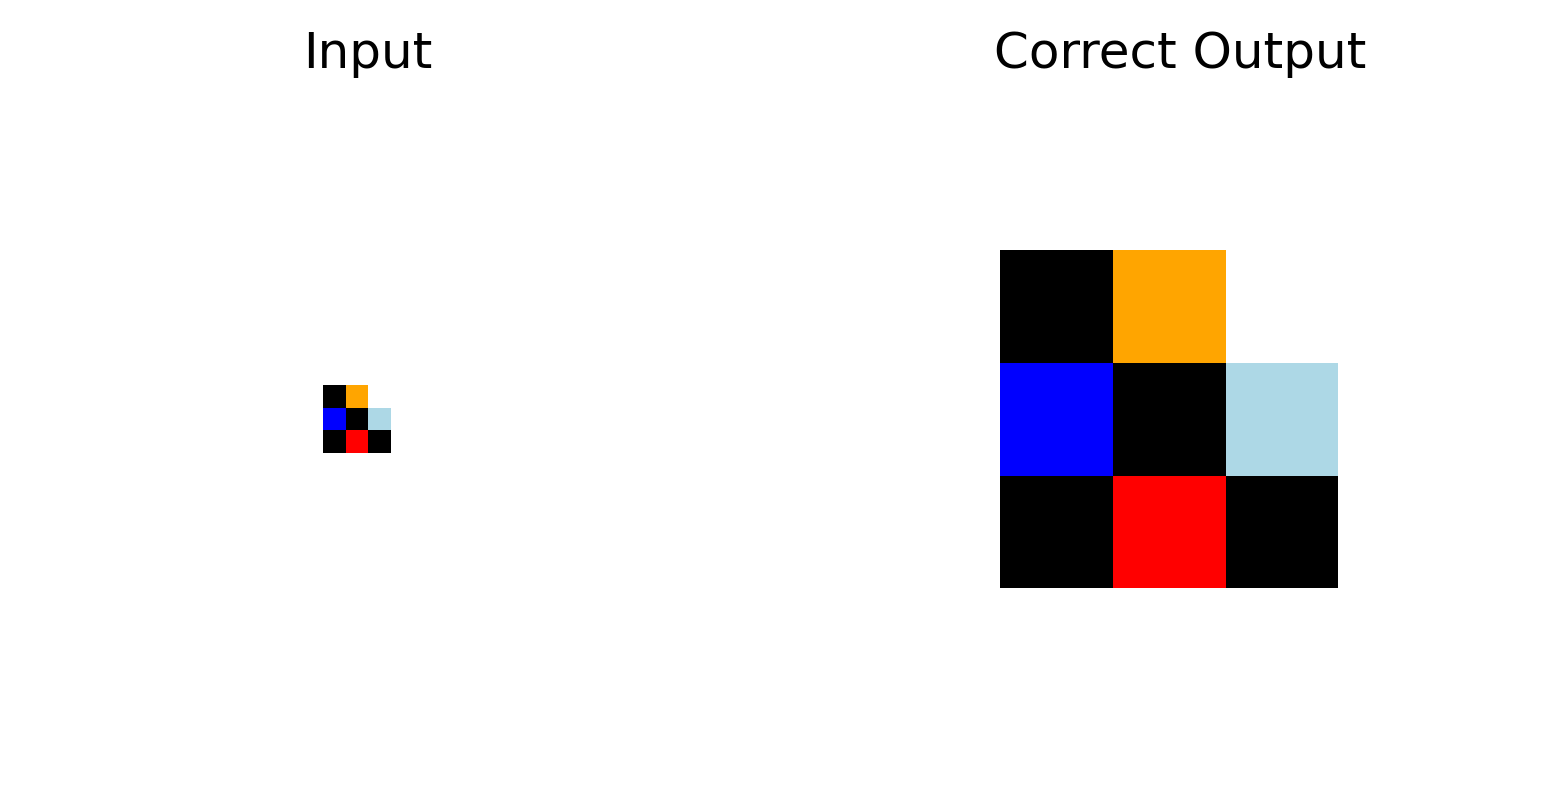

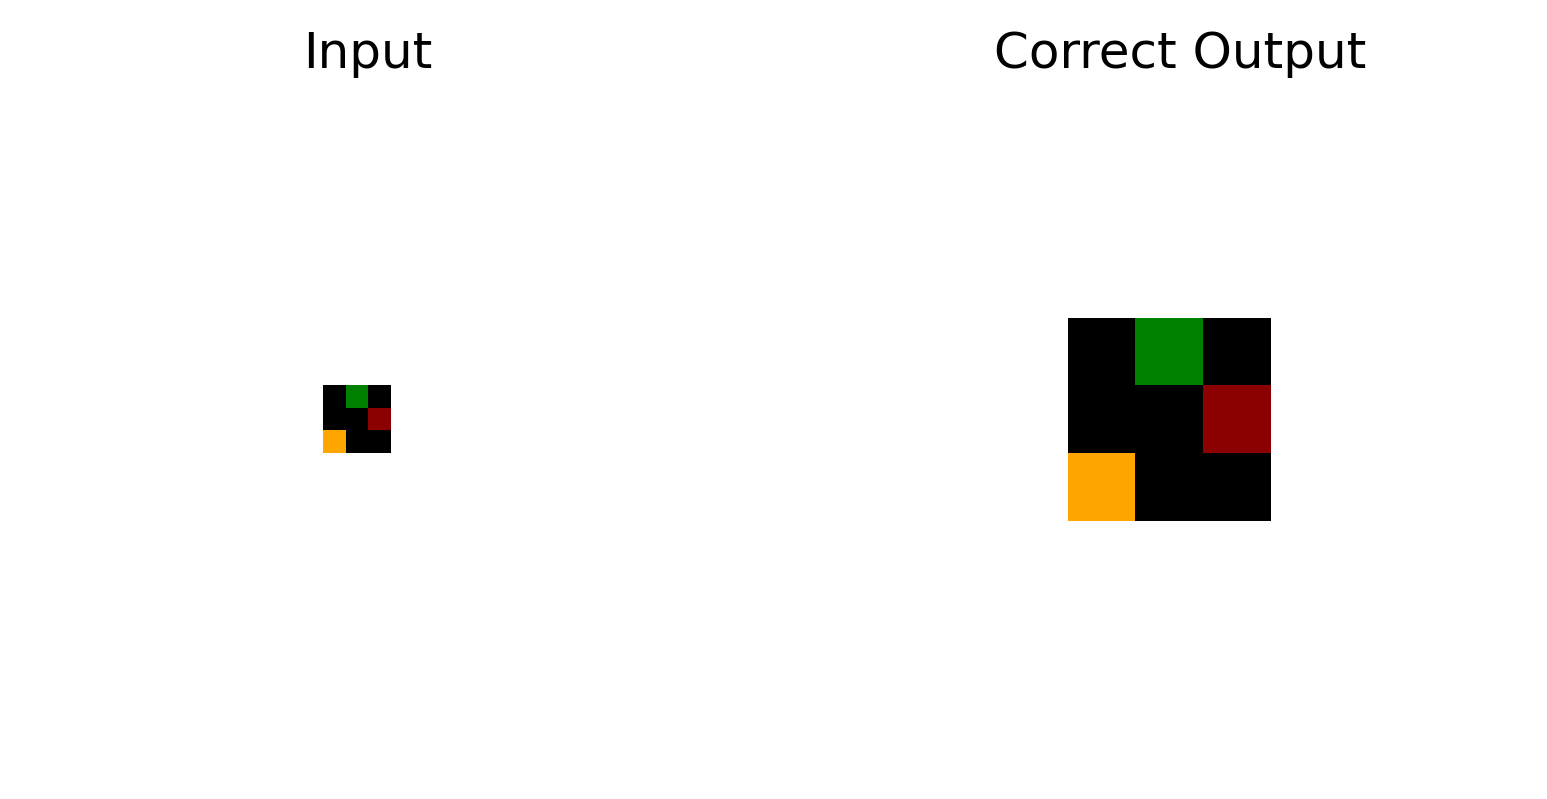

## Pos. 340 - Difficulty 0.09542578458786011 - Challenge e98196ab

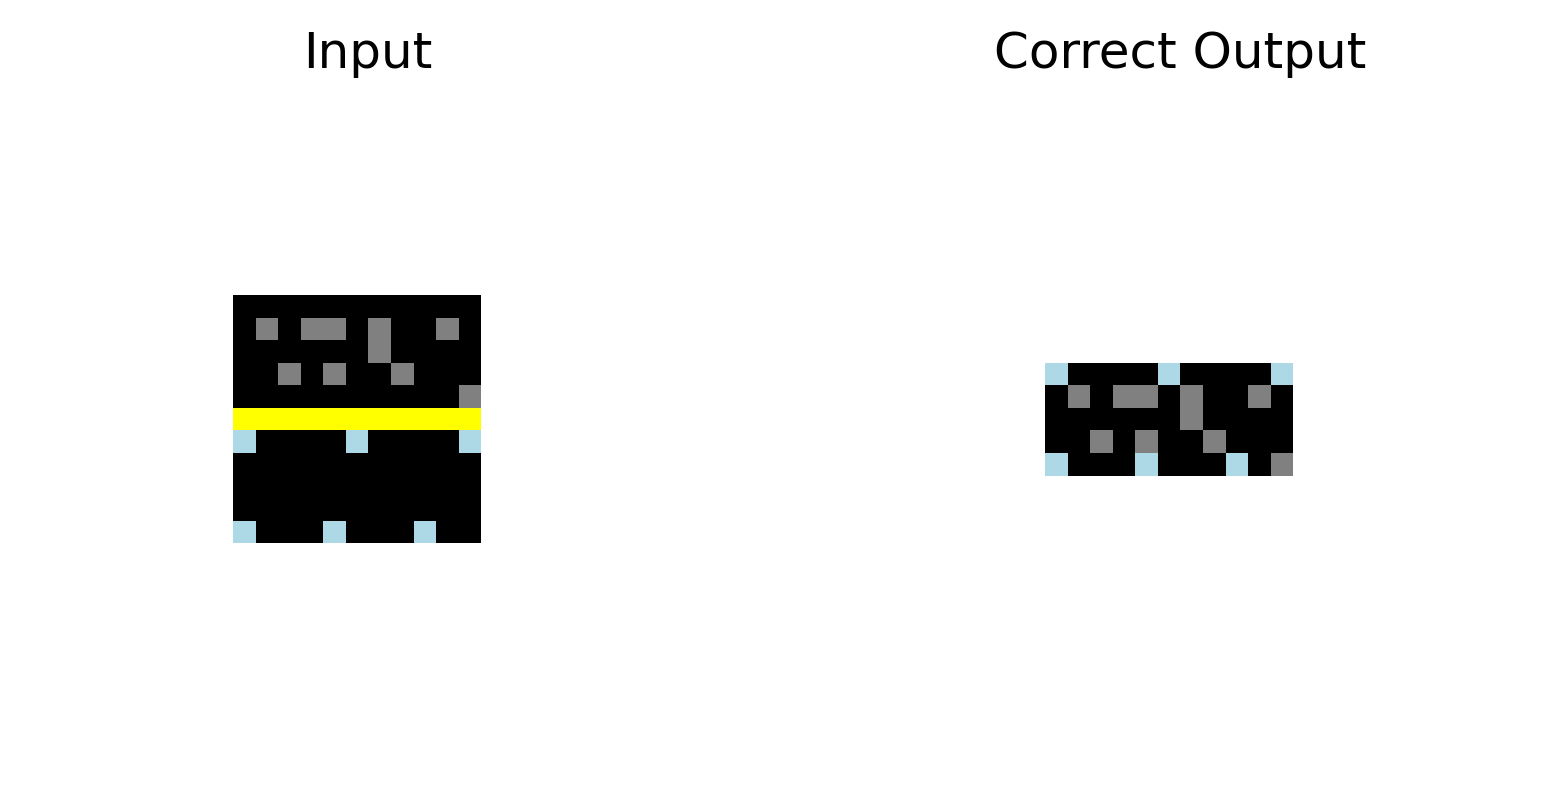

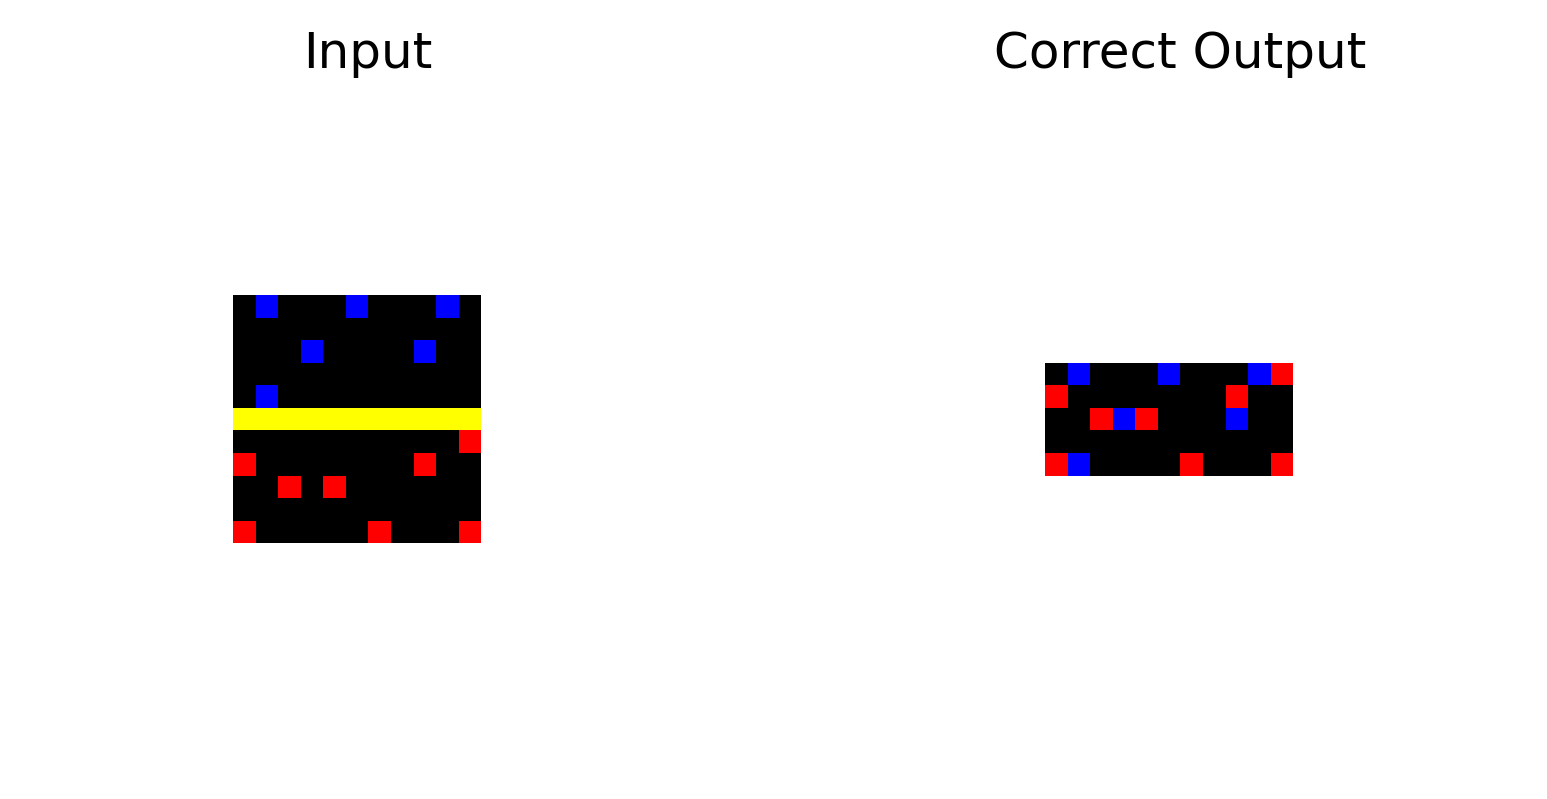

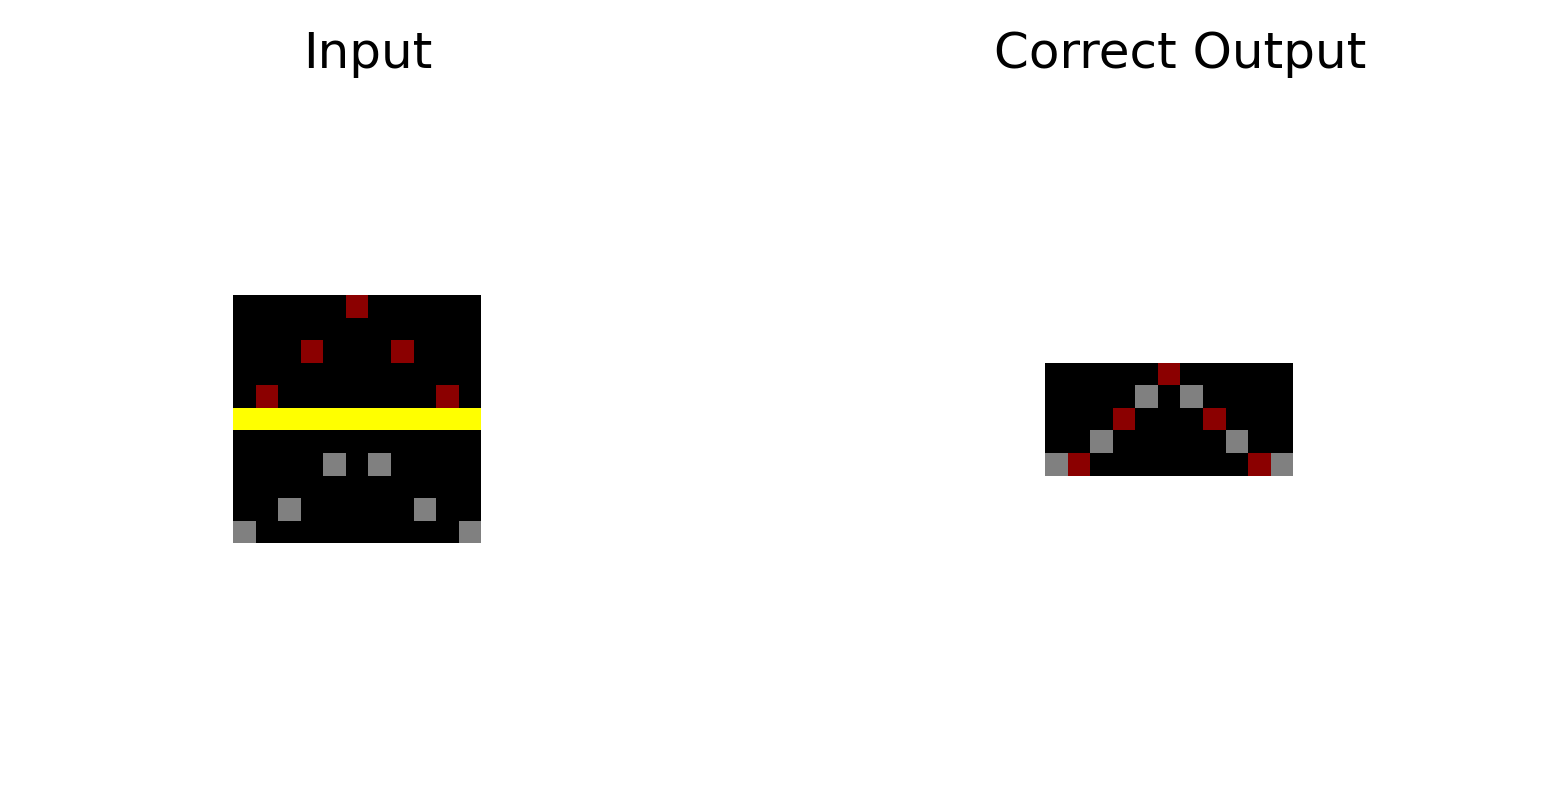

## Pos. 360 - Difficulty 0.14934366941452026 - Challenge e6721834

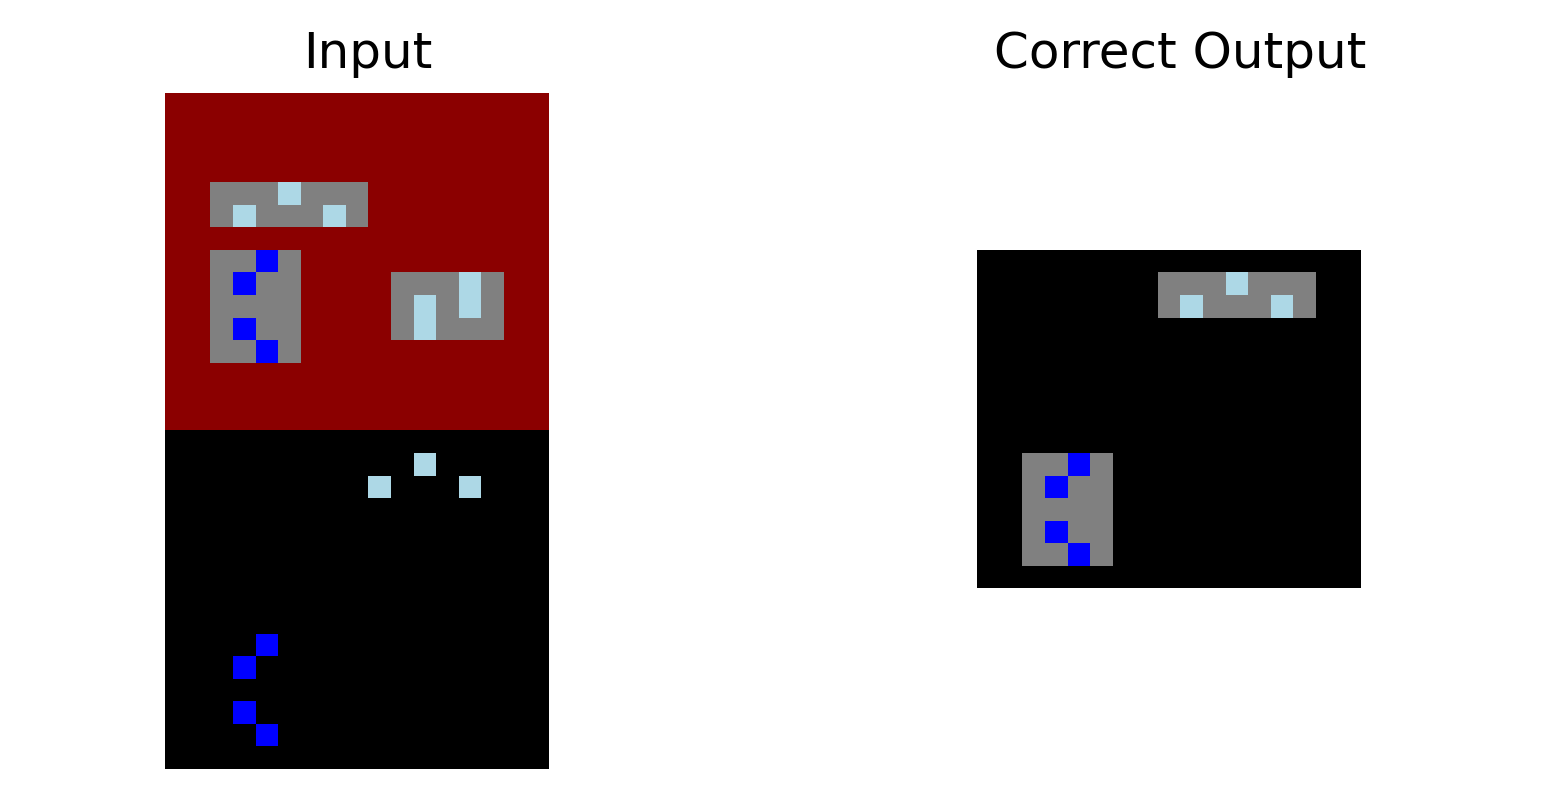

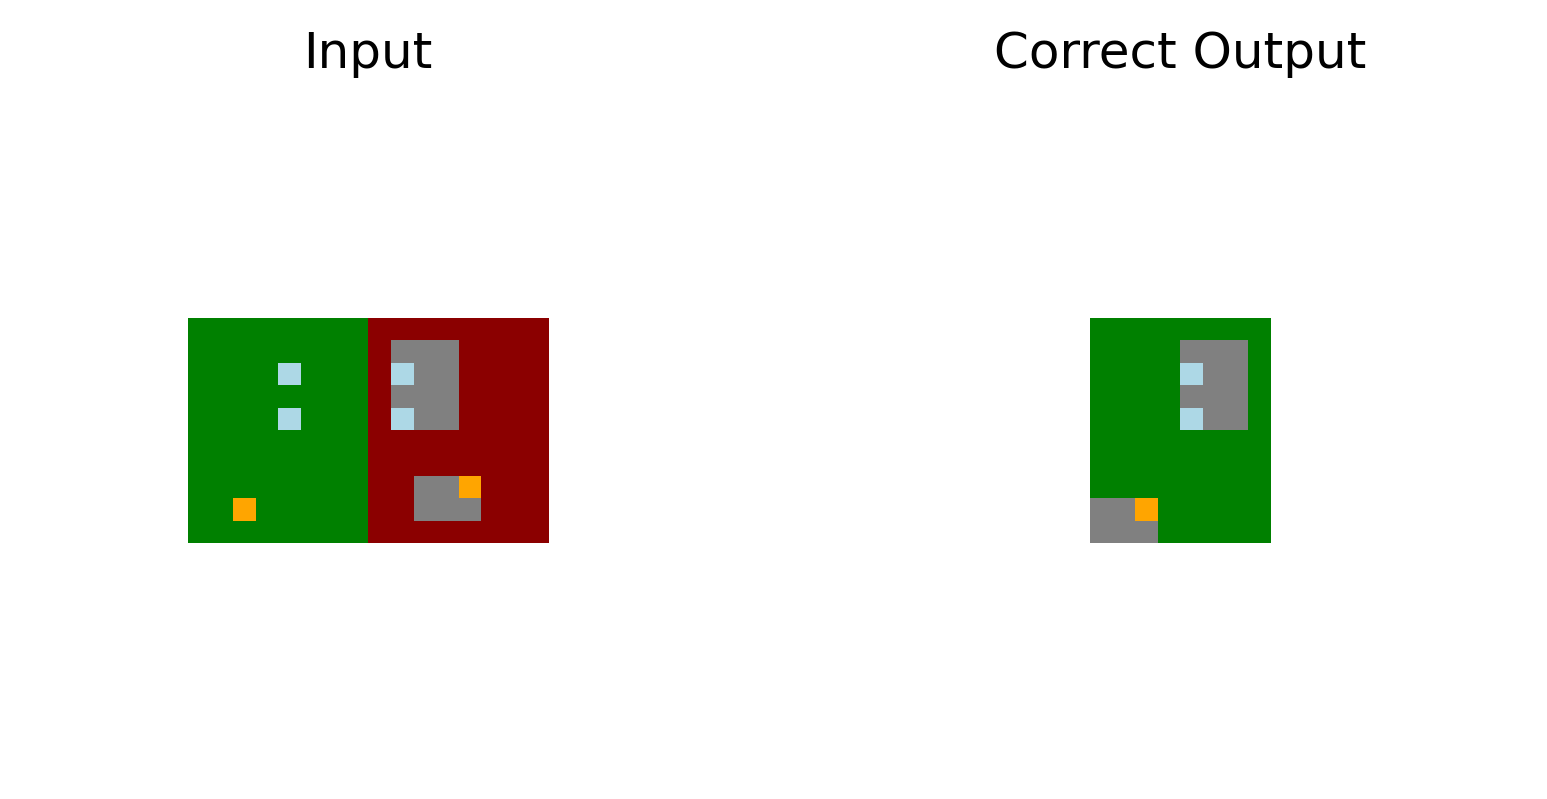

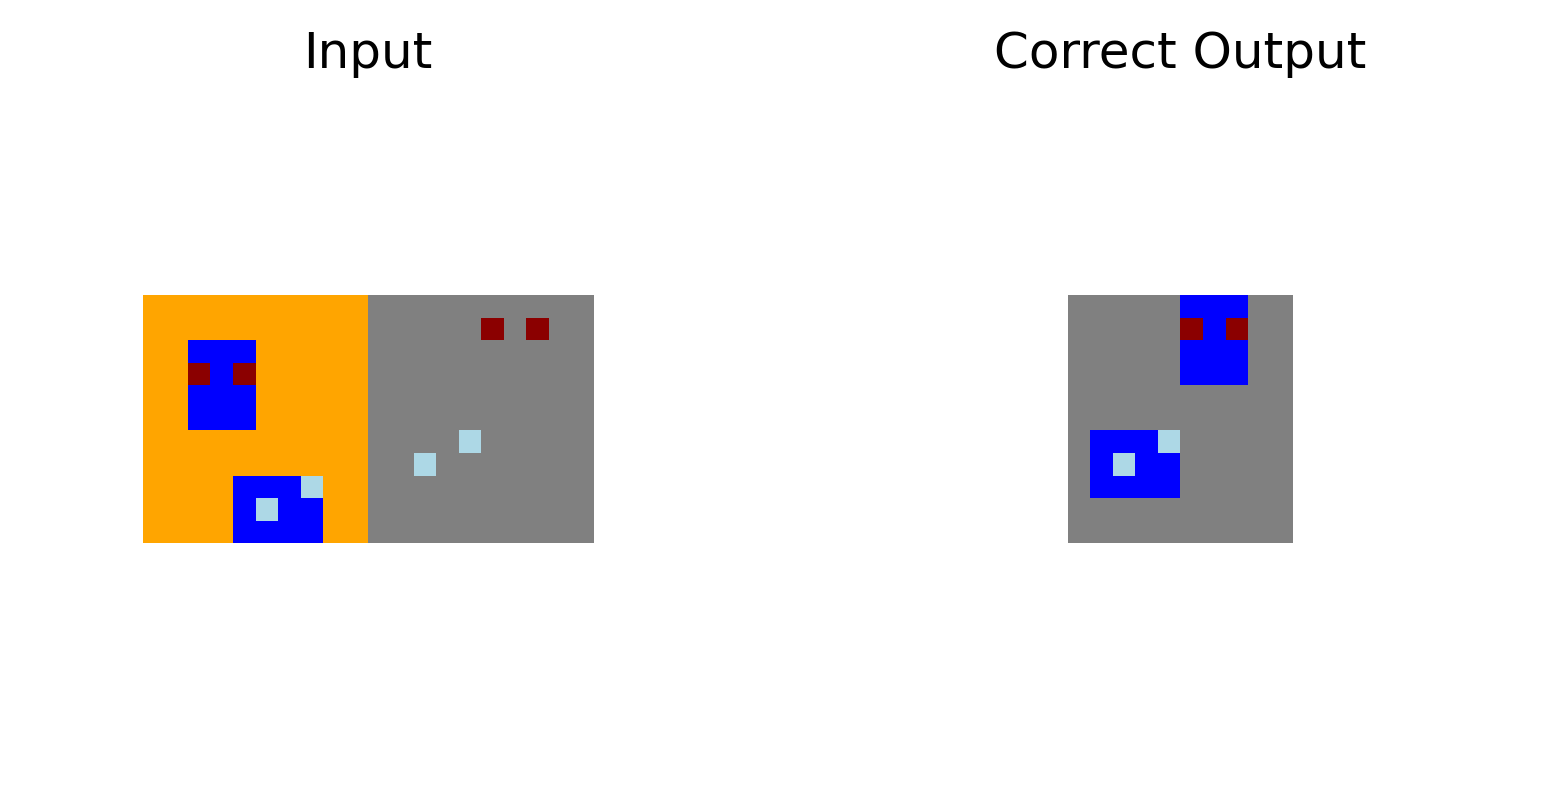

## Pos. 380 - Difficulty 0.2090190052986145 - Challenge 9f236235

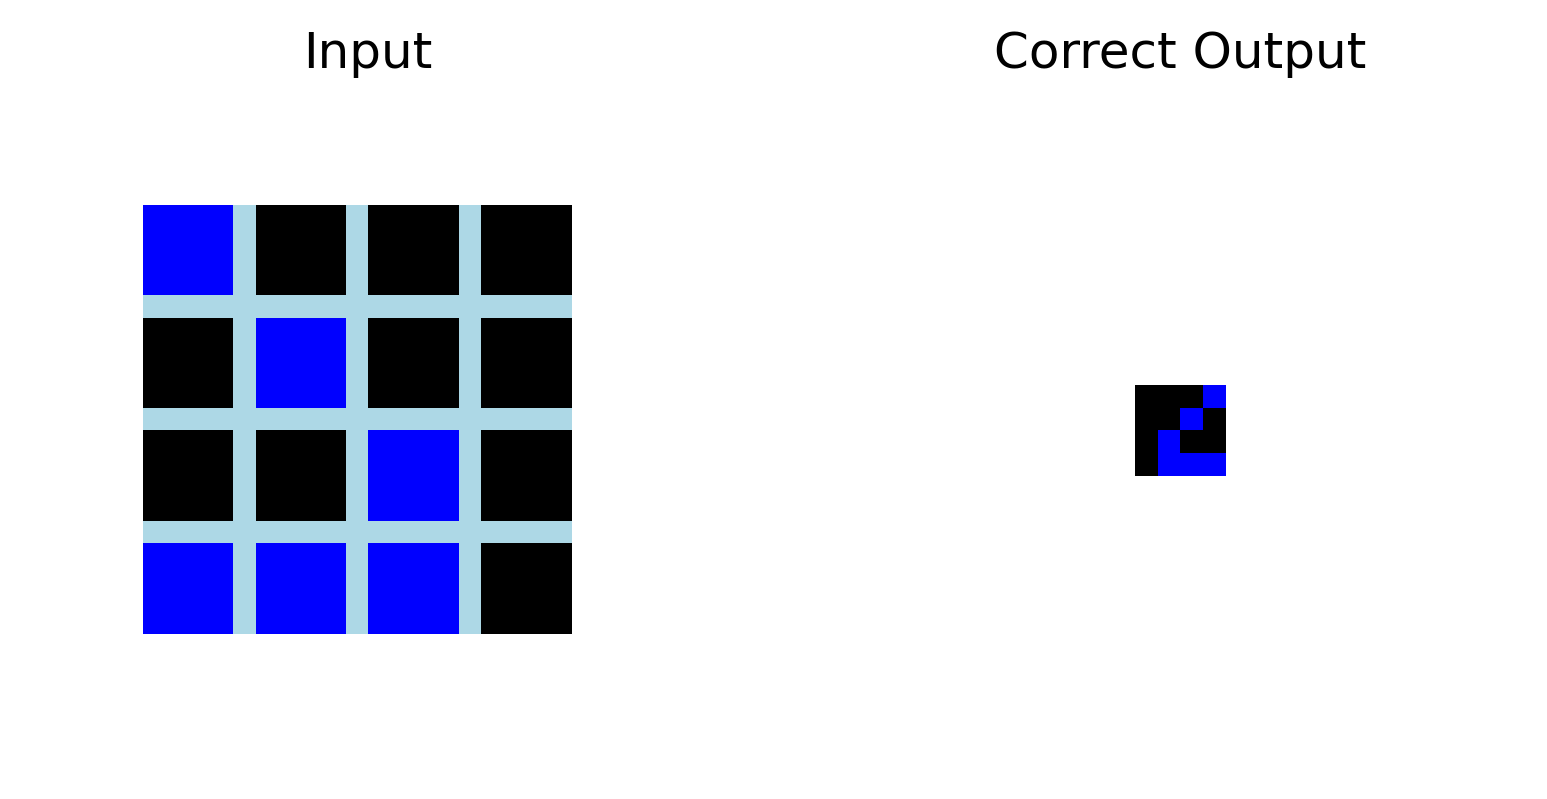

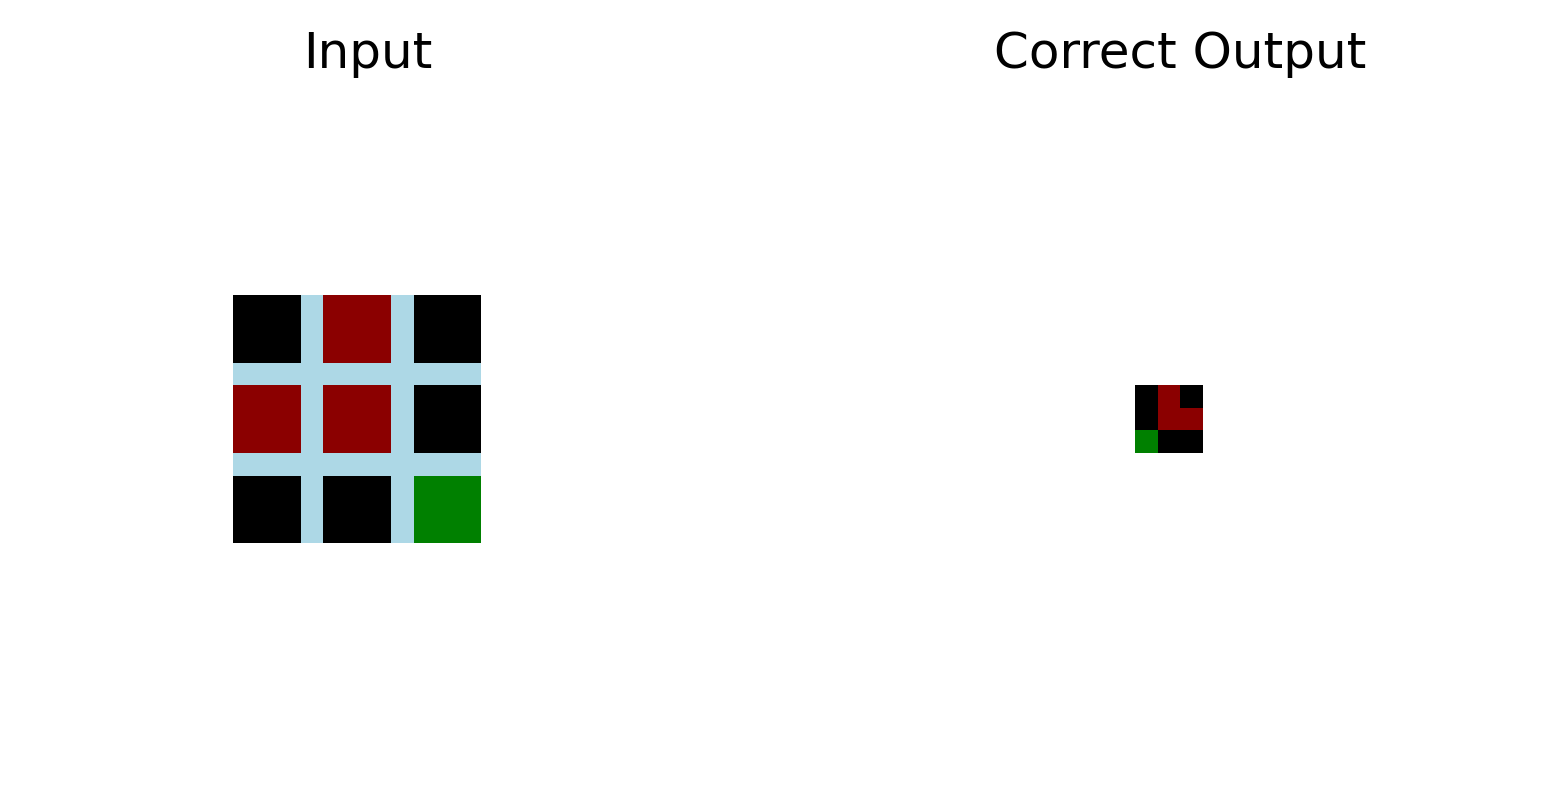

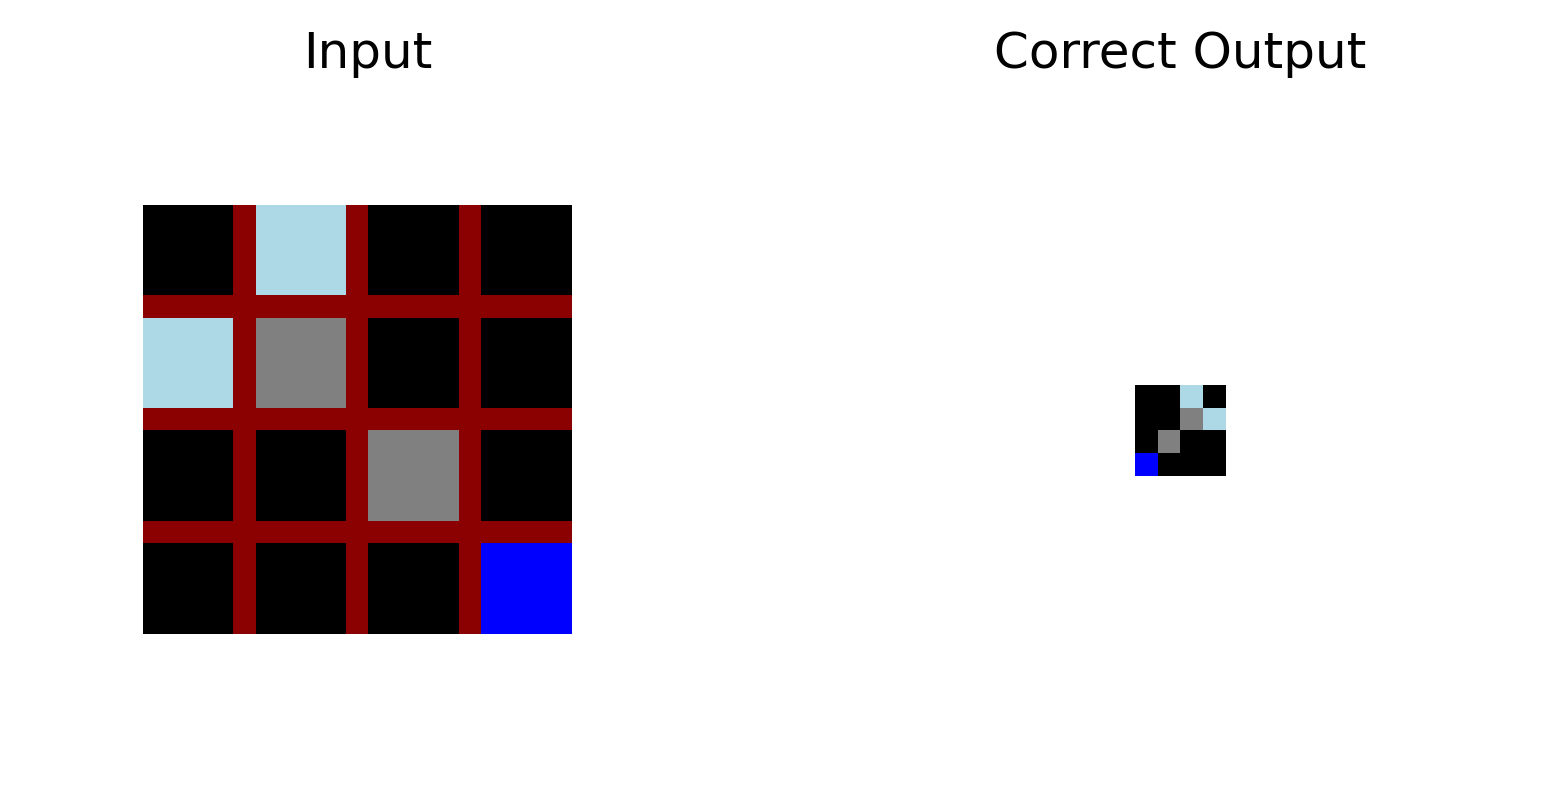

In [27]:
from IPython.display import display, Markdown, Latex

for i in range(0, len(challenges_by_difficulty_asc), 20):
    challenge_id, difficulty = challenges_by_difficulty_asc[i]
    X_samples, y_samples = dataset.get_samples(challenge_id)
    
    display(Markdown(f"## Pos. {i} - Difficulty {difficulty} - Challenge {challenge_id}"))
    for i, X_sample in enumerate(X_samples):
        y_sample = y_samples[i]
        plot.input_and_output(X_sample, y_sample)